# Capstone Project

Submitted by:
1. Ankit Sahu
2. Vikul Aggarwal

In [1]:
# importing essential python modules
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')
# Set pretty printing format for floats
pd.set_option('float_format', '{:.2f}'.format)
#Setting columns to be displayed
pd.options.display.max_columns = 50

### Reading the data

In [3]:
df = pd.read_csv('C:/Users/asahu1/Downloads/ConsumerElectronics.csv', low_memory = False, na_values=['\\N', ' ', ''])
df.head()

fsn_id           order_date  Year  Month            order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.00   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.00   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.00   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.00   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.00   

        order_item_id     gmv  units  deliverybdays  deliverycdays  \
0 3419300926147000.00 6400.00      1            nan            nan   
1 1420830839915200.00 6900.00      1            nan            nan   
2 2421912925714800.00 1990.00      1            nan            nan   
3 4416592101738400.00 1690.00      1            nan            nan   
4 4419525153426400.00 1618.00      1            nan            nan   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5 -1012991307785880064.00   
1                        COD    7 -8990324579055120384.00   
2                        COD   10 -1040442942046599936.00   
3                    Prepaid    4 -7604960843527140352.00   
4                    Prepaid    6  2894557208345299968.00   

                  pincode product_analytic_super_category  \
0 -7791755829057349632.00                              CE   
1  7335411490974310400.00                              CE   
2 -7477687762286570496.00                              CE   
3 -5835931638776609792.00                              CE   
4   534735360997241984.00                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

### Inspecting the data

In [4]:
print('The shape of the dataframe is ',df.shape)

The shape of the dataframe is  (1648824, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null object
p

In [6]:
# standardising the column names to lower case
#df.columns = df.columns.str.strip().str.lower()
#print(df.columns)

### Data Cleaning and filtering

In [7]:
# Percentage of missing values in each column
df.isnull().sum()*100/len(df.index)

fsn_id                             0.00
order_date                         0.00
Year                               0.00
Month                              0.00
order_id                           0.00
order_item_id                      0.00
gmv                                0.30
units                              0.00
deliverybdays                     79.63
deliverycdays                     79.63
s1_fact.order_payment_type         0.00
sla                                0.00
cust_id                            0.30
pincode                            0.30
product_analytic_super_category    0.00
product_analytic_category          0.00
product_analytic_sub_category      0.00
product_analytic_vertical          0.35
product_mrp                        0.00
product_procurement_sla            0.00
dtype: float64

In [8]:
# Assuming the null values in deliverybdays and deliverycdays correspond to 0, performing the imputation
df['deliverybdays'].fillna(value=0, inplace=True)
df['deliverycdays'].fillna(value=0, inplace=True)

In [9]:
# dropping the other null value records left since the %ages are very small
df.dropna(inplace=True)

In [10]:
# Checking the column-wise percentage of missing values again
df.isnull().sum()*100/len(df.index)

fsn_id                            0.00
order_date                        0.00
Year                              0.00
Month                             0.00
order_id                          0.00
order_item_id                     0.00
gmv                               0.00
units                             0.00
deliverybdays                     0.00
deliverycdays                     0.00
s1_fact.order_payment_type        0.00
sla                               0.00
cust_id                           0.00
pincode                           0.00
product_analytic_super_category   0.00
product_analytic_category         0.00
product_analytic_sub_category     0.00
product_analytic_vertical         0.00
product_mrp                       0.00
product_procurement_sla           0.00
dtype: float64

There are no null values now.

In [11]:
print('The number of records left after missing value treatment are', len(df.index))

The number of records left after missing value treatment are 1638106


In [12]:
print('The percentage of records dropped during null value treatment is',round((1648824-len(df.index))*100/1648824,4))

The percentage of records dropped during null value treatment is 0.65


In [13]:
# First filtering the data for the required time period of July 2015 to June 2016.b
df = df[~(((df.Year == 2015) & (df.Month < 7)) | ((df.Year == 2016) & (df.Month > 6)))]
print('The number of records left are', len(df.index))

The number of records left are 1637498


In [14]:
# Filtering the data for the 3 categories
df= df[(df.product_analytic_sub_category=='GamingAccessory')|(df.product_analytic_sub_category=='CameraAccessory')|(df.product_analytic_sub_category=='HomeAudio')]
print('The number of records left are', len(df.index))

The number of records left are 564395


In [15]:
# removing duplicate records
df = df.drop_duplicates(subset = ["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)
print('The number of records left are', len(df.index))

The number of records left are 524114


In [16]:
# Removing the records where product_mrp is equal to 0
df = df[~(df.product_mrp==0)]
print('The number of records left are', len(df.index))

The number of records left are 520915


In [17]:
# Removing the records where gmv is equal to 0
df = df[~(df.gmv==0)]
print('The number of records left are', len(df.index))

The number of records left are 520668


In [18]:
# Removing the records where units is equal to 0
df = df[~(df.units==0)]
print('The number of records left are', len(df.index))

The number of records left are 520668


There are no records where units is 0.

In [19]:
# Fixing invalid GMV values
# There are records where GMV is greater than the product of MRP and Units. Removing such records.
df = df[~(df.gmv > df.product_mrp * df.units)]
print('The number of records left are', len(df.index))

The number of records left are 507934


Invalid values for product_mrp, units and gmv have been treated.

In [20]:
# treating deliverybdays
# there are some records where deliverybdays is negative
df[df.deliverybdays < 0]

fsn_id           order_date  Year  Month  \
978985   ACCEB2GBYXXV8Y3Y  2016-04-16 13:08:37  2016      4   
1012953  ACCEG47YXBJBKNZZ  2016-04-11 13:01:01  2016      4   
1013347  ACCEG6BFZCKUVGBE  2016-04-28 16:15:26  2016      4   
1020219  ACCEYX9WWGEZYDUU  2016-04-27 00:17:34  2016      4   
1034307  BBXD7KJWYQGJWYRP  2016-04-27 14:26:28  2016      4   
1072470  ACCCXGEQHJVZ8QEB  2016-05-27 11:03:00  2016      5   
1075097  ACCD6KRGFFSWFYFN  2016-05-16 11:40:30  2016      5   
1101685  ACCE8FTBXFKBNZMY  2016-05-16 19:09:13  2016      5   
1113136  ACCEAFFNP7RDKFQ7  2016-05-09 19:37:07  2016      5   

                   order_id         order_item_id     gmv  units  \
978985  1570438645116600.00 300037347717572992.00  393.00      1   
1012953 4568270260855700.00 300037347717508992.00 1349.00      1   
1013347 3586953427570300.00   3586953427570300.00 2480.00      2   
1020219 3583309822353700.00   3583309822353700.00 2745.00      5   
1034307 2586025370724800.00   2586025370724800.00 4850.00      1   
1072470 3611823881854700.00   3611823881854700.00 9950.00      1   
1075097 4602342668174000.00   4602342668174000.00  396.00      1   
1101685 3602609539861100.00   3602609539861100.00  155.00      1   
1113136 1596580081411600.00   1596580081411600.00  208.00      1   

         deliverybdays  deliverycdays s1_fact.order_payment_type  sla  \
978985          -71.00        -836.00                    Prepaid    6   
1012953         -39.00        -466.00                    Prepaid    3   
1013347         -72.00        -848.00                    Prepaid    6   
1020219         -72.00        -844.00                    Prepaid    7   
1034307         -41.00        -482.00                    Prepaid    4   
1072470         -14.00         -16.00                    Prepaid   10   
1075097         -45.00        -532.00                        COD    3   
1101685         -56.00        -655.00                        COD    6   
1113136         -73.00        -859.00                        COD    5   

                        cust_id                 pincode  \
978985  -6000404706436750336.00  2121079452844669952.00   
1012953   687988512636699008.00 -7008123264312000512.00   
1013347  2357728863733049856.00  6513330541343979520.00   
1020219  2357728863733049856.00  6513330541343979520.00   
1034307   172086036317008000.00 -7008123264312000512.00   
1072470 -4135556815193220096.00 -5428757436412550144.00   
1075097  6178167817248579584.00  -303201165845424000.00   
1101685  7057656524174319616.00  8965575518440729600.00   
1113136 -1950756469199409920.00 -4847693693500520448.00   

        product_analytic_super_category product_analytic_category  \
978985                               CE        EntertainmentSmall   
1012953                              CE        EntertainmentSmall   
1013347                              CE           CameraAccessory   
1020219                              CE           CameraAccessory   
1034307                              CE        EntertainmentSmall   
1072470                              CE           CameraAccessory   
1075097                              CE           CameraAccessory   
1101685                              CE           CameraAccessory   
1113136                              CE           CameraAccessory   

        product_analytic_sub_category product_analytic_vertical  product_mrp  \
978985                      HomeAudio          HomeAudioSpeaker         1250   
1012953                     HomeAudio          HomeAudioSpeaker         2999   
1013347               CameraAccessory      CameraBatteryCharger         1840   
1020219               CameraAccessory             CameraBattery          849   
1034307                     HomeAudio                   BoomBox         5199   
1072470               CameraAccessory                      Lens        16959   
1075097               CameraAccessory      CameraBatteryCharger          625   
1101685               CameraAccessory              Cam

In [21]:
# dropping the records where deliverybdays is negative
df = df[~(df.deliverybdays < 0)]
print('The number of records left are', len(df.index))

The number of records left are 507925


In [22]:
# Checking if there are records where deliverycdays is negative
df[df.deliverycdays < 0]

Empty DataFrame
Columns: [fsn_id, order_date, Year, Month, order_id, order_item_id, gmv, units, deliverybdays, deliverycdays, s1_fact.order_payment_type, sla, cust_id, pincode, product_analytic_super_category, product_analytic_category, product_analytic_sub_category, product_analytic_vertical, product_mrp, product_procurement_sla]
Index: []

In [23]:
# treating product_procurement_sla
# there are some records where product_procurement_sla is negative
df[df.product_procurement_sla < 0]

fsn_id           order_date  Year  Month  \
429      ACCCX3SGDZFGCGHX  2015-10-19 08:50:22  2015     10   
430      ACCCX3SGDZFGCGHX  2015-10-12 14:03:26  2015     10   
431      ACCCX3SGDZFGCGHX  2015-10-18 13:10:37  2015     10   
432      ACCCX3SGDZFGCGHX  2015-10-16 19:28:27  2015     10   
433      ACCCX3SGDZFGCGHX  2015-10-16 21:16:25  2015     10   
434      ACCCX3SGDZFGCGHX  2015-10-17 11:03:54  2015     10   
435      ACCCX3SGDZFGCGHX  2015-10-15 18:42:18  2015     10   
436      ACCCX3SGDZFGCGHX  2015-10-29 11:42:36  2015     10   
437      ACCCX3SGDZFGCGHX  2015-10-22 19:40:29  2015     10   
438      ACCCX3SGDZFGCGHX  2015-10-16 16:20:05  2015     10   
609      ACCCX3SHDRPCFHEE  2015-10-16 07:54:26  2015     10   
610      ACCCX3SHDRPCFHEE  2015-10-01 12:20:42  2015     10   
611      ACCCX3SHDRPCFHEE  2015-10-17 11:05:13  2015     10   
612      ACCCX3SHDRPCFHEE  2015-10-02 00:29:03  2015     10   
2095     ACCCZ3TE442VHFRH  2015-10-06 09:55:10  2015     10   
2096     ACCCZ3TE442VHFRH  2015-10-07 19:11:38  2015     10   
2097     ACCCZ3TE442VHFRH  2015-10-30 14:11:14  2015     10   
2098     ACCCZ3TE442VHFRH  2015-10-17 09:40:24  2015     10   
2099     ACCCZ3TE442VHFRH  2015-10-23 20:54:56  2015     10   
2100     ACCCZ3TE442VHFRH  2015-10-05 22:11:30  2015     10   
2101     ACCCZ3TE442VHFRH  2015-10-11 10:51:20  2015     10   
2102     ACCCZ3TE442VHFRH  2015-10-17 13:16:59  2015     10   
2103     ACCCZ3TE442VHFRH  2015-10-24 18:19:33  2015     10   
2104     ACCCZ3TE442VHFRH  2015-10-28 19:01:40  2015     10   
2105     ACCCZ3TE442VHFRH  2015-10-07 12:42:27  2015     10   
2106     ACCCZ3TE442VHFRH  2015-10-25 14:45:27  2015     10   
2107     ACCCZ3TE442VHFRH  2015-10-23 11:08:26  2015     10   
2108     ACCCZ3TE442VHFRH  2015-10-11 13:02:20  2015     10   
2109     ACCCZ3TE442VHFRH  2015-10-16 16:53:42  2015     10   
2110     ACCCZ3TE442VHFRH  2015-10-16 20:39:00  2015     10   
...                   ...                  ...   ...    ...   
1526136  FMRDASXT3HZFV9SF  2015-09-23 19:53:21  2015      9   
1526137  FMRDASXT3HZFV9SF  2015-09-25 19:34:46  2015      9   
1526138  FMRDASXT3HZFV9SF  2015-09-03 23:29:20  2015      9   
1526139  FMRDASXT3HZFV9SF  2015-09-17 12:07:58  2015      9   
1526140  FMRDASXT3HZFV9SF  2015-09-17 17:56:46  2015      9   
1526141  FMRDASXT3HZFV9SF  2015-09-22 15:12:40  2015      9   
1526142  FMRDASXT3HZFV9SF  2015-09-24 10:40:31  2015      9   
1526143  FMRDASXT3HZFV9SF  2015-09-24 18:01:16  2015      9   
1526144  FMRDASXT3HZFV9SF  2015-09-24 20:27:29  2015      9   
1526145  FMRDASXT3HZFV9SF  2015-09-26 14:01:55  2015      9   
1526147  FMRDASXT3HZFV9SF  2015-09-04 07:30:51  2015      9   
1526148  FMRDASXT3HZFV9SF  2015-09-04 08:11:07  2015      9   
1526149  FMRDASXT3HZFV9SF  2015-09-04 16:27:17  2015      9   
1526150  FMRDASXT3HZFV9SF  2015-09-15 14:39:17  2015      9   
1526151  FMRDASXT3HZFV9SF  2015-09-15 22:14:34  2015      9   
1526152  FMRDASXT3HZFV9SF  2015-09-18 11:37:32  2015      9   
1526153  FMRDASXT3HZFV9SF  2015-09-26 17:15:22  2015      9   
1526154  FMRDASXT3HZFV9SF  2015-09-27 11:53:05  2015      9   
1526155  FMRDASXT3HZFV9SF  2015-09-12 16:09:55  2015      9   
1526156  FMRDASXT3HZFV9SF  2015-09-23 14:49:30  2015      9   
1526157  FMRDASXT3HZFV9SF  2015-09-23 18:46:20  2015      9   
1526158  FMRDASXT3HZFV9SF  2015-09-27 21:38:51  2015      9   
1526159  FMRDASXT3HZFV9SF  2015-09-02 13:28:16  2015      9   
1526160  FMRDASXT3HZFV9SF  2015-09-04 14:02:00  2015      9   
1526161  FMRDASXT3HZFV9SF  2015-09-11 21:49:16  2015      9   
1526162  FMRDASXT3HZFV9SF  2015-09-15 06:47:41  2015      9   
1526163  FMRDASXT3HZFV9SF  2015-09-18 22:42:03  2015      9   
1526164  FMRDASXT3HZFV9SF  2015-09-21 23:46:06  2015      9   
1526165  FMRDASXT3HZFV9SF  2015-09-04 15:49:17  2015      9   
1526166  FMRDASXT3HZFV9SF  2015-09-25 12:15:46  2015      9   

                   order_id         order_item_id      gmv  units  \
429     2420795971167500.00   2420795971167

In [24]:
# The time taken to procure a product cannot be negative, these rows can be dropped.
df = df[~(df.product_procurement_sla < 0)]
print('The number of records left are', len(df.index))

The number of records left are 497887


In [25]:
# String to datetime
df['order_datetime'] =  pd.to_datetime(df.order_date, format='%Y-%m-%d %H:%M:%S')

In [26]:
# creating a column with just date
df['order_date'] = df.order_datetime.dt.date

### Dropping columns which aren't needed

In [27]:
# Columns which aren't necessary can be dropped
# Looking at the data product_analytic_super_category seems to have just one unique value
df.product_analytic_super_category.value_counts()

CE    497887
Name: product_analytic_super_category, dtype: int64

In [28]:
# product_analytic_super_category can be dropped
cols_to_drop = ['product_analytic_super_category']

In [29]:
# Also, columns like fsn_id, 'order_item_id', cust_id and pincode can be dropped as they aren't useful for analysis
cols_to_drop.extend(['fsn_id', 'order_item_id','cust_id','pincode'])

In [30]:
# dropping the columns
df.drop(cols_to_drop,axis=1,inplace=True)

#### The data is clean now. We have ~5 lakh records using which we can proceed with feature engineering, EDA, and model building.
#### Any other columns which aren't needed will be dropped in further analysis.

### Deriving new features

In [31]:
#Creating Week from order Date
df['week']=df.order_datetime.dt.week
df.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-17  2015     10 3419300926147000.00 6400.00      1           0.00   
1  2015-10-19  2015     10 1420830839915200.00 6900.00      1           0.00   
2  2015-10-20  2015     10 2421912925714800.00 1990.00      1           0.00   
3  2015-10-14  2015     10 4416592101738400.00 1690.00      1           0.00   
4  2015-10-17  2015     10 4419525153426400.00 1618.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                        COD    5           CameraAccessory   
1           0.00                        COD    7           CameraAccessory   
2           0.00                        COD   10           CameraAccessory   
3           0.00                    Prepaid    4           CameraAccessory   
4           0.00                    Prepaid    6           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla      order_datetime  week  
0                        0 2015-10-17 15:11:54    42  
1                        0 2015-10-19 10:07:22    43  
2                        3 2015-10-20 15:45:56    43  
3                        3 2015-10-14 12:05:15    42  
4                        3 2015-10-17 21:25:03    42

In [32]:
# Checking the unique values for week
df.week.unique()

array([42, 43, 41, 44, 40, 45, 46, 16, 10,  8, 48, 47, 38, 17, 14,  2,  7,
        5, 11, 13, 39,  9, 35,  3,  4, 49, 53, 12, 18, 50, 51,  6, 52,  1,
       15, 21, 19, 22, 20, 23, 24, 25, 26, 29, 30, 28, 31, 37, 27, 34, 33,
       32, 36], dtype=int64)

In [33]:
# To bring a continuity to week numbers, those which belong to 2016 can be incremented by 53
# so that the week numbers are continuous.
def week(x):
    if x >=1 and x<=26:
        return x+53
    else:
        return x


In [34]:
df.week = df.week.apply(week)

In [35]:
# checking the unique values again
df.week.unique()

array([42, 43, 41, 44, 40, 45, 46, 69, 63, 61, 48, 47, 38, 70, 67, 55, 60,
       58, 64, 66, 39, 62, 35, 56, 57, 49, 53, 65, 71, 50, 51, 59, 52, 54,
       68, 74, 72, 75, 73, 76, 77, 78, 79, 29, 30, 28, 31, 37, 27, 34, 33,
       32, 36], dtype=int64)

The Week Numbers now range from 27 to 79

In [36]:
# Creating list_price
# List price can be derived as GMV/Units sold

df['list_price']=df.gmv/df.units
df.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-17  2015     10 3419300926147000.00 6400.00      1           0.00   
1  2015-10-19  2015     10 1420830839915200.00 6900.00      1           0.00   
2  2015-10-20  2015     10 2421912925714800.00 1990.00      1           0.00   
3  2015-10-14  2015     10 4416592101738400.00 1690.00      1           0.00   
4  2015-10-17  2015     10 4419525153426400.00 1618.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                        COD    5           CameraAccessory   
1           0.00                        COD    7           CameraAccessory   
2           0.00                        COD   10           CameraAccessory   
3           0.00                    Prepaid    4           CameraAccessory   
4           0.00                    Prepaid    6           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla      order_datetime  week  list_price  
0                        0 2015-10-17 15:11:54    42     6400.00  
1                        0 2015-10-19 10:07:22    43     6900.00  
2                        3 2015-10-20 15:45:56    43     1990.00  
3                        3 2015-10-14 12:05:15    42     1690.00  
4                        3 2015-10-17 21:25:03    42     1618.00

In [37]:
# Discount %age can be derived as the product_mrp and the list price
df['discount_percentage']=round(100*((df.product_mrp - df.list_price) / df.product_mrp),2)

In [38]:
# creating a payday flag
# if the order date is close (a difference of 1 day) to pay day in Ontario (1st and 15th), we mark the column as 1, else 0
df['payday_flag'] = df['order_date'].apply(lambda x:1 if x.strftime('%d') in ('14','15','16','30','31','1','2') else 0)
df.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-17  2015     10 3419300926147000.00 6400.00      1           0.00   
1  2015-10-19  2015     10 1420830839915200.00 6900.00      1           0.00   
2  2015-10-20  2015     10 2421912925714800.00 1990.00      1           0.00   
3  2015-10-14  2015     10 4416592101738400.00 1690.00      1           0.00   
4  2015-10-17  2015     10 4419525153426400.00 1618.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                        COD    5           CameraAccessory   
1           0.00                        COD    7           CameraAccessory   
2           0.00                        COD   10           CameraAccessory   
3           0.00                    Prepaid    4           CameraAccessory   
4           0.00                    Prepaid    6           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   product_procurement_sla      order_datetime  week  list_price  \
0                        0 2015-10-17 15:11:54    42     6400.00   
1                        0 2015-10-19 10:07:22    43     6900.00   
2                        3 2015-10-20 15:45:56    43     1990.00   
3                        3 2015-10-14 12:05:15    42     1690.00   
4                        3 2015-10-17 21:25:03    42     1618.00   

   discount_percentage  payday_flag  
0                10.99            0  
1                 4.03            0  
2                 5.19            0  
3                19.49            1  
4                22.92            0

In [39]:
# importing holiday data
# Importing Holidays for Canada ontario State for 2015-2016 Years
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['holiday_flag']=pd.to_datetime(holidays['holiday_flag'], dayfirst=True)
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
holiday_flag    21 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


In [40]:
# creating holiday flag
holidays['holiday_flag']=holidays['holiday_flag'].dt.date
df=pd.merge(df,holidays,how='left',left_on='order_date',right_on='holiday_flag').fillna(0)

def holiday_flag(x):
    if x == 0:
        return 0
    else:
        return 1

df['holiday_flag']=df['holiday_flag'].apply(holiday_flag)

In [41]:
# creating a column product type
# if the gmv is more than the 80th percentile, it can be qualified as luxury
# else it can be considered as mass market
#df['product_type'] = df['gmv'].apply(lambda x:'luxury' if x >= df.gmv.quantile(.8) else 'mass_market')

In [42]:
#Statistics of the datset for different columns
df.describe().T

count                mean                 std  \
Year                    497887.00             2015.58                0.49   
Month                   497887.00                6.20                3.66   
order_id                497887.00 2840670221402346.00 1285624452366868.75   
gmv                     497887.00             1268.36             2376.63   
units                   497887.00                1.03                0.25   
deliverybdays           497887.00                1.05                2.18   
deliverycdays           497887.00                1.22                2.53   
sla                     497887.00                5.89                2.69   
product_mrp             497887.00             2496.53             4704.35   
product_procurement_sla 497887.00                2.64                1.66   
week                    497887.00               55.95               13.53   
list_price              497887.00             1252.07             2359.85   
discount_percentage     497887.00               46.45               23.58   
payday_flag             497887.00                0.16                0.37   
holiday_flag            497887.00                0.02                0.15   

                                 min                 25%                 50%  \
Year                         2015.00             2015.00             2016.00   
Month                           1.00                3.00                6.00   
order_id                162957597.00 1597486337482150.00 2610254405044800.00   
gmv                            10.00              295.00              545.00   
units                           1.00                1.00                1.00   
deliverybdays                   0.00                0.00                0.00   
deliverycdays                   0.00                0.00                0.00   
sla                             0.00                4.00                6.00   
product_mrp                    99.00              766.00             1200.00   
product_procurement_sla         0.00                2.00                2.00   
week                           27.00               45.00               57.00   
list_price                     10.00              290.00              539.00   
discount_percentage             0.00               27.69               47.37   
payday_flag                     0.00                0.00                0.00   
holiday_flag                    0.00                0.00                0.00   

                                        75%                 max  
Year                                2016.00             2016.00  
Month                                 10.00               12.00  
order_id                3616194488899000.00 4641664595370500.00  
gmv                                 1499.00           148050.00  
units                                  1.00               39.00  
deliverybdays                          0.00               61.00  
deliverycdays                          0.00               72.00  
sla                                    7.00               60.00  
product_mrp                         2800.00           180000.00  
product_procurement_sla                3.00               15.00  
week                                  67.00               79.00  
list_price                          1465.00           148050.00  
discount_percentage                   63.33               98.60  
payday_flag                            0.00                1.00  
holiday_flag                           0.00                1.00

Year


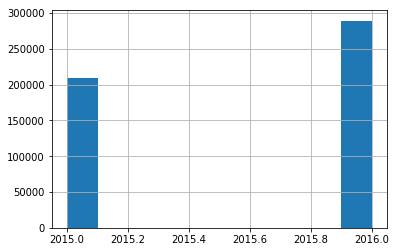

Month


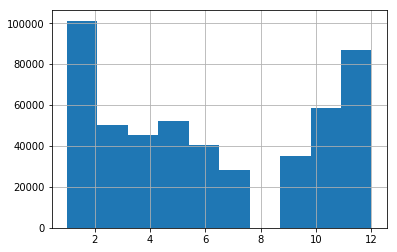

order_id


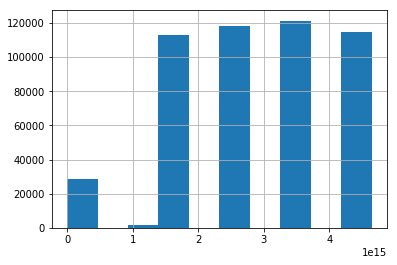

gmv


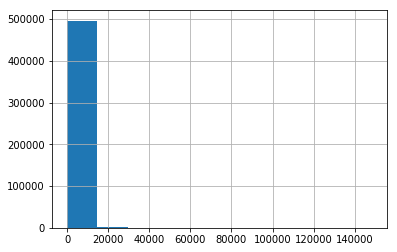

units


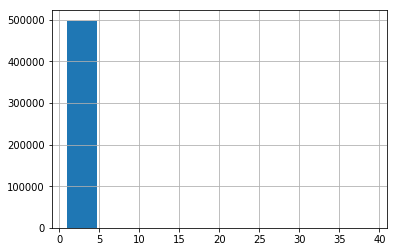

deliverybdays


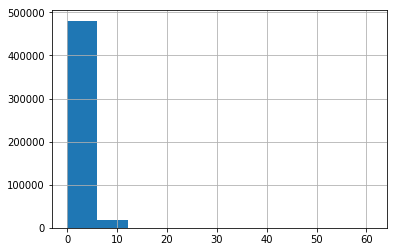

deliverycdays


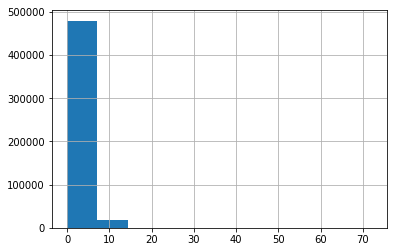

sla


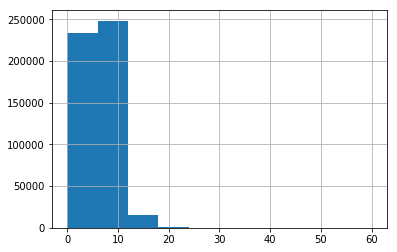

product_mrp


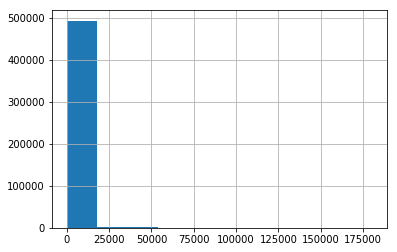

product_procurement_sla


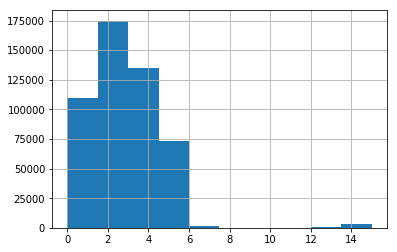

week


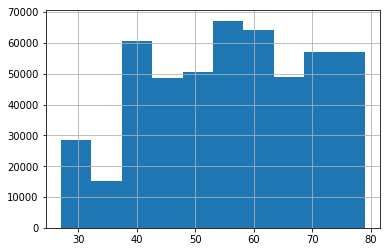

list_price


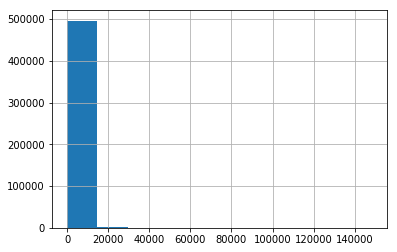

discount_percentage


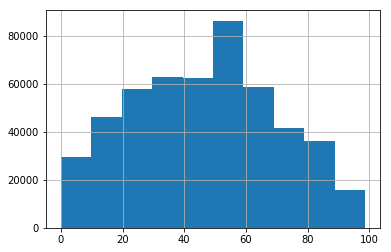

payday_flag


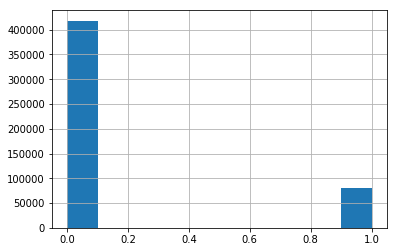

holiday_flag


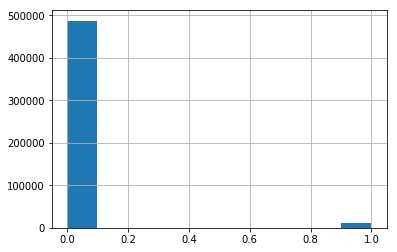

In [43]:
#Displaying histograms for visualisation for each of the numerical columns
for col in df.describe().columns:
    #printing the name of the column above each histogram
    print(col)
    df[col].hist()
    plt.show()

In [44]:
#Taking a look at the categorical variables

categorical_variables = [colname for colname in df.columns if df[colname].dtype == "object"]
df[categorical_variables].describe().T

count unique               top    freq
order_date                     497887    351        2015-10-16   13347
s1_fact.order_payment_type     497887      2               COD  365031
product_analytic_category      497887      3   CameraAccessory  210336
product_analytic_sub_category  497887      3   CameraAccessory  210336
product_analytic_vertical      497887     49  HomeAudioSpeaker   75578

In [45]:
#Checking for the outliers through percentiles

df[df.describe().columns].describe(percentiles = [.25,.50,.75,.90,.95,.99]).T

count                mean                 std  \
Year                    497887.00             2015.58                0.49   
Month                   497887.00                6.20                3.66   
order_id                497887.00 2840670221402346.00 1285624452366868.75   
gmv                     497887.00             1268.36             2376.63   
units                   497887.00                1.03                0.25   
deliverybdays           497887.00                1.05                2.18   
deliverycdays           497887.00                1.22                2.53   
sla                     497887.00                5.89                2.69   
product_mrp             497887.00             2496.53             4704.35   
product_procurement_sla 497887.00                2.64                1.66   
week                    497887.00               55.95               13.53   
list_price              497887.00             1252.07             2359.85   
discount_percentage     497887.00               46.45               23.58   
payday_flag             497887.00                0.16                0.37   
holiday_flag            497887.00                0.02                0.15   

                                 min                 25%                 50%  \
Year                         2015.00             2015.00             2016.00   
Month                           1.00                3.00                6.00   
order_id                162957597.00 1597486337482150.00 2610254405044800.00   
gmv                            10.00              295.00              545.00   
units                           1.00                1.00                1.00   
deliverybdays                   0.00                0.00                0.00   
deliverycdays                   0.00                0.00                0.00   
sla                             0.00                4.00                6.00   
product_mrp                    99.00              766.00             1200.00   
product_procurement_sla         0.00                2.00                2.00   
week                           27.00               45.00               57.00   
list_price                     10.00              290.00              539.00   
discount_percentage             0.00               27.69               47.37   
payday_flag                     0.00                0.00                0.00   
holiday_flag                    0.00                0.00                0.00   

                                        75%                 90%  \
Year                                2016.00             2016.00   
Month                                 10.00               11.00   
order_id                3616194488899000.00 4531463415987180.00   
gmv                                 1499.00             2790.00   
units                                  1.00                1.00   
deliverybdays                          0.00                5.00   
deliverycdays                          0.00                6.00   
sla                                    7.00                9.00   
product_mrp                         2800.00             5399.00   
product_procurement_sla                3.00                5.00   
week                                  67.00               74.00   
list_price                          1465.00             2749.00   
discount_percentage                   63.33               79.90   
payday_flag                            0.00                1.00   
holiday_flag                           0.00                0.00   

                                        95%                 99%  \
Year                                2016.00             2016.00   
Month                                 12.00               12.00   
order_id                4585106856940390.00 4626947093882928.00   
gmv                                 4050.00             9290.00   
units                                  1.00                2.00   
deliverybdays                          

We can see high values for the following variables: 
        


    i. gmv, product_mrp --- both of these can have high values when compared to the mean for some very expensive items
    
    ii. discount percentage can go to high values upto 100 considering that the product is given at Rs. 1 or maybe free with some other item(in case of 100 percent discount)
    
    iii. Unusual high values of deliverybdays, deliverycdays and procurement_sla  seem to be wrong data. We need to do outlier treatment for these columns.

In [46]:
df[['deliverybdays','deliverycdays','product_procurement_sla']].quantile([0.95,0.99])

deliverybdays  deliverycdays  product_procurement_sla
0.95           6.00           7.00                     5.00
0.99           8.00          10.00                     6.00

In [47]:
df.shape

(497887, 21)

We shall consider that anything above 99 percentile is wrong data and go ahead and cap the values at 99 percentile

In [48]:
df['deliverybdays'][np.abs(df['deliverybdays'])>8.00] = 8.00


In [49]:
df['deliverycdays'][np.abs(df['deliverycdays'])>10.00] = 10.00

In [50]:
df['product_procurement_sla'][np.abs(df['product_procurement_sla'])>6.00] = 6.00

In [51]:
df.shape

(497887, 21)

In [52]:
#Check for skewness in the data
df[df.describe().columns].skew()

Year                      -0.33
Month                      0.18
order_id                  -0.33
gmv                       10.90
units                     29.69
deliverybdays              1.87
deliverycdays              1.91
sla                        0.88
product_mrp                8.07
product_procurement_sla    0.56
week                      -0.17
list_price                11.05
discount_percentage        0.03
payday_flag                1.85
holiday_flag               6.55
dtype: float64

In [53]:
#Distribution plot function
from scipy.stats import norm

def distribution_plot_func(variable_list):
    plt.figure(figsize = (15,6))
    for variable in variable_list:
        plt.subplot(2,3,variable_list.index(variable)+1)
        sns.distplot(df[variable], fit = norm, kde = False, hist = False)
    plt.tightlayout()
    plt.show()

In [54]:
df.isnull().values.any()

False

## EDA

In [55]:
df.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'gmv', 'units',
       'deliverybdays', 'deliverycdays', 's1_fact.order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_datetime', 'week', 'list_price', 'discount_percentage',
       'payday_flag', 'holiday_flag'],
      dtype='object')

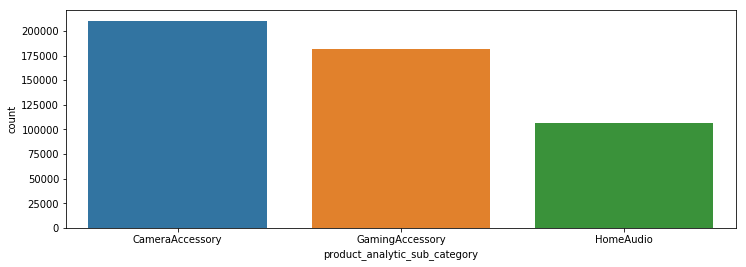

In [56]:
## No of transactions by Sub-Category
plt.figure(figsize = (12,4))
sns.countplot(df['product_analytic_sub_category'])

plt.show()

Maximum number of transactions can be seen in the category of Camera Accessory.

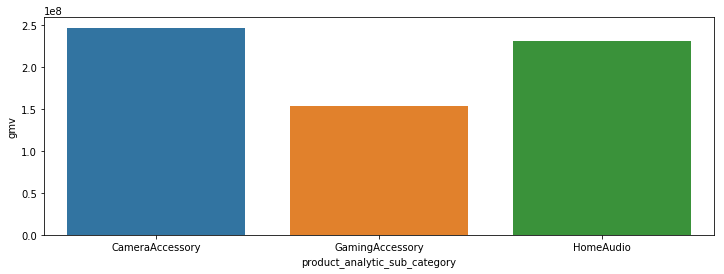

In [57]:
#Plotting total GMV by product category
plt.figure(figsize = (12,4))
gmv_plot_data = df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y = 'gmv', data = gmv_plot_data)
plt.show()

Total GMV by product subcategory - Camera>Home Audio > Gaming Accessory

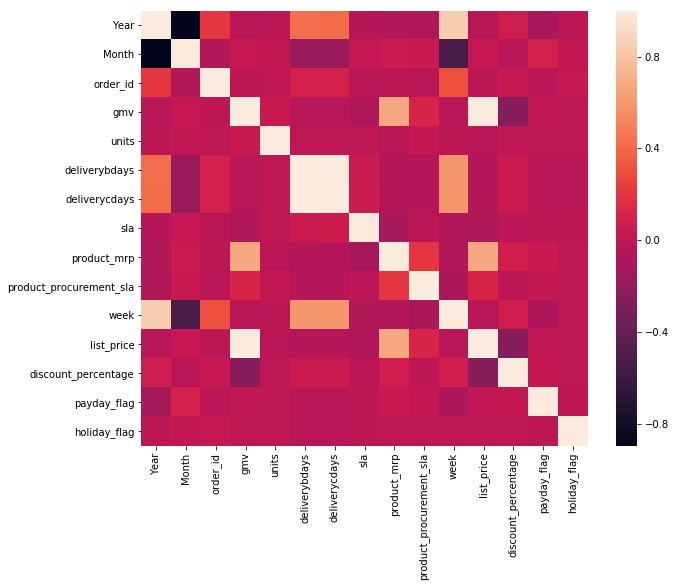

In [58]:
#plotting the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

We can observe high correlation between year and month, month and week(of order). Also between product_mrp and gmv

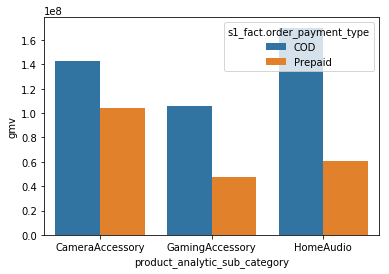

In [59]:
#Analysis -- Type of payment(COD/Prepaid) v/s GMV
payment_type_vs_gmv_data = df.groupby(['s1_fact.order_payment_type','product_analytic_sub_category'])['gmv'].sum().reset_index()
sns.barplot(x = 'product_analytic_sub_category', y = 'gmv', hue = 's1_fact.order_payment_type',data = payment_type_vs_gmv_data)

For COD : maximum orders are through Home Audio
For Prepaid : Max orders are in the Camera Accessory group.
    
Most of the people prefer COD

In [60]:
Gaming_Accessory_df = df[(df['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
Camera_Accessory_df = df[(df['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
HomeAudio_df = df[(df['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

Checking the shape for all the three df of the product sub categories

In [61]:
Gaming_Accessory_df.shape

(181445, 20)

In [62]:
Camera_Accessory_df.shape

(210336, 20)

In [63]:
HomeAudio_df.shape

(106106, 20)

In [64]:
#Defining a function to map and create a dataframe for holidays and special sale days
def dataFrameMapping(values, columns):
    df_local = pd.DataFrame(values)
    df_local[columns] = pd.to_datetime(df_local[columns]).dt.date
    df_local["total_"+columns] = 1
    df_local['week'] = pd.to_datetime(df_local[columns]).dt.week
    df_local['Year'] = pd.to_datetime(df_local[columns]).dt.year
    df_local['week'] = df_local.apply(lambda x: week(x['week']), axis = 1)
    df_local = df_local.groupby('week').sum()
    df_local["is_"+columns] = 1
    df_local.drop('Year', axis = 1, inplace = True)
    return df_local

In [65]:
#days of special sale
days_of_special_sale = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}

In [66]:
df_for_special_sale = dataFrameMapping(days_of_special_sale,'special_sale_day')

In [67]:
df_for_special_sale.shape

(16, 2)

In [68]:
df_for_special_sale.head()

total_special_sale_day  is_special_sale_day
week                                             
29                         2                    1
33                         2                    1
34                         1                    1
35                         3                    1
41                         1                    1

We need to find KPIs. So we will make KPIs for each of the business related field.

In [69]:
def KPIs_Creation(df_local):
#Payment
    df_local['payment_mode_indicator'] = df_local['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
#SP of each product in every transaction
    df_local['selling_price'] = df_local['gmv']/df['units']
#Discount offered on the products
    df_local['discount'] = np.round((df_local['product_mrp']-df_local['selling_price'])/df_local['product_mrp'],2)
#Percent of prepaid orders
    weekly_aggregated_data = df_local
    weekly_aggregated_data['order_count'] = 1
    weekly_aggregated_data = weekly_aggregated_data.groupby('week').sum()
    weekly_aggregated_data['percentage_prepaid_transactions'] = np.round((weekly_aggregated_data.payment_mode_indicator/weekly_aggregated_data.order_count)*100,2)
    weekly_aggregated_data = weekly_aggregated_data.reset_index()[['week','percentage_prepaid_transactions']]
    df_local = pd.merge(df_local,weekly_aggregated_data, how = 'inner', on = 'week')
    return df_local

In [70]:
#Weekly Aggregated KPIs

def Week_Aggr_KPIs():
#Holidays
    holidays_list = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = dataFrameMapping(holidays_list,"holiday")

#Days of Special sale
    days_of_special_sale_given = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = dataFrameMapping(days_of_special_sale_given,'special_sale_day')

    pay_days_column = {'pay_days':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    payDays_df_local = dataFrameMapping(pay_days_column,'pay_days')
    final_df_local = pd.concat([holiday_df, special_sale_day_df, payDays_df_local],axis = 1)
    return final_df_local.fillna(0).astype('int')

In [71]:
Week_Aggr_KPIs().shape

(38, 6)

In [72]:
Week_Aggr_KPIs().head()

total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
week                                                                           
27                1           1                       0                    0   
29                0           0                       2                    1   
31                0           0                       0                    0   
32                1           1                       0                    0   
33                0           0                       2                    1   

      total_pay_days  is_pay_days  
week                               
27                 1            1  
29                 1            1  
31                 1            1  
32                 0            0  
33                 1            1

In [73]:
#Adding the KPIs created to the dataframe of each sub category

GamingAccessory_with_KPIs = KPIs_Creation(Gaming_Accessory_df)
CameraAccessory_with_KPIs = KPIs_Creation(Camera_Accessory_df)
HomeAudio_with_KPIs = KPIs_Creation(HomeAudio_df)

In [74]:
GamingAccessory_with_KPIs.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-04  2015     10 1408216975064600.00 3075.00      1           0.00   
1  2015-10-04  2015     10 4408070947414700.00 2750.00      1           0.00   
2  2015-10-04  2015     10 1408057057167600.00 3079.00      1           0.00   
3  2015-10-04  2015     10 4408070947414700.00 3000.00      1           0.00   
4  2015-10-04  2015     10 3408098886314100.00 3080.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                        COD    9            GamingHardware   
1           0.00                        COD    7            GamingHardware   
2           0.00                        COD    6            GamingHardware   
3           0.00                        COD    7            GamingHardware   
4           0.00                        COD   10            GamingHardware   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0                   GamePad         3999                        5   
1                   GamePad         3999                        5   
2                   GamePad         3999                        5   
3                   GamePad         3999                        5   
4                   GamePad         3999                        5   

       order_datetime  week  list_price  discount_percentage  payday_flag  \
0 2015-10-04 19:24:36    40     3075.00                23.11            0   
1 2015-10-04 15:19:00    40     2750.00                31.23            0   
2 2015-10-04 15:04:01    40     3079.00                23.01            0   
3 2015-10-04 15:19:37    40     3000.00                24.98            0   
4 2015-10-04 16:17:30    40     3080.00                22.98            0   

   holiday_flag  payment_mode_indicator  selling_price  discount  order_count  \
0             0                       0        3075.00      0.23            1   
1             0                       0        2750.00      0.31            1   
2             0                       0        3079.00      0.23            1   
3             0                       0        3000.00      0.25            1   
4             0                       0        3080.00      0.23            1   

   percentage_prepaid_transactions  
0                            16.96  
1                            16.96  
2                            16.96  
3                            16.96  
4                            16.96

In [75]:
CameraAccessory_with_KPIs.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-17  2015     10 3419300926147000.00 6400.00      1           0.00   
1  2015-10-14  2015     10 4416592101738400.00 1690.00      1           0.00   
2  2015-10-17  2015     10 4419525153426400.00 1618.00      1           0.00   
3  2015-10-17  2015     10 3419188825145600.00 3324.00      1           0.00   
4  2015-10-16  2015     10 3418428515041500.00 3695.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                        COD    5           CameraAccessory   
1           0.00                    Prepaid    4           CameraAccessory   
2           0.00                    Prepaid    6           CameraAccessory   
3           0.00                    Prepaid    5           CameraAccessory   
4           0.00                    Prepaid    6           CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0              CameraTripod         7190                        0   
1              CameraTripod         2099                        3   
2              CameraTripod         2099                        3   
3              CameraTripod         4044                        5   
4              CameraTripod         4044                        5   

       order_datetime  week  list_price  discount_percentage  payday_flag  \
0 2015-10-17 15:11:54    42     6400.00                10.99            0   
1 2015-10-14 12:05:15    42     1690.00                19.49            1   
2 2015-10-17 21:25:03    42     1618.00                22.92            0   
3 2015-10-17 12:07:24    42     3324.00                17.80            0   
4 2015-10-16 14:59:57    42     3695.00                 8.63            1   

   holiday_flag  payment_mode_indicator  selling_price  discount  order_count  \
0             0                       0        6400.00      0.11            1   
1             0                       1        1690.00      0.19            1   
2             0                       1        1618.00      0.23            1   
3             0                       1        3324.00      0.18            1   
4             0                       1        3695.00      0.09            1   

   percentage_prepaid_transactions  
0                            28.82  
1                            28.82  
2                            28.82  
3                            28.82  
4                            28.82

In [76]:
HomeAudio_with_KPIs.head()

order_date  Year  Month            order_id     gmv  units  deliverybdays  \
0  2015-10-03  2015     10 1407395732747800.00 7049.00      1           0.00   
1  2015-10-02  2015     10 2406390277660300.00 6900.00      1           0.00   
2  2015-10-02  2015     10 2406358434761600.00 6099.00      1           0.00   
3  2015-10-03  2015     10 2407182600388400.00 7150.00      1           0.00   
4  2015-10-01  2015     10 2405684398213000.00 2159.00      1           0.00   

   deliverycdays s1_fact.order_payment_type  sla product_analytic_category  \
0           0.00                    Prepaid    5        EntertainmentSmall   
1           0.00                        COD    6        EntertainmentSmall   
2           0.00                    Prepaid    2        EntertainmentSmall   
3           0.00                    Prepaid    5        EntertainmentSmall   
4           0.00                    Prepaid    6        EntertainmentSmall   

  product_analytic_vertical  product_mrp  product_procurement_sla  \
0          HomeAudioSpeaker         7499                        5   
1          HomeAudioSpeaker         7499                        5   
2          HomeAudioSpeaker         7499                        5   
3          HomeAudioSpeaker         9999                        2   
4          HomeAudioSpeaker         2800                        5   

       order_datetime  week  list_price  discount_percentage  payday_flag  \
0 2015-10-03 20:35:30    40     7049.00                 6.00            0   
1 2015-10-02 16:37:23    40     6900.00                 7.99            0   
2 2015-10-02 15:45:53    40     6099.00                18.67            0   
3 2015-10-03 14:55:56    40     7150.00                28.49            0   
4 2015-10-01 21:02:49    40     2159.00                22.89            0   

   holiday_flag  payment_mode_indicator  selling_price  discount  order_count  \
0             0                       1        7049.00      0.06            1   
1             0                       0        6900.00      0.08            1   
2             0                       1        6099.00      0.19            1   
3             0                       1        7150.00      0.28            1   
4             0                       1        2159.00      0.23            1   

   percentage_prepaid_transactions  
0                            21.83  
1                            21.83  
2                            21.83  
3                            21.83  
4                            21.83

KPIs for product analytical vertical 

In [77]:
product_vertical_camera_accessory = CameraAccessory_with_KPIs.groupby(['week','product_analytic_vertical'])['units'].sum().reset_index()
CamAccessory_prodvert_KPI = product_vertical_camera_accessory.pivot_table(index='week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
CamAccessory_prodvert_KPI.columns


Index(['week', 'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Teleconverter', 'Telescope'],
      dtype='object', name='product_analytic_vertical')

In [78]:
CamAccessory_prodvert_KPI[CamAccessory_prodvert_KPI.columns] = CamAccessory_prodvert_KPI[CamAccessory_prodvert_KPI.columns].apply(pd.to_numeric, errors='coerce')
CameraAccessorywith_KPIs = CameraAccessory_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [79]:
#Checking for the  number of units sold in each of the vertical

product_vertical_camera_accessory.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by = ['units'],ascending = False).head()

product_analytic_vertical  units
15                     Flash  48310
3              CameraBattery  36162
17                      Lens  31514
12              CameraTripod  31475
2                  CameraBag  15744

The highest item is Flash followed by Camera Battery and lens

Doing similar analysis for the other categories

In [80]:
product_vertical_gaming_accessory = GamingAccessory_with_KPIs.groupby(['week','product_analytic_vertical'])['units'].sum().reset_index()
GameAccessory_prodvert_KPI = product_vertical_gaming_accessory.pivot_table(index='week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
GameAccessory_prodvert_KPI.columns


Index(['week', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object', name='product_analytic_vertical')

In [81]:
GameAccessory_prodvert_KPI[GameAccessory_prodvert_KPI.columns] = GameAccessory_prodvert_KPI[GameAccessory_prodvert_KPI.columns].apply(pd.to_numeric, errors='coerce')
GameAccessory_with_KPIs = GamingAccessory_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [82]:
product_vertical_gaming_accessory.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by = ['units'],ascending = False).head()

product_analytic_vertical  units
6              GamingHeadset  60138
2                    GamePad  53581
9                GamingMouse  36088
3         GamingAccessoryKit   8392
14       TVOutCableAccessory   6750

Highest is Gaming headset followes by Game Pad and Gaming Mouse.

In [83]:
product_vertical_homeAudio_accessory = HomeAudio_with_KPIs.groupby(['week','product_analytic_vertical'])['units'].sum().reset_index()
HomeAudio_prodvert_KPI = product_vertical_homeAudio_accessory.pivot_table(index='week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
HomeAudio_prodvert_KPI.columns


Index(['week', 'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox',
       'SoundMixer', 'VoiceRecorder'],
      dtype='object', name='product_analytic_vertical')

In [84]:
HomeAudio_prodvert_KPI[HomeAudio_prodvert_KPI.columns] = HomeAudio_prodvert_KPI[HomeAudio_prodvert_KPI.columns].apply(pd.to_numeric, errors='coerce')
HomeAudio_with_KPIs = HomeAudio_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [85]:
product_vertical_homeAudio_accessory.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by = ['units'],ascending = False).head()

product_analytic_vertical  units
6           HomeAudioSpeaker  76085
4                    FMRadio  21199
10             VoiceRecorder   3536
0                    BoomBox   2410
2                       Dock   1898

Highest is Home Audio Speaker followed by FM Radio and Voice Recorder

## Including NPS

In [86]:
#Reading media data from the excel file
NPS_file = pd.read_excel("C:/Users/asahu1/Downloads/Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()


In [87]:
NPS_file

index   NPS  Stock Index
0   July'15 54.60      1177.00
1    Aug'15 59.99      1206.00
2   Sept'15 46.93      1101.00
3    Oct'15 44.40      1210.00
4    Nov'15 47.00      1233.00
5    Dec'15 45.80      1038.00
6    Jan'16 47.09      1052.00
7    Feb'16 50.33      1222.00
8    Mar'16 49.02      1015.00
9    Apr'16 51.83      1242.00
10   May'16 47.31      1228.00
11  June'16 50.52      1194.00

In [88]:
#Month and Year to merge with data previously acquired
NPS_file['Year'] = NPS_file['index'].apply(lambda x: int("20"+x.split("'")[1]))
NPS_file['Month'] = NPS_file['index'].apply(lambda x: x.split("'")[0][:3])


In [89]:
#Converting month names to number of the month
import calendar

dictionary = dict((v,k) for k,v in enumerate(calendar.month_abbr))
dictionary




{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [90]:
NPS_file.Month = NPS_file.Month.apply(lambda x: dictionary.get(x))

In [91]:
#Drop of index from the excel sheet NPS_file
NPS_file.drop('index', inplace = True, axis = 1)

In [92]:
NPS_file

NPS  Stock Index  Year  Month
0  54.60      1177.00  2015      7
1  59.99      1206.00  2015      8
2  46.93      1101.00  2015      9
3  44.40      1210.00  2015     10
4  47.00      1233.00  2015     11
5  45.80      1038.00  2015     12
6  47.09      1052.00  2016      1
7  50.33      1222.00  2016      2
8  49.02      1015.00  2016      3
9  51.83      1242.00  2016      4
10 47.31      1228.00  2016      5
11 50.52      1194.00  2016      6

In [93]:
#Merging the NPS KPI with the other KPIs earlier obtained for each of the product subcategory
GamingAccessory_with_KPIs = pd.merge(NPS_file,GamingAccessory_with_KPIs, on = ['Month','Year'],how='inner')
CameraAccessory_with_KPIs = pd.merge(NPS_file,CameraAccessory_with_KPIs, on = ['Month','Year'],how='inner')
HomeAudio_with_KPIs = pd.merge(NPS_file,HomeAudio_with_KPIs, on = ['Month','Year'],how='inner')

In [94]:
#Camera   - Aggregating weekly. For some we are taking the sum and for some we are taking the mean
cam_acc_sum = CameraAccessory_with_KPIs[['gmv','units','week']].groupby('week').sum()
cam_acc_mean = CameraAccessory_with_KPIs[['sla','product_procurement_sla','week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('week').mean()
cam_acc_count = CameraAccessory_with_KPIs[['order_id','week']].groupby('week').count().rename(columns={'order_id':'total_transactions'})
final_data_for_camera = pd.concat([cam_acc_sum, cam_acc_mean,cam_acc_count], axis = 1).reset_index()

In [95]:
#Gaming   - Aggregating weekly. For some we are taking the sum and for some we are taking the mean
game_acc_sum = GamingAccessory_with_KPIs[['gmv','units','week']].groupby('week').sum()
game_acc_mean = GamingAccessory_with_KPIs[['sla','product_procurement_sla','week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('week').mean()
game_acc_count = GamingAccessory_with_KPIs[['order_id','week']].groupby('week').count().rename(columns={'order_id':'total_transactions'})
final_data_for_gaming = pd.concat([game_acc_sum, game_acc_mean,game_acc_count], axis = 1).reset_index()

In [96]:
#Home Audio   - Aggregating weekly. For some we are taking the sum and for some we are taking the mean
home_audio_sum = HomeAudio_with_KPIs[['gmv','units','week']].groupby('week').sum()
home_audio_mean = HomeAudio_with_KPIs[['sla','product_procurement_sla','week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('week').mean()
home_audio_count = HomeAudio_with_KPIs[['order_id','week']].groupby('week').count().rename(columns={'order_id':'total_transactions'})
final_data_for_home_audio = pd.concat([home_audio_sum, home_audio_mean,home_audio_count], axis = 1).reset_index()

In [97]:
Week_Aggr_KPIs().rename(columns={'order_week':'week'})

total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
week                                                                           
27                1           1                       0                    0   
29                0           0                       2                    1   
31                0           0                       0                    0   
32                1           1                       0                    0   
33                0           0                       2                    1   
34                0           0                       1                    1   
35                0           0                       3                    1   
36                0           0                       0                    0   
37                1           1                       0                    0   
38                0           0                       0                    0   
40                0           0                       0                    0   
41                0           0                       1                    1   
42                1           1                       4                    1   
44                1           1                       0                    0   
45                0           0                       2                    1   
46                1           1                       4                    1   
49                0           0                       0                    0   
51                0           0                       0                    0   
52                2           1                       3                    1   
53                1           1                       6                    1   
55                0           0                       0                    0   
56                0           0                       3                    1   
58                0           0                       2                    1   
59                1           1                       1                    1   
60                1           1                       3                    1   
62                0           0                       0                    0   
63                0           0                       3                    1   
64                1           1                       0                    0   
66                1           1                       0                    0   
67                1           1                       0                    0   
68                0           0                       0                    0   
70                0           0                       0                    0   
72                1           1                       0                    0   
73                1           1                       0                    0   
74                0           0                       3                    1   
75                0           0                       0                    0   
77                0           0                       0                    0   
78                2           1                       0                    0   

      total_pay_days  is_pay_days  
week                               
27                 1            1  
29                 1            1  
31                 1            1  
32                 0            0  
33                 1            1  
34                 0            0  
35                 0            0  
36                 1            1  
37                 0            0  
38                 1            1  
40                 1            1  
41                 0            0  
42                 1            1  
44                 1            1  
45                 0            0  
46                 1            1  
49                 1            1  
51                 1            1  
52                 0            0  
53                 1            1  
55           

In [98]:
final_data_for_gaming = pd.merge(final_data_for_gaming, Week_Aggr_KPIs().reset_index(), on = 'week', how = 'left').fillna(0)
final_data_for_gaming.shape

(53, 16)

In [99]:
final_data_for_home_audio = pd.merge(final_data_for_home_audio, Week_Aggr_KPIs().reset_index(), on = 'week', how = 'left').fillna(0)
final_data_for_home_audio.shape

(50, 16)

In [100]:
final_data_for_camera = pd.merge(final_data_for_camera, Week_Aggr_KPIs().reset_index(), on = 'week', how = 'left').fillna(0)
final_data_for_camera.shape

(52, 16)

In [101]:
#various KPIs creation
COD_count = GamingAccessory_with_KPIs.loc[GamingAccessory_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
PREPAID_count = GamingAccessory_with_KPIs.loc[GamingAccessory_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
orders_online_GA = pd.merge(COD_count,PREPAID_count,on = "week", how = "outer").fillna(0)
orders_online_GA["percentageOf_online_transactions"] = (orders_online_GA["Prepaid_count"]/(orders_online_GA["Prepaid_count"]+orders_online_GA["COD_count"])).round(2)

In [102]:
#various KPIs creation
COD_count = CameraAccessory_with_KPIs.loc[CameraAccessory_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
PREPAID_count = CameraAccessory_with_KPIs.loc[CameraAccessory_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
orders_online_CA = pd.merge(COD_count,PREPAID_count,on = "week", how = "outer").fillna(0)
orders_online_CA["percentageOf_online_transactions"] = (orders_online_CA["Prepaid_count"]/(orders_online_CA["Prepaid_count"]+orders_online_CA["COD_count"])).round(2)

In [103]:
#various KPIs creation
COD_count = HomeAudio_with_KPIs.loc[HomeAudio_with_KPIs['s1_fact.order_payment_type'] == "COD"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'COD_count'})
PREPAID_count = HomeAudio_with_KPIs.loc[HomeAudio_with_KPIs['s1_fact.order_payment_type'] == "Prepaid"].groupby('week')['s1_fact.order_payment_type'].count().reset_index().rename(columns={'s1_fact.order_payment_type':'Prepaid_count'})
orders_online_HA = pd.merge(COD_count,PREPAID_count,on = "week", how = "outer").fillna(0)
orders_online_HA["percentageOf_online_transactions"] = (orders_online_HA["Prepaid_count"]/(orders_online_HA["Prepaid_count"]+orders_online_HA["COD_count"])).round(2)

In [104]:
#Merge with KPI -- Prepaid/COD
final_data_for_camera = pd.merge(final_data_for_camera,orders_online_GA,on = "week", how = "left")
final_data_for_camera.shape

(52, 19)

In [105]:
#Merge with KPI -- Prepaid/COD
final_data_for_home_audio = pd.merge(final_data_for_home_audio,orders_online_HA,on = "week", how = "left")
final_data_for_home_audio.shape

(50, 19)

In [106]:
#Merge with KPI -- Prepaid/COD
final_data_for_gaming = pd.merge(final_data_for_gaming,orders_online_HA,on = "week", how = "left")
final_data_for_gaming.shape

(53, 19)

In [107]:
#Merge with Product Analytical Vertical KPI
final_data_for_home_audio = pd.merge(final_data_for_home_audio,HomeAudio_prodvert_KPI,on=['week'],how='left')
final_data_for_home_audio.shape

(50, 30)

In [108]:
#Merge with Product Analytical Vertical KPI
final_data_for_gaming = pd.merge(final_data_for_gaming,GameAccessory_prodvert_KPI,on=['week'],how='left')
final_data_for_gaming.shape

(53, 34)

In [109]:
#Merge with Product Analytical Vertical KPI
final_data_for_camera = pd.merge(final_data_for_camera,CamAccessory_prodvert_KPI,on=['week'],how='left')
final_data_for_camera.shape

(52, 42)

In [110]:
final_data_for_camera.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Teleconverter',
       'Telescope'],
      dtype='object')

In [111]:
final_data_for_home_audio.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [112]:
final_data_for_gaming.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

## Reading Media investment data - Merging with three seperate DF

In [113]:
media_investment_data = pd.read_excel("C:/Users/asahu1/Downloads/Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment_data

Year  Month  Total Investment    TV  Digital  Sponsorship  \
nan 2015.00   7.00             17.06  0.22     2.53         7.41   
nan 2015.00   8.00              5.06  0.01     1.28         1.06   
nan 2015.00   9.00             96.25  3.88     1.36        62.79   
nan 2015.00  10.00            170.16  6.14    12.62        84.67   
nan 2015.00  11.00             51.22  4.22     1.28        14.17   
nan 2015.00  12.00            106.75  5.40     3.06        56.71   
nan 2016.00   1.00             74.20  4.38     0.46         4.20   
nan 2016.00   2.00             48.05  2.59     1.91        11.73   
nan 2016.00   3.00            100.02  9.30     2.10        41.59   
nan 2016.00   4.00             56.85  5.21     0.87        24.31   
nan 2016.00   5.00             78.06  1.37     0.77        31.68   
nan 2016.00   6.00             42.83  1.66     1.42        25.05   
nan     nan    nan               nan   nan      nan          nan   
nan     nan    nan               nan   nan      nan          nan   
nan     nan    nan               nan   nan      nan          nan   
nan     nan    nan               nan 18.55      nan          nan   

     Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
nan               0.00              1.33         0.55  5.02    nan    nan  
nan               0.00              0.13         0.07  2.51    nan    nan  
nan               0.61             16.38         5.04  6.20    nan    nan  
nan               3.44             24.37         6.97 31.93    nan    nan  
nan               0.17             19.56         6.60  5.22    nan    nan  
nan               1.07             22.50         6.83 11.18    nan    nan  
nan               0.90             22.90         7.37  4.20   2.70  27.09  
nan               0.60             19.89         6.47  4.87    nan    nan  
nan               0.37             18.44         6.22  5.19   0.87  15.95  
nan               0.03             16.51         5.69  4.22    nan    nan  
nan               0.79             23.65         6.80  6.91   1.10   4.99  
nan               0.05              7.97         2.77  3.74    nan    nan  
nan                nan               nan          nan   nan    nan    nan  
nan                nan               nan          nan   nan    nan    nan  
nan                nan               nan          nan   nan    nan    nan  
nan                nan               nan          nan   nan    nan    nan

In [114]:

media_investment_data = media_investment_data.iloc[:-4].reset_index()
media_investment_data.drop('index', inplace = True, axis = 1)

In [115]:
#Converting year and month into int
media_investment_data['Year'] = media_investment_data['Year'].astype('int')
media_investment_data['Month'] = media_investment_data['Month'].astype('int')

In [116]:
#Filling nan value with zero

media_investment_data = media_investment_data.fillna(0)

In [117]:
#Mapping of no of weeks
no_of_weeks = {'Month': [1,2,3,4,5,6,7,8,9,10,11,12], 'no_of_weeks' : [4,4,5,4,4,5,4,4,5,4,4,5]}
no_of_weeks_df = pd.DataFrame(no_of_weeks)
no_of_weeks_df

Month  no_of_weeks
0       1            4
1       2            4
2       3            5
3       4            4
4       5            4
5       6            5
6       7            4
7       8            4
8       9            5
9      10            4
10     11            4
11     12            5

In [118]:
#Merging media investment and number of weeks
media_investment_data = pd.merge(media_investment_data, no_of_weeks_df, on ='Month', how = 'inner') 

In [119]:
#Weekly investment done through various channels
media_investment_data['TV']  = media_investment_data['TV']/media_investment_data['no_of_weeks']
media_investment_data['Digital']  = media_investment_data['Digital']/media_investment_data['no_of_weeks']
media_investment_data['Sponsorship']  = media_investment_data['Sponsorship']/media_investment_data['no_of_weeks']
media_investment_data['Content Marketing']  = media_investment_data['Content Marketing']/media_investment_data['no_of_weeks']
media_investment_data['Online marketing']  = media_investment_data['Online marketing']/media_investment_data['no_of_weeks']
media_investment_data[' Affiliates']  = media_investment_data[' Affiliates']/media_investment_data['no_of_weeks']
media_investment_data['SEM']  = media_investment_data['SEM']/media_investment_data['no_of_weeks']
media_investment_data['Radio']  = media_investment_data['Radio']/media_investment_data['no_of_weeks']
media_investment_data['Other']  = media_investment_data['Other']/media_investment_data['no_of_weeks']

In [120]:
media_investment_data.head()

Year  Month  Total Investment   TV  Digital  Sponsorship  \
0  2015      7             17.06 0.05     0.63         1.85   
1  2015      8              5.06 0.00     0.32         0.27   
2  2015      9             96.25 0.78     0.27        12.56   
3  2015     10            170.16 1.54     3.16        21.17   
4  2015     11             51.22 1.06     0.32         3.54   

   Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  \
0               0.00              0.33         0.14 1.26   0.00   0.00   
1               0.00              0.03         0.02 0.63   0.00   0.00   
2               0.12              3.28         1.01 1.24   0.00   0.00   
3               0.86              6.09         1.74 7.98   0.00   0.00   
4               0.04              4.89         1.65 1.31   0.00   0.00   

   no_of_weeks  
0            4  
1            4  
2            5  
3            4  
4            4

In [121]:
#Creating unique week, month and the year present in the original dataframe
week_of_order_data = df[['week', 'Month','Year']].drop_duplicates(keep = 'first', subset = None).reset_index().drop("index",axis = 1).sort_values(by='week')
week_of_order_data = week_of_order_data.sort_values(by = ['week','Month']).drop_duplicates(keep = 'last', subset = 'week')
week_of_order_data

week  Month  Year
56    27      7  2015
53    28      7  2015
51    29      7  2015
52    30      7  2015
60    31      8  2015
59    32      8  2015
58    33      8  2015
57    34      8  2015
24    35      8  2015
61    36      9  2015
55    37      9  2015
12    38      9  2015
22    39      9  2015
4     40     10  2015
2     41     10  2015
0     42     10  2015
1     43     10  2015
14    44     11  2015
5     45     11  2015
6     46     11  2015
11    47     11  2015
10    48     11  2015
29    49     12  2015
33    50     12  2015
34    51     12  2015
36    52     12  2015
37    53     12  2015
38    54      1  2016
17    55      1  2016
25    56      1  2016
27    57      1  2016
19    58      2  2016
35    59      2  2016
18    60      2  2016
9     61      2  2016
23    62      3  2016
8     63      3  2016
20    64      3  2016
31    65      3  2016
21    66      4  2016
16    67      4  2016
39    68      4  2016
7     69      4  2016
43    70      5  2016
32    71      5  2016
42    72      5  2016
45    73      5  2016
41    74      5  2016
46    75      6  2016
47    76      6  2016
48    77      6  2016
49    78      6  2016
50    79      6  2016

In [122]:
media_investment_data_per_week = pd.merge(week_of_order_data, media_investment_data, on = ["Month","Year"], how = "inner").drop('no_of_weeks', axis =1)
media_investment_data_per_week.head()

week  Month  Year  Total Investment   TV  Digital  Sponsorship  \
0    27      7  2015             17.06 0.05     0.63         1.85   
1    28      7  2015             17.06 0.05     0.63         1.85   
2    29      7  2015             17.06 0.05     0.63         1.85   
3    30      7  2015             17.06 0.05     0.63         1.85   
4    31      8  2015              5.06 0.00     0.32         0.27   

   Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  
0               0.00              0.33         0.14 1.26   0.00   0.00  
1               0.00              0.33         0.14 1.26   0.00   0.00  
2               0.00              0.33         0.14 1.26   0.00   0.00  
3               0.00              0.33         0.14 1.26   0.00   0.00  
4               0.00              0.03         0.02 0.63   0.00   0.00

In [123]:
#Function to create adstock value
def gettingValuesOfAdStock(media_invDf,col_name, rate):
    media_invDf['week1'] = rate**1 * media_invDf[col_name]
    media_invDf['week2'] = rate**2 * media_invDf[col_name]
    media_invDf['week3'] = rate**3 * media_invDf[col_name]
    media_invDf['week4'] = rate**4 * media_invDf[col_name]
    media_invDf['week5'] = rate**5 * media_invDf[col_name]
    for i in range(0, len(media_invDf)):
        week1carry  = media_invDf.loc[i-1,["week1"]][0] if(i-1 > -1) else 0
        week2carry  = media_invDf.loc[i-2,["week2"]][0] if(i-2 > -1) else 0
        week3carry  = media_invDf.loc[i-3,["week3"]][0] if(i-3 > -1) else 0
        week4carry  = media_invDf.loc[i-4,["week4"]][0] if(i-4 > -1) else 0
        week5carry  = media_invDf.loc[i-5,["week5"]][0] if(i-5 > -1) else 0
        media_invDf.loc[i,"adStock_"+col_name] = media_invDf.loc[i,[col_name]][0] + week1carry + week2carry + week3carry + week4carry + week5carry
    return media_invDf[["week","adStock_"+col_name]]

In [124]:
#Creating adstocks for each of the investments by calling the above created function
TV = gettingValuesOfAdStock(media_investment_data_per_week[['TV','week']],"TV", 0.5)[["adStock_TV"]]
digital = gettingValuesOfAdStock(media_investment_data_per_week[['Digital','week']],"Digital", 0.5)[["adStock_Digital"]]
sponsorship = gettingValuesOfAdStock(media_investment_data_per_week[['Sponsorship','week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
contentMarketing = gettingValuesOfAdStock(media_investment_data_per_week[['Content Marketing','week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
onlineMarketing = gettingValuesOfAdStock(media_investment_data_per_week[['Online marketing','week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
Affiliates = gettingValuesOfAdStock(media_investment_data_per_week[[' Affiliates','week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
SEM = gettingValuesOfAdStock(media_investment_data_per_week[['SEM','week']],"SEM", 0.5)[["adStock_SEM"]]
Radio = gettingValuesOfAdStock(media_investment_data_per_week[['Radio','week']],"Radio", 0.5)[["adStock_Radio"]]
Other = gettingValuesOfAdStock(media_investment_data_per_week[['Other','week']],"Other", 0.5)

In [125]:
adstock_combined = pd.concat([TV,digital,sponsorship, contentMarketing, onlineMarketing, Affiliates, SEM, Radio, Other], axis = 1)

In [126]:
adstock_combined.head()

adStock_TV  adStock_Digital  adStock_Sponsorship  \
0        0.05             0.63                 1.85   
1        0.08             0.95                 2.78   
2        0.09             1.11                 3.24   
3        0.10             1.19                 3.48   
4        0.05             0.91                 2.00   

   adStock_Content Marketing  adStock_Online marketing  adStock_ Affiliates  \
0                       0.00                      0.33                 0.14   
1                       0.00                      0.50                 0.21   
2                       0.00                      0.58                 0.24   
3                       0.00                      0.62                 0.26   
4                       0.00                      0.34                 0.15   

   adStock_SEM  adStock_Radio  week  adStock_Other  
0         1.26           0.00    27           0.00  
1         1.88           0.00    28           0.00  
2         2.20           0.00    29           0.00  
3         2.35           0.00    30           0.00  
4         1.81           0.00    31           0.00

In [127]:
adstock_combined.shape

(53, 10)

In [128]:
adstock_combined_final = pd.merge(media_investment_data_per_week,adstock_combined, on = "week", how = 'inner')

In [129]:
adstock_combined_final.shape

(53, 22)

In [130]:
adstock_combined_final

week  Month  Year  Total Investment   TV  Digital  Sponsorship  \
0     27      7  2015             17.06 0.05     0.63         1.85   
1     28      7  2015             17.06 0.05     0.63         1.85   
2     29      7  2015             17.06 0.05     0.63         1.85   
3     30      7  2015             17.06 0.05     0.63         1.85   
4     31      8  2015              5.06 0.00     0.32         0.27   
5     32      8  2015              5.06 0.00     0.32         0.27   
6     33      8  2015              5.06 0.00     0.32         0.27   
7     34      8  2015              5.06 0.00     0.32         0.27   
8     35      8  2015              5.06 0.00     0.32         0.27   
9     36      9  2015             96.25 0.78     0.27        12.56   
10    37      9  2015             96.25 0.78     0.27        12.56   
11    38      9  2015             96.25 0.78     0.27        12.56   
12    39      9  2015             96.25 0.78     0.27        12.56   
13    40     10  2015            170.16 1.54     3.16        21.17   
14    41     10  2015            170.16 1.54     3.16        21.17   
15    42     10  2015            170.16 1.54     3.16        21.17   
16    43     10  2015            170.16 1.54     3.16        21.17   
17    44     11  2015             51.22 1.06     0.32         3.54   
18    45     11  2015             51.22 1.06     0.32         3.54   
19    46     11  2015             51.22 1.06     0.32         3.54   
20    47     11  2015             51.22 1.06     0.32         3.54   
21    48     11  2015             51.22 1.06     0.32         3.54   
22    49     12  2015            106.75 1.08     0.61        11.34   
23    50     12  2015            106.75 1.08     0.61        11.34   
24    51     12  2015            106.75 1.08     0.61        11.34   
25    52     12  2015            106.75 1.08     0.61        11.34   
26    53     12  2015            106.75 1.08     0.61        11.34   
27    54      1  2016             74.20 1.09     0.11         1.05   
28    55      1  2016             74.20 1.09     0.11         1.05   
29    56      1  2016             74.20 1.09     0.11         1.05   
30    57      1  2016             74.20 1.09     0.11         1.05   
31    58      2  2016             48.05 0.65     0.48         2.93   
32    59      2  2016             48.05 0.65     0.48         2.93   
33    60      2  2016             48.05 0.65     0.48         2.93   
34    61      2  2016             48.05 0.65     0.48         2.93   
35    62      3  2016            100.02 1.86     0.42         8.32   
36    63      3  2016            100.02 1.86     0.42         8.32   
37    64      3  2016            100.02 1.86     0.42         8.32   
38    65      3  2016            100.02 1.86     0.42         8.32   
39    66      4  2016             56.85 1.30     0.22         6.08   
40    67      4  2016             56.85 1.30     0.22         6.08   
41    68      4  2016             56.85 1.30     0.22         6.08   
42    69      4  2016             56.85 1.30     0.22         6.08   
43    70      5  2016             78.06 0.34     0.19         7.92   
44    71      5  2016             78.06 0.34     0.19         7.92   
45    72      5  2016             78.06 0.34     0.19         7.92   
46    73      5  2016             78.06 0.34     0.19         7.92   
47    74      5  2016             78.06 0.34     0.19         7.92   
48    75      6  2016             42.83 0.33     0.28         5.01   
49    76      6  2016             42.83 0.33     0.28         5.01   
50    77      6  2016             42.83 0.33     0.28         5.01   
51    78      6  2016             42.83 0.33     0.28         5.01   
52    79      6  2016             42.83 0.33     0.28         5.01   

    Content Marketing  Online marketing   Affiliates  SEM  Radio  Other  \
0                0.00              0.33         0.14 1.26   0.00   0.00   
1                0.00              0.33         0.14 1.26   0.00   0.00  

In [131]:
adstock_combined_final.columns

Index(['week', 'Month', 'Year', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [132]:
adstock_combined_final.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [133]:
adstock_combined_final

week  Month  Year  adStock_TV  adStock_Digital  adStock_Sponsorship  \
0     27      7  2015        0.05             0.63                 1.85   
1     28      7  2015        0.08             0.95                 2.78   
2     29      7  2015        0.09             1.11                 3.24   
3     30      7  2015        0.10             1.19                 3.48   
4     31      8  2015        0.05             0.91                 2.00   
5     32      8  2015        0.03             0.78                 1.27   
6     33      8  2015        0.01             0.70                 0.87   
7     34      8  2015        0.01             0.66                 0.67   
8     35      8  2015        0.00             0.64                 0.57   
9     36      9  2015        0.78             0.58                12.82   
10    37      9  2015        1.16             0.56                18.96   
11    38      9  2015        1.36             0.54                22.03   
12    39      9  2015        1.45             0.54                23.57   
13    40     10  2015        2.26             3.42                32.95   
14    41     10  2015        2.67             4.86                37.64   
15    42     10  2015        2.86             5.58                39.79   
16    43     10  2015        2.95             5.94                40.87   
17    44     11  2015        2.52             3.29                23.78   
18    45     11  2015        2.30             1.96                15.24   
19    46     11  2015        2.18             1.25                10.83   
20    47     11  2015        2.12             0.89                 8.63   
21    48     11  2015        2.09             0.72                 7.53   
22    49     12  2015        2.10             0.92                14.77   
23    50     12  2015        2.11             1.07                18.67   
24    51     12  2015        2.12             1.14                20.62   
25    52     12  2015        2.12             1.18                21.60   
26    53     12  2015        2.12             1.20                22.08   
27    54      1  2016        2.14             0.71                12.04   
28    55      1  2016        2.15             0.46                 6.89   
29    56      1  2016        2.15             0.33                 4.32   
30    57      1  2016        2.15             0.27                 3.03   
31    58      2  2016        1.71             0.60                 4.27   
32    59      2  2016        1.48             0.77                 4.89   
33    60      2  2016        1.37             0.86                 5.36   
34    61      2  2016        1.31             0.91                 5.59   
35    62      3  2016        2.50             0.87                11.10   
36    63      3  2016        3.09             0.85                13.85   
37    64      3  2016        3.40             0.84                15.20   
38    65      3  2016        3.55             0.83                15.87   
39    66      4  2016        3.07             0.63                13.97   
40    67      4  2016        2.82             0.52                13.01   
41    68      4  2016        2.68             0.47                12.45   
42    69      4  2016        2.61             0.45                12.17   
43    70      5  2016        1.62             0.41                13.88   
44    71      5  2016        1.12             0.39                14.73   
45    72      5  2016        0.88             0.38                15.19   
46    73      5  2016        0.76             0.38                15.42   
47    74      5  2016        0.70             0.38                15.53   
48    75      6  2016        0.66             0.47                12.68   
49    76      6  2016        0.66             0.52                11.23   
50    77      6  2016        0.66             0.54                10.50   
51    78      6  2016        0.66             0.55                10.14   
52    79      6  2016        

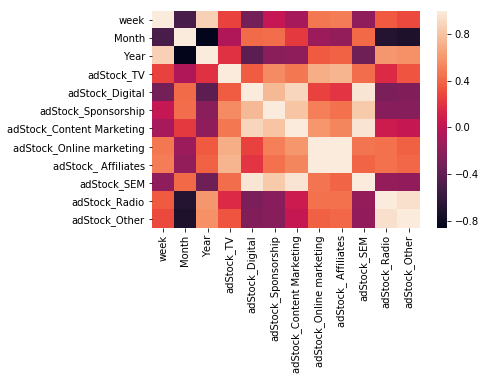

In [134]:
sns.heatmap(adstock_combined_final.corr())

In [135]:
#Merging adstock data with all the previous data for different subcategories
final_data_for_home_audio_including_adstock = pd.merge(final_data_for_home_audio,adstock_combined_final, on = 'week', how = 'right')

In [136]:
final_data_for_gaming_including_adstock = pd.merge(final_data_for_gaming,adstock_combined_final, on = 'week', how = 'right')

In [137]:
final_data_for_camera_including_adstock = pd.merge(final_data_for_camera,adstock_combined_final, on = 'week', how = 'right')

In [138]:
final_data_for_gaming_including_adstock

week        gmv  units  sla  product_procurement_sla  product_mrp  \
0     27   36731.00     27 3.15                     2.81      3799.19   
1     28 2655731.00   2980 5.41                     3.16      1905.73   
2     29 2227555.36   2866 5.29                     2.64      1864.54   
3     30 2542682.50   2445 5.43                     2.51      2417.24   
4     31 1818388.00   1761 5.69                     2.65      5311.19   
5     32    2295.00      4 7.25                     2.25      1918.50   
6     33    4875.00      4 6.00                     2.50      2583.25   
7     34     598.00      2 2.00                     2.50       599.00   
8     35    2303.00      4 6.00                     3.25      1035.75   
9     36 2097881.50   2749 5.18                     2.68      1671.18   
10    37 2384974.00   2562 5.52                     2.67      2185.54   
11    38 2509072.00   2554 5.83                     2.68      2633.67   
12    39 2458820.00   2649 5.95                     2.52      2634.58   
13    40 2383947.00   2515 5.91                     2.62      2646.53   
14    41 2035934.00   2304 5.54                     2.49      2051.91   
15    42 7162738.56  11299 5.23                     2.93      4851.98   
16    43 2242108.57   2690 6.11                     2.52      1683.62   
17    44 2718399.96   3788 5.80                     2.13      1732.66   
18    45 3400761.71   4663 5.14                     2.37      1558.62   
19    46 2577265.50   3570 6.08                     2.31      1642.57   
20    47 2080763.00   2608 5.71                     2.43      1840.85   
21    48 2789937.00   3881 5.85                     2.52      1880.11   
22    49 2930598.00   3683 6.03                     2.47      1746.57   
23    50 3369285.50   4218 5.47                     2.63      1905.02   
24    51 2720945.00   3640 6.43                     2.54      1711.00   
25    52 4219307.00   5821 5.72                     2.57      1801.56   
26    53 3174318.00   4107 5.92                     2.48      2484.84   
27    54 3356611.00   4453 5.87                     2.49      2621.79   
28    55 2986744.00   3952 5.86                     2.46      2361.99   
29    56 4638700.54   5504 5.93                     2.56      2448.09   
30    57 2948583.50   3554 6.04                     2.62      1730.85   
31    58 3096518.85   4218 5.91                     2.53      1457.43   
32    59 2939247.80   4142 5.65                     2.51      1732.11   
33    60 3781700.83   5841 5.47                     2.64      1862.89   
34    61 3228976.10   5032 6.02                     2.49      1441.95   
35    62 3497768.25   5016 5.85                     2.41      1308.83   
36    63 4518723.40   5609 5.34                     2.59      1462.64   
37    64 3015336.25   3444 5.77                     2.58      1470.90   
38    65 3161290.00   3280 5.97                     2.54      1610.94   
39    66 3500365.50   3502 5.79                     2.48      1648.48   
40    67 3658587.50   3469 6.06                     2.54      1739.82   
41    68 2982757.00   3052 5.88                     2.51      1686.61   
42    69 1811602.00   2018 4.58                     2.31      1572.51   
43    70 5870883.00   6507 6.36                     2.38      1669.23   
44    71 3516258.00   3769 5.82                     2.36      1825.99   
45    72 3736792.00   4594 5.63                     2.24      1610.30   
46    73 3751515.25   4653 5.60                     2.14      1642.91   
47    74 5127685.33   5541 5.26                     2.00      1761.35   
48    75 4043053.92   4439 5.49                     2.08      1635.47   
49    76 3520847.00   3957 5.62                     2.16      1585.52   
50    77 3350411.00   3723 5.81                     2.19      1640.56   
51    78 3076254.25   3192 5.73                     2.19      1917.90   
52    79 1767105.75   1752 5.02                     2.21      2057.83   

    selling_price  discount   NPS  total_transactions  total_

In [139]:
print(final_data_for_home_audio_including_adstock.shape)
print(final_data_for_camera_including_adstock.shape)
print(final_data_for_gaming_including_adstock.shape)

(53, 41)
(53, 53)
(53, 45)


In [140]:
#Checking the columns
final_data_for_home_audio_including_adstock.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox', 'SoundMixer',
       'VoiceRecorder', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [141]:
final_data_for_camera_including_adstock.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Teleconverter',
       'Telescope', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object'

In [142]:
final_data_for_gaming_including_adstock.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory',
       'Month', 'Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [143]:
#Comparing avg GMV v/s sale on payday week
payday_week_CameraAccessory_sale = final_data_for_camera_including_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()


In [144]:
payday_week_GamingAccessory_sale = final_data_for_gaming_including_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()


In [145]:
payday_week_HomeAudio_sale = final_data_for_home_audio_including_adstock.groupby('is_pay_days')[['gmv']].mean().reset_index()


Text(0.5,1,'Home Audio comparison')

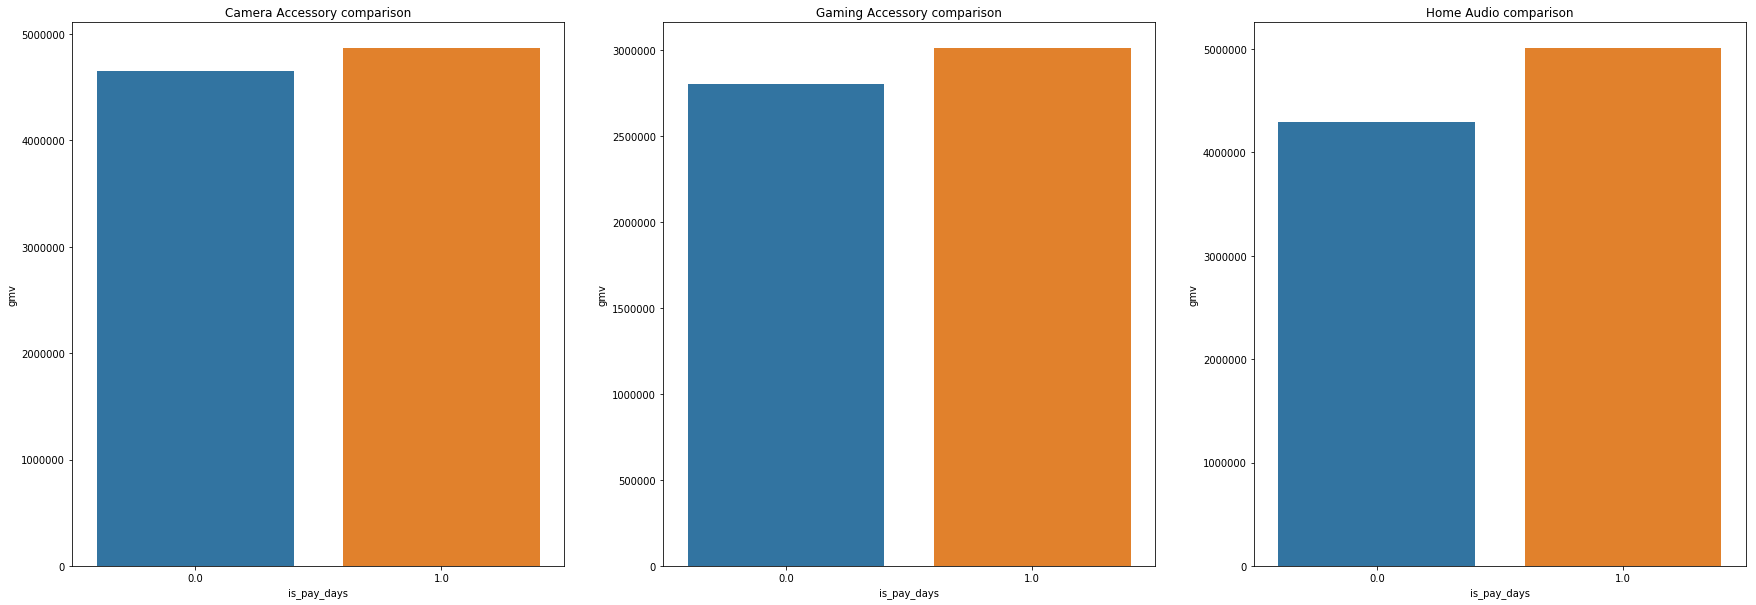

In [146]:
#plotting the comparison
plt.figure(figsize = (30,10))

plt.subplot(1,3,1)
sns.barplot(x='is_pay_days', y = 'gmv', data =payday_week_CameraAccessory_sale)
plt.title('Camera Accessory comparison')

plt.subplot(1,3,2)
sns.barplot(x='is_pay_days', y = 'gmv', data =payday_week_GamingAccessory_sale)
plt.title('Gaming Accessory comparison')

plt.subplot(1,3,3)
sns.barplot(x='is_pay_days', y = 'gmv', data =payday_week_HomeAudio_sale)
plt.title('Home Audio comparison')

We can see that when ever there is a payday in the week then the sales is going higher for each of the subcategory.

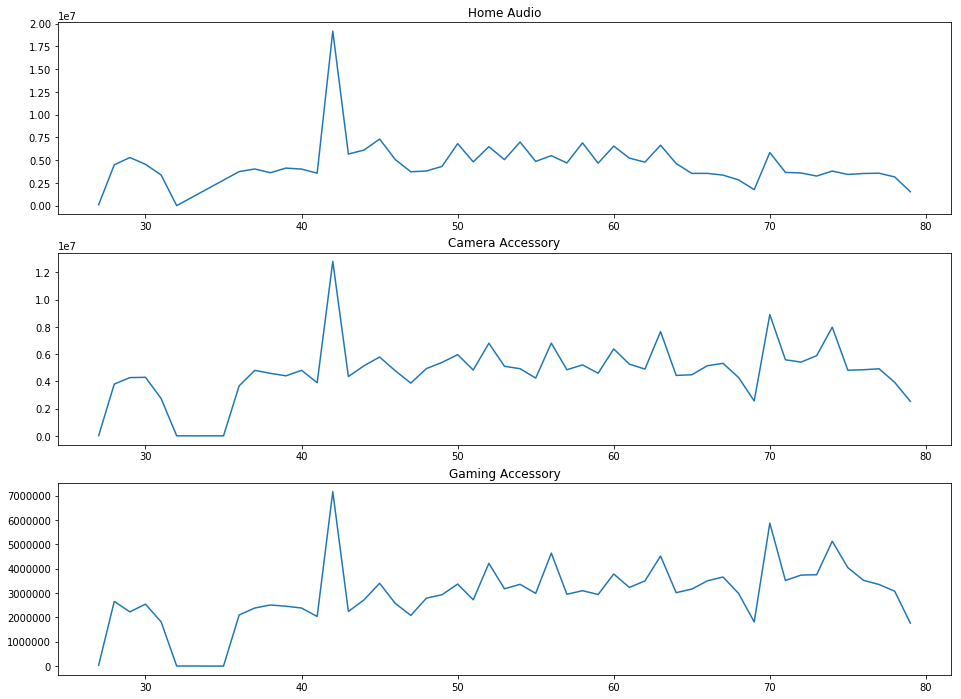

In [147]:
## Comparison for all three product subcategories -- week and total GMV
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
plt.subplot(3,1,1)
plt.title('Home Audio')
plt.plot(final_data_for_home_audio_including_adstock['week'],final_data_for_home_audio_including_adstock['gmv'])

# subplot 2
plt.subplot(3,1,2)
plt.title('Camera Accessory')
plt.plot(final_data_for_camera_including_adstock['week'],final_data_for_camera_including_adstock['gmv'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3 = plt.title('Gaming Accessory')
ax3 = plt.plot(final_data_for_gaming_including_adstock['week'],final_data_for_gaming_including_adstock['gmv'])

plt.show()


Highest GMV can be seen for home_audio

We can see that especially in the week 42 the sales has gpone very high. This could probably be due to some festival in that  particular week. The highest sale can be seen for the Home Audio sub-category.

In [148]:
#Special sale week v/s Average GMV

special_sale_week_CameraAccessory= final_data_for_camera_including_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
special_sale_week_GamingAccessory= final_data_for_gaming_including_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
special_sale_week_HomeAudio= final_data_for_home_audio_including_adstock.groupby('is_special_sale_day')[['gmv']].mean().reset_index()


Text(0.5,1,'Home Audio comparison')

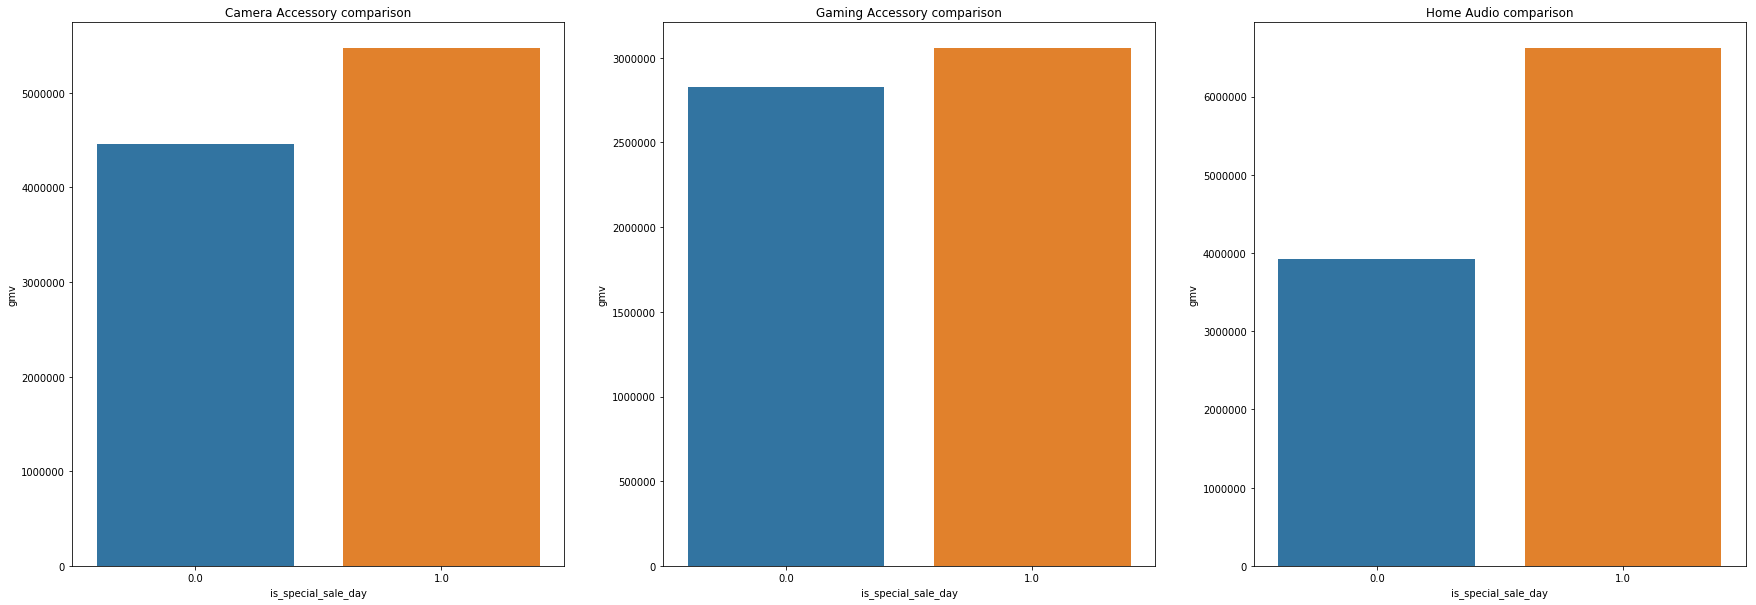

In [149]:
#plotting the comparison
plt.figure(figsize = (30,10))

plt.subplot(1,3,1)
sns.barplot(x='is_special_sale_day', y = 'gmv', data =special_sale_week_CameraAccessory)
plt.title('Camera Accessory comparison')

plt.subplot(1,3,2)
sns.barplot(x='is_special_sale_day', y = 'gmv', data =special_sale_week_GamingAccessory)
plt.title('Gaming Accessory comparison')

plt.subplot(1,3,3)
sns.barplot(x='is_special_sale_day', y = 'gmv', data =special_sale_week_HomeAudio)
plt.title('Home Audio comparison')

Whenever there is a special sale day in a particular week then we can see an increase in sales in comparison the average.

Text(0.5,1,'Gaming Acc: Total GMV vs Order Week')

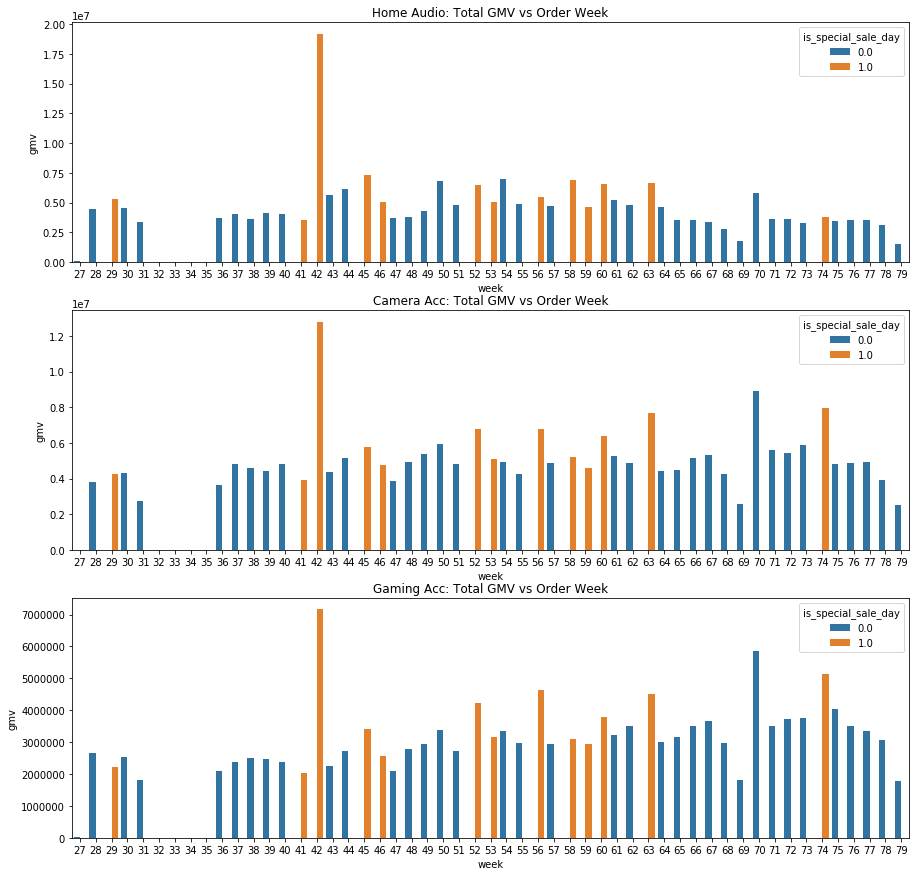

In [150]:
#Analyzing the total gmv over the weeks based upon whether the week contained a special sales day or not for all the three categories
plt.figure(figsize = (15,15))
plt.subplot(3, 1, 1)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_home_audio_including_adstock, hue = 'is_special_sale_day')
plt.title("Home Audio: Total GMV vs Order Week")

plt.subplot(3, 1, 2)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_camera_including_adstock, hue = 'is_special_sale_day')
plt.title("Camera Acc: Total GMV vs Order Week")

plt.subplot(3, 1, 3)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_gaming_including_adstock, hue = 'is_special_sale_day')
plt.title("Gaming Acc: Total GMV vs Order Week")


In all the categories we can see that when there is a special sale day in the week the sale goes up for all the three sub categories. Week 42 has surpassed in all the three categories

Text(0.5,1,'Gaming Acc: Total GMV vs Order Week')

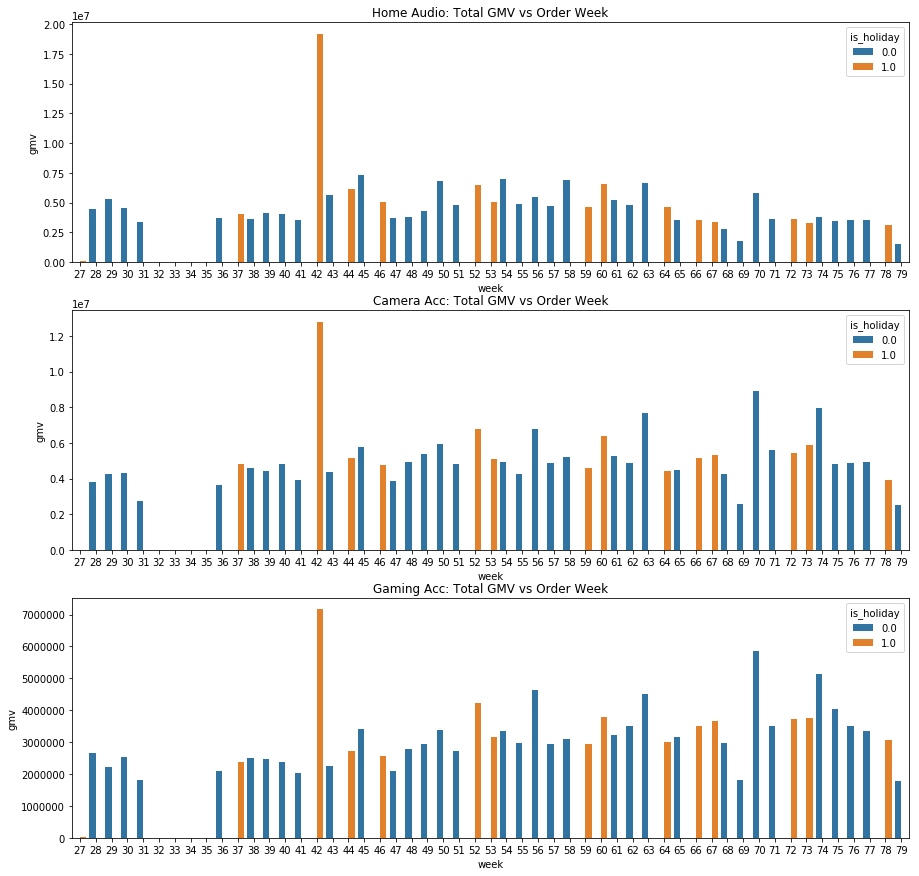

In [151]:
#Analyzing total gmv. We will see of sales increase if the week contains a holiday
plt.figure(figsize = (15,15))
plt.subplot(3, 1, 1)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_home_audio_including_adstock, hue = 'is_holiday')
plt.title("Home Audio: Total GMV vs Order Week")

plt.subplot(3, 1, 2)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_camera_including_adstock, hue = 'is_holiday')
plt.title("Camera Acc: Total GMV vs Order Week")

plt.subplot(3, 1, 3)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_gaming_including_adstock, hue = 'is_holiday')
plt.title("Gaming Acc: Total GMV vs Order Week")


Whenever there is a holiday, the sales has gone up for that week.

Text(0.5,1,'Gaming Acc: Total GMV vs Order Week')

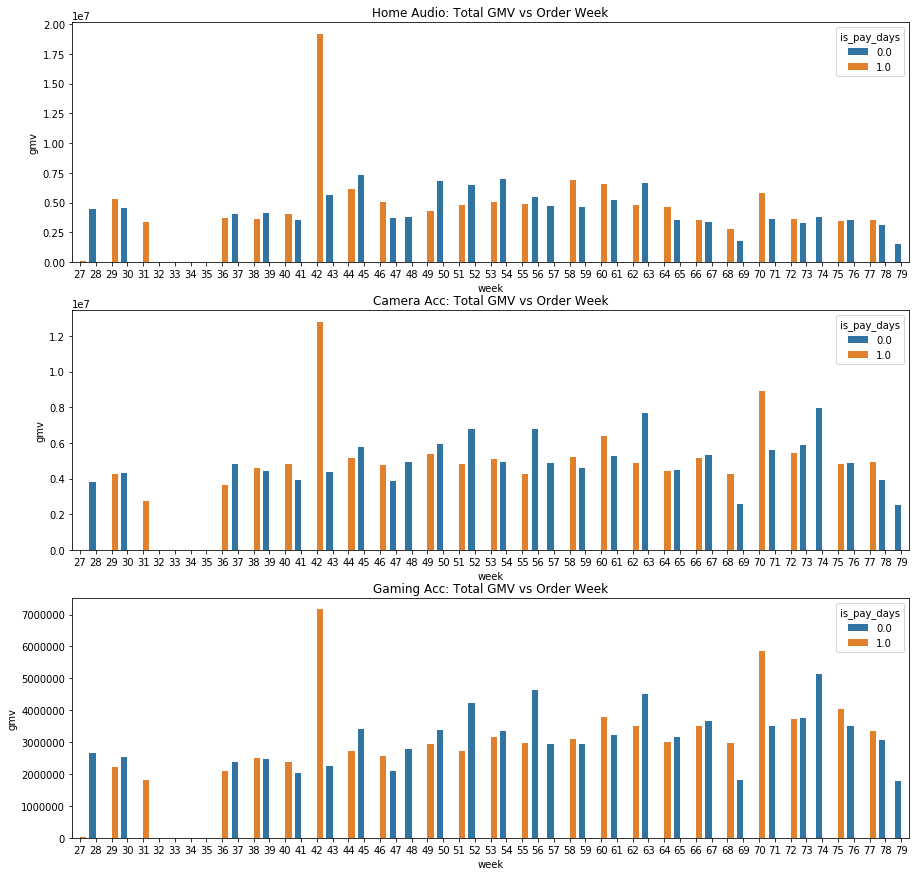

In [152]:
#Similar analysis for payday
#Analyzing total gmv. We will see of sales increase if the week contains a holiday
plt.figure(figsize = (15,15))
plt.subplot(3, 1, 1)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_home_audio_including_adstock, hue = 'is_pay_days')
plt.title("Home Audio: Total GMV vs Order Week")

plt.subplot(3, 1, 2)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_camera_including_adstock, hue = 'is_pay_days')
plt.title("Camera Acc: Total GMV vs Order Week")

plt.subplot(3, 1, 3)
sns.barplot(x = 'week', y = 'gmv', data = final_data_for_gaming_including_adstock, hue = 'is_pay_days')
plt.title("Gaming Acc: Total GMV vs Order Week")


Text(0.5,1,'Gaming Acc: Product procurement v/s GMV')

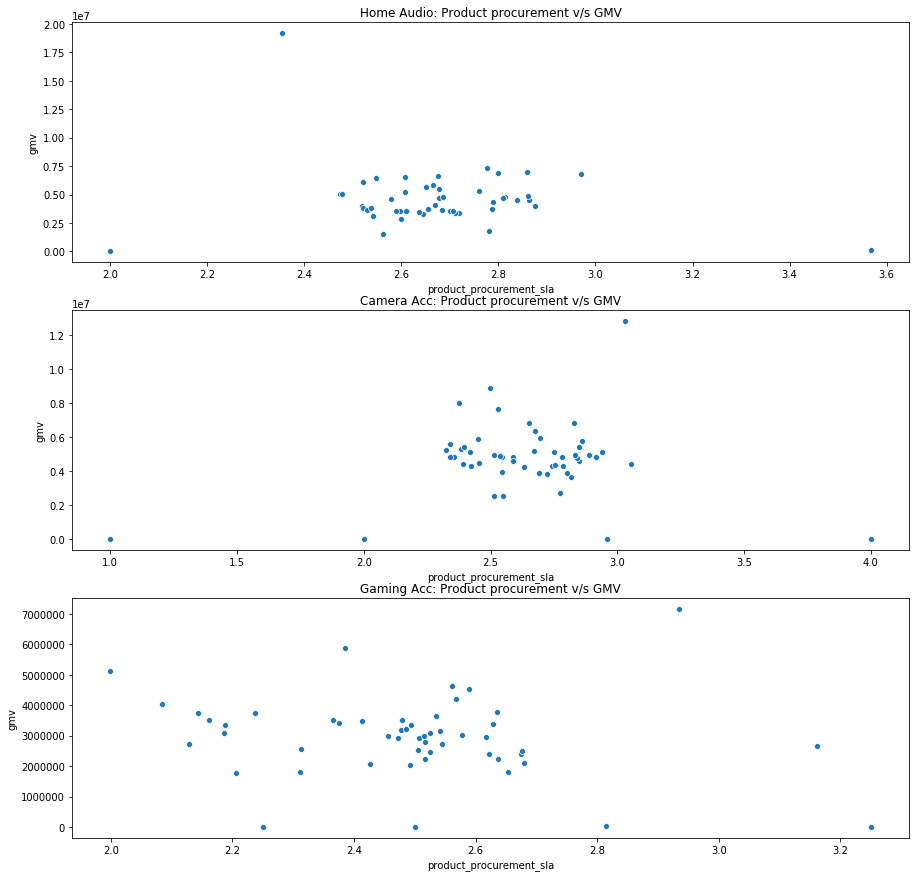

In [153]:
#Similar analysis for payday
#Analyzing total gmv. We will see of sales increase if the week contains a holiday
plt.figure(figsize = (15,15))
plt.subplot(3, 1, 1)
sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_data_for_home_audio_including_adstock)
plt.title("Home Audio: Product procurement v/s GMV")

plt.subplot(3, 1, 2)
sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_data_for_camera_including_adstock)
plt.title("Camera Acc: Product procurement v/s GMV")

plt.subplot(3, 1, 3)
sns.scatterplot(x = 'product_procurement_sla', y = 'gmv', data = final_data_for_gaming_including_adstock)
plt.title("Gaming Acc: Product procurement v/s GMV")


Text(0.5,1,'Gaming Acc: NPS v/s GMV')

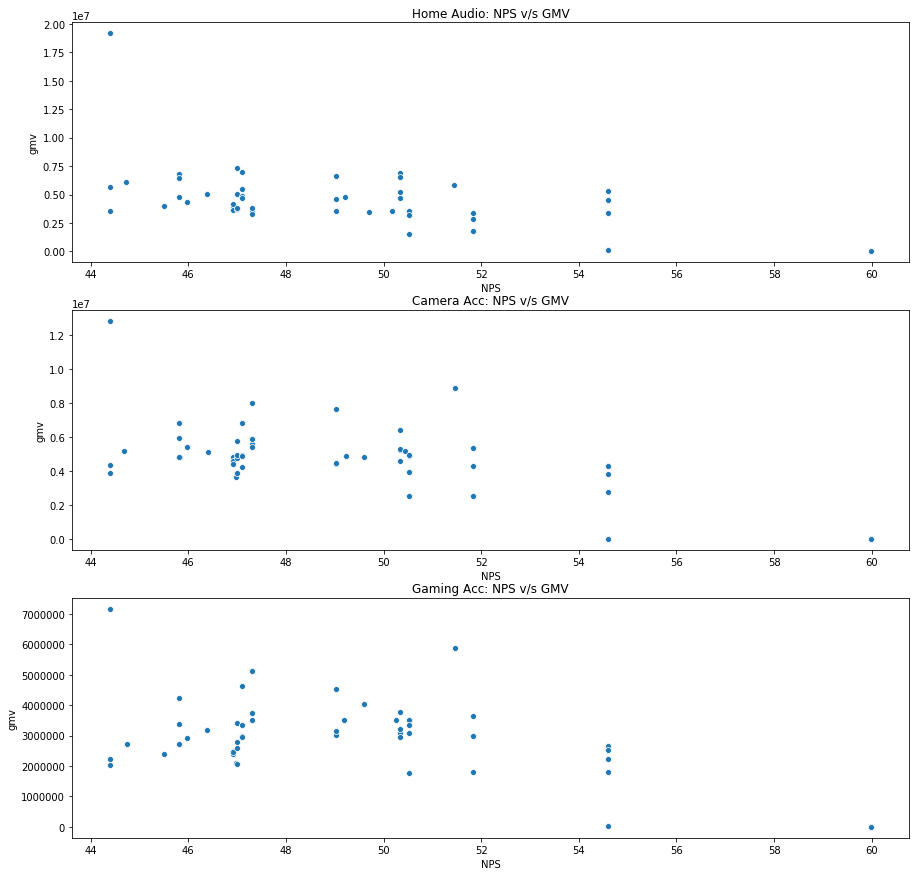

In [154]:
#Similar analysis for payday
#Analyzing total gmv. We will see of sales increase if the week contains a holiday
plt.figure(figsize = (15,15))
plt.subplot(3, 1, 1)
sns.scatterplot(x = 'NPS', y = 'gmv', data = final_data_for_home_audio_including_adstock)
plt.title("Home Audio: NPS v/s GMV")

plt.subplot(3, 1, 2)
sns.scatterplot(x = 'NPS', y = 'gmv', data = final_data_for_camera_including_adstock)
plt.title("Camera Acc: NPS v/s GMV")

plt.subplot(3, 1, 3)
sns.scatterplot(x = 'NPS', y = 'gmv', data = final_data_for_gaming_including_adstock)
plt.title("Gaming Acc: NPS v/s GMV")


Negative relation can be seen for all the three categories

In [155]:
climate_data_2015 = pd.read_csv('C:/Users/asahu1/Downloads/Ontario-2015.csv',skiprows = 24)

In [156]:
climate_data_2015

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2015-01-01  2015      1    1            †           0.00           NaN   
1    2015-01-02  2015      1    2            †           3.00           NaN   
2    2015-01-03  2015      1    3            †           2.50           NaN   
3    2015-01-04  2015      1    4            †           2.50           NaN   
4    2015-01-05  2015      1    5            †         -10.00           NaN   
5    2015-01-06  2015      1    6          NaN            nan           NaN   
6    2015-01-07  2015      1    7          NaN            nan           NaN   
7    2015-01-08  2015      1    8          NaN            nan           NaN   
8    2015-01-09  2015      1    9            †          -7.00           NaN   
9    2015-01-10  2015      1   10            †          -2.50           NaN   
10   2015-01-11  2015      1   11          NaN            nan           NaN   
11   2015-01-12  2015      1   12          NaN            nan           NaN   
12   2015-01-13  2015      1   13            †         -12.00           NaN   
13   2015-01-14  2015      1   14          NaN            nan           NaN   
14   2015-01-15  2015      1   15            †            nan             M   
15   2015-01-16  2015      1   16          NaN            nan           NaN   
16   2015-01-17  2015      1   17          NaN            nan           NaN   
17   2015-01-18  2015      1   18            †           5.00           NaN   
18   2015-01-19  2015      1   19            †           3.00           NaN   
19   2015-01-20  2015      1   20          NaN            nan           NaN   
20   2015-01-21  2015      1   21            †          -4.00           NaN   
21   2015-01-22  2015      1   22          NaN            nan           NaN   
22   2015-01-23  2015      1   23          NaN            nan           NaN   
23   2015-01-24  2015      1   24          NaN            nan           NaN   
24   2015-01-25  2015      1   25            †            nan             M   
25   2015-01-26  2015      1   26            †          -5.00           NaN   
26   2015-01-27  2015      1   27          NaN            nan           NaN   
27   2015-01-28  2015      1   28            †           2.00           NaN   
28   2015-01-29  2015      1   29          NaN            nan           NaN   
29   2015-01-30  2015      1   30          NaN            nan           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
335  2015-12-02  2015     12    2            †           7.50           NaN   
336  2015-12-03  2015     12    3          NaN            nan           NaN   
337  2015-12-04  2015     12    4            †           6.50           NaN   
338  2015-12-05  2015     12    5          NaN            nan           NaN   
339  2015-12-06  2015     12    6          NaN            nan           NaN   
340  2015-12-07  2015     12    7            †           3.00           NaN   
341  2015-12-08  2015     12    8          NaN            nan           NaN   
342  2015-12-09  2015     12    9          NaN            nan           NaN   
343  2015-12-10  2015     12   10          NaN            nan           NaN   
344  2015-12-11  2015     12   11            †          13.00           NaN   
345  2015-12-12  2015     12   12            †          16.00           NaN   
346  2015-12-13  2015     12   13            †          15.00           NaN   
347  2015-12-14  2015     12   14          NaN            nan           NaN   
348  2015-12-15  2015     12   15          NaN            nan           NaN   
349  2015-12-16  2015     12   16          NaN            nan           NaN   
350  2015-12-17  2015     12   17            †          10.50           NaN   
351  2015-12-18  2015     12   18          NaN            nan           NaN   
352  2015-12-19  2015     12   19            †           3.00           NaN   
353  2015-12-20  2015     12   20            †          

In [157]:
climate_data_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [158]:
#Dropping columns where everything is null


climate_data_2015.dropna(axis=1, thresh=1, inplace=True)

climate_data_2015.reset_index(drop=True, inplace=True)

climate_data_2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2015-01-01  2015      1    1            †           0.00           NaN   
1  2015-01-02  2015      1    2            †           3.00           NaN   
2  2015-01-03  2015      1    3            †           2.50           NaN   
3  2015-01-04  2015      1    4            †           2.50           NaN   
4  2015-01-05  2015      1    5            †         -10.00           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0          -8.50           NaN           -4.30            NaN   
1          -3.00           NaN            0.00            NaN   
2          -4.00           NaN           -0.80            NaN   
3           0.00           NaN            1.30            NaN   
4         -13.50           NaN          -11.80            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0               22.30                NaN                0.00   
1               18.00                NaN                0.00   
2               18.80                NaN                0.00   
3               16.70                NaN                0.00   
4               29.80                NaN                0.00   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN             0.00             NaN             0.00   
1                NaN             0.00             NaN             0.00   
2                NaN            24.00             NaN             0.00   
3                NaN             0.00             NaN             1.00   
4                NaN             0.00             NaN             3.00   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN               0.00               NaN               0.00   
1             NaN               0.00               NaN               0.00   
2             NaN              24.00               NaN               0.00   
3             NaN               1.00               NaN               0.00   
4             NaN               3.00               NaN               1.00   

  Snow on Grnd Flag  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [159]:
#Dropping columns with only one distinctive value


cols_for_drop = []

for col in climate_data_2015.columns:
    if 'Flag' in col:
        print(climate_data_2015[col].value_counts())
        print()
        cols_for_drop.append(col)

cols_for_drop.append('Data Quality')

climate_data_2015.drop(cols_for_drop, axis=1, inplace=True)

print(climate_data_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [160]:
#Formattingg the name of the columns

climate_data_2015.columns = [col.replace(' (°C)','').strip() for col in climate_data_2015.columns]
climate_data_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [161]:
climate_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
Date/Time            365 non-null object
Year                 365 non-null int64
Month                365 non-null int64
Day                  365 non-null int64
Max Temp             216 non-null float64
Min Temp             190 non-null float64
Mean Temp            190 non-null float64
Heat Deg Days        190 non-null float64
Cool Deg Days        190 non-null float64
Total Rain (mm)      229 non-null float64
Total Snow (cm)      229 non-null float64
Total Precip (mm)    229 non-null float64
Snow on Grnd (cm)    229 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.1+ KB


In [162]:
# Week # from date and formatting it

import datetime

climate_data_2015['week'] = climate_data_2015['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_data_2015['week'] = climate_data_2015['week'].apply(lambda x: str(x).lstrip('0'))

climate_data_2015.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2015-01-01  2015      1    1      0.00     -8.50      -4.30          22.30   
1  2015-01-02  2015      1    2      3.00     -3.00       0.00          18.00   
2  2015-01-03  2015      1    3      2.50     -4.00      -0.80          18.80   
3  2015-01-04  2015      1    4      2.50      0.00       1.30          16.70   
4  2015-01-05  2015      1    5    -10.00    -13.50     -11.80          29.80   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0           0.00             0.00             0.00               0.00   
1           0.00             0.00             0.00               0.00   
2           0.00            24.00             0.00              24.00   
3           0.00             0.00             1.00               1.00   
4           0.00             0.00             3.00               3.00   

   Snow on Grnd (cm) week  
0               0.00    1  
1               0.00    1  
2               0.00    1  
3               0.00    1  
4               1.00    2

In [163]:
#July to Dec data for 2015

climate_data_2015 = climate_data_2015[climate_data_2015['Month']>=7]
climate_data_2015.reset_index(drop = True, inplace = True)

climate_data_2015


Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  \
0    2015-07-01  2015      7    1     24.50     17.00      20.80   
1    2015-07-02  2015      7    2     24.00     14.00      19.00   
2    2015-07-03  2015      7    3     25.00     10.00      17.50   
3    2015-07-04  2015      7    4     26.00     11.00      18.50   
4    2015-07-05  2015      7    5     28.00     14.00      21.00   
5    2015-07-06  2015      7    6       nan       nan        nan   
6    2015-07-07  2015      7    7     26.00     18.00      22.00   
7    2015-07-08  2015      7    8     20.00     12.50      16.30   
8    2015-07-09  2015      7    9     24.00     17.00      20.50   
9    2015-07-10  2015      7   10     26.00     13.00      19.50   
10   2015-07-11  2015      7   11     28.00     13.50      20.80   
11   2015-07-12  2015      7   12     25.00     18.00      21.50   
12   2015-07-13  2015      7   13       nan       nan        nan   
13   2015-07-14  2015      7   14     29.00     19.50      24.30   
14   2015-07-15  2015      7   15     23.50     14.50      19.00   
15   2015-07-16  2015      7   16     25.00     11.00      18.00   
16   2015-07-17  2015      7   17     30.00     18.00      24.00   
17   2015-07-18  2015      7   18     32.00     21.00      26.50   
18   2015-07-19  2015      7   19     33.00     21.50      27.30   
19   2015-07-20  2015      7   20     30.00     15.00      22.50   
20   2015-07-21  2015      7   21       nan       nan        nan   
21   2015-07-22  2015      7   22     27.00     14.50      20.80   
22   2015-07-23  2015      7   23     29.00     15.00      22.00   
23   2015-07-24  2015      7   24     31.00       nan        nan   
24   2015-07-25  2015      7   25     31.50     18.50      25.00   
25   2015-07-26  2015      7   26     30.00     20.00      25.00   
26   2015-07-27  2015      7   27     32.00     16.00      24.00   
27   2015-07-28  2015      7   28     33.50     17.50      25.50   
28   2015-07-29  2015      7   29       nan       nan        nan   
29   2015-07-30  2015      7   30     30.50     19.00      24.80   
..          ...   ...    ...  ...       ...       ...        ...   
154  2015-12-02  2015     12    2      7.50     -4.00       1.80   
155  2015-12-03  2015     12    3       nan       nan        nan   
156  2015-12-04  2015     12    4      6.50       nan        nan   
157  2015-12-05  2015     12    5       nan       nan        nan   
158  2015-12-06  2015     12    6       nan       nan        nan   
159  2015-12-07  2015     12    7      3.00     -2.50       0.30   
160  2015-12-08  2015     12    8       nan       nan        nan   
161  2015-12-09  2015     12    9       nan       nan        nan   
162  2015-12-10  2015     12   10       nan       nan        nan   
163  2015-12-11  2015     12   11     13.00      5.50       9.30   
164  2015-12-12  2015     12   12     16.00      7.00      11.50   
165  2015-12-13  2015     12   13     15.00     11.00      13.00   
166  2015-12-14  2015     12   14       nan       nan        nan   
167  2015-12-15  2015     12   15       nan       nan        nan   
168  2015-12-16  2015     12   16       nan       nan        nan   
169  2015-12-17  2015     12   17     10.50       nan        nan   
170  2015-12-18  2015     12   18       nan       nan        nan   
171  2015-12-19  2015     12   19      3.00     -4.00      -0.50   
172  2015-12-20  2015     12   20      5.50     -5.00       0.30   
173  2015-12-21  2015     12   21       nan       nan        nan   
174  2015-12-22  2015     12   22     11.50      4.00       7.80   
175  2015-12-23  2015     12   23     15.50      1.00       8.30   
176  2015-12-24  2015     12   24       nan       nan        nan   
177  2015-12-25  2015     12   25       nan       nan        nan   
178  2015-12-26  2015     12   26      9.50       nan        nan   
179  2015-12-27  2015     12   27       nan       nan        nan   
180  2015-12-28  2015     12   28       nan       nan        n

In [164]:
climate_data_2015 = climate_data_2015.groupby(['week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)
climate_data_2015.head()

week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
0   27     28.00     10.00      19.36           0.10           1.46   
1   28     28.00     12.50      20.10           0.28           2.38   
2   29     33.00     11.00      23.18           0.00           5.18   
3   30     31.50     14.50      23.06           0.00           5.06   
4   31     33.50     16.00      24.57           0.00           6.57   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
0             0.00             0.00               0.00               0.00  
1             4.42             0.00               4.42               0.00  
2             1.40             0.00               1.40               0.00  
3             0.90             0.00               0.90               0.00  
4             4.63             0.00               4.63               0.00

In [165]:
#Dropping 27th week data as it doesn't belong to the required time period

climate_data_2015.drop(climate_data_2015[climate_data_2015['week']=='27'].index, inplace = True)
climate_data_2015

week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1    28     28.00     12.50      20.10           0.28           2.38   
2    29     33.00     11.00      23.18           0.00           5.18   
3    30     31.50     14.50      23.06           0.00           5.06   
4    31     33.50     16.00      24.57           0.00           6.57   
5    32     28.50     15.00      21.65           0.00           3.65   
6    33     31.00     14.50      23.95           0.00           5.95   
7    34     31.50     15.00      23.45           0.00           5.45   
8    35     29.00     14.00      20.25           0.75           3.00   
9    36     32.00     17.50      24.46           0.00           6.46   
10   37     32.50      9.00      19.24           1.28           2.52   
11   38     27.50     13.00      20.55           0.00           2.55   
12   39     26.50     14.50      20.00           0.00           2.00   
13   40     26.50      8.00      17.73           1.93           1.65   
14   41     23.00     10.00      16.62           1.38           0.00   
15   42     24.50      4.50      14.30           4.10           0.40   
16   43     22.00      9.00      15.68           2.32           0.00   
17   44     16.00      2.00      10.90           7.10           0.00   
18   45     23.00      5.00      13.92           4.08           0.00   
19   46     17.00     -1.50       8.83           9.17           0.00   
20   47     16.00     -4.00       6.08          11.93           0.00   
21   48     12.00      3.50       7.80          10.20           0.00   
22   49      7.50     -4.00       1.80          16.20           0.00   
23   50     16.00     -2.50       8.53           9.47           0.00   
24   51     10.50     -5.00      -0.10          18.10           0.00   
25   52     15.50      1.00       8.05           9.95           0.00   
26   53      6.50     -2.00       2.30          15.70           0.00   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1              4.42             0.00               4.42               0.00  
2              1.40             0.00               1.40               0.00  
3              0.90             0.00               0.90               0.00  
4              4.63             0.00               4.63               0.00  
5              0.28             0.00               0.28               0.00  
6              2.90             0.00               2.90               0.00  
7              5.13             0.00               5.13               0.00  
8              0.00             0.00               0.00               0.00  
9             10.10             0.00              10.10               0.00  
10             0.96             0.00               0.96               0.00  
11             0.55             0.00               0.55               0.00  
12             0.00             0.00               0.00               0.00  
13             3.72             0.00               3.72               0.00  
14             0.00             0.00               0.00               0.00  
15             0.30             0.00               0.30               0.00  
16             0.84             0.00               0.84               0.00  
17             0.90             0.00               0.90               0.00  
18             1.72             0.00               1.72               0.00  
19             5.13             0.00               5.13               0.00  
20             3.30             2.50               5.80               1.75  
21             5.80             0.00               5.80               0.00  
22             2.00             0.00               2.00               0.00  
23             0.15             0.00               0.15               0.00  
24             2.33             0.00               2.33               0.00  
25             7.20             0.00               7.20               0.00  
26             0.00             0.00               0.00 

In [166]:
climate_data_2015.duplicated().any()

False

In [167]:
climate_data_2015.isnull().any()

week                 False
Max Temp             False
Min Temp             False
Mean Temp            False
Heat Deg Days        False
Cool Deg Days        False
Total Rain (mm)      False
Total Snow (cm)      False
Total Precip (mm)    False
Snow on Grnd (cm)    False
dtype: bool

In [168]:
#Importing the 2016 data and performing the same things as in 2015.

climate_data_2016 = pd.read_csv('C:/Users/asahu1/Downloads/Ontario-2016.csv',skiprows = 24)
climate_data_2016

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0    2016-01-01  2016      1    1          NaN            nan           NaN   
1    2016-01-02  2016      1    2          NaN            nan           NaN   
2    2016-01-03  2016      1    3          NaN            nan           NaN   
3    2016-01-04  2016      1    4          NaN            nan           NaN   
4    2016-01-05  2016      1    5          NaN            nan           NaN   
5    2016-01-06  2016      1    6          NaN            nan           NaN   
6    2016-01-07  2016      1    7          NaN            nan           NaN   
7    2016-01-08  2016      1    8            †           7.00           NaN   
8    2016-01-09  2016      1    9            †          11.00           NaN   
9    2016-01-10  2016      1   10            †          -1.50           NaN   
10   2016-01-11  2016      1   11          NaN            nan           NaN   
11   2016-01-12  2016      1   12            †          -5.00           NaN   
12   2016-01-13  2016      1   13          NaN            nan           NaN   
13   2016-01-14  2016      1   14            †           2.50           NaN   
14   2016-01-15  2016      1   15            †           4.50           NaN   
15   2016-01-16  2016      1   16          NaN            nan           NaN   
16   2016-01-17  2016      1   17          NaN            nan           NaN   
17   2016-01-18  2016      1   18          NaN            nan           NaN   
18   2016-01-19  2016      1   19          NaN            nan           NaN   
19   2016-01-20  2016      1   20          NaN            nan           NaN   
20   2016-01-21  2016      1   21            †          -3.00           NaN   
21   2016-01-22  2016      1   22          NaN            nan           NaN   
22   2016-01-23  2016      1   23          NaN            nan           NaN   
23   2016-01-24  2016      1   24            †           3.00           NaN   
24   2016-01-25  2016      1   25            †           5.50           NaN   
25   2016-01-26  2016      1   26            †           6.00           NaN   
26   2016-01-27  2016      1   27          NaN            nan           NaN   
27   2016-01-28  2016      1   28          NaN            nan           NaN   
28   2016-01-29  2016      1   29          NaN            nan           NaN   
29   2016-01-30  2016      1   30          NaN            nan           NaN   
..          ...   ...    ...  ...          ...            ...           ...   
336  2016-12-02  2016     12    2          NaN            nan           NaN   
337  2016-12-03  2016     12    3            †           4.00           NaN   
338  2016-12-04  2016     12    4          NaN            nan           NaN   
339  2016-12-05  2016     12    5          NaN            nan           NaN   
340  2016-12-06  2016     12    6            †           5.00           NaN   
341  2016-12-07  2016     12    7          NaN            nan           NaN   
342  2016-12-08  2016     12    8            †          -2.00           NaN   
343  2016-12-09  2016     12    9          NaN            nan           NaN   
344  2016-12-10  2016     12   10            †           0.00           NaN   
345  2016-12-11  2016     12   11            †           1.00           NaN   
346  2016-12-12  2016     12   12            †           2.00           NaN   
347  2016-12-13  2016     12   13            †          -2.00           NaN   
348  2016-12-14  2016     12   14          NaN            nan           NaN   
349  2016-12-15  2016     12   15          NaN            nan           NaN   
350  2016-12-16  2016     12   16            †          -3.50           NaN   
351  2016-12-17  2016     12   17            †          -1.00           NaN   
352  2016-12-18  2016     12   18          NaN            nan           NaN   
353  2016-12-19  2016     12   19          NaN            nan           NaN   
354  2016-12-20  2016     12   20            †          

In [169]:
climate_data_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [170]:
climate_data_2016.dropna(axis=1, thresh=1, inplace=True)

climate_data_2016.reset_index(drop=True, inplace=True)

climate_data_2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2016-01-01  2016      1    1          NaN            nan           NaN   
1  2016-01-02  2016      1    2          NaN            nan           NaN   
2  2016-01-03  2016      1    3          NaN            nan           NaN   
3  2016-01-04  2016      1    4          NaN            nan           NaN   
4  2016-01-05  2016      1    5          NaN            nan           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C) Mean Temp Flag  \
0            nan           NaN             nan            NaN   
1            nan           NaN             nan            NaN   
2            nan           NaN             nan            NaN   
3            nan           NaN             nan            NaN   
4            nan           NaN             nan            NaN   

   Heat Deg Days (°C) Heat Deg Days Flag  Cool Deg Days (°C)  \
0                 nan                NaN                 nan   
1                 nan                NaN                 nan   
2                 nan                NaN                 nan   
3                 nan                NaN                 nan   
4                 nan                NaN                 nan   

  Cool Deg Days Flag  Total Rain (mm) Total Rain Flag  Total Snow (cm)  \
0                NaN              nan             NaN              nan   
1                NaN              nan             NaN              nan   
2                NaN              nan             NaN              nan   
3                NaN              nan             NaN              nan   
4                NaN              nan             NaN              nan   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
0             NaN                nan               NaN                nan   
1             NaN                nan               NaN                nan   
2             NaN                nan               NaN                nan   
3             NaN                nan               NaN                nan   
4             NaN                nan               NaN                nan   

  Snow on Grnd Flag  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [171]:
#will drop the columns with one distinctive value as it will not be helpful in analysis


cols_for_drop = []

for col in climate_data_2016.columns:
    if 'Flag' in col:
        print(climate_data_2016[col].value_counts())
        print()
        cols_for_drop.append(col)

cols_for_drop.append('Data Quality')

climate_data_2016.drop(cols_for_drop, axis=1, inplace=True)

print(climate_data_2016.columns)


M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [172]:
#Formattingg the name of the columns

climate_data_2016.columns = [col.replace(' (°C)','').strip() for col in climate_data_2016.columns]
climate_data_2016.columns


Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [173]:
climate_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
Date/Time            366 non-null object
Year                 366 non-null int64
Month                366 non-null int64
Day                  366 non-null int64
Max Temp             226 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      227 non-null float64
Total Snow (cm)      227 non-null float64
Total Precip (mm)    227 non-null float64
Snow on Grnd (cm)    227 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 37.2+ KB


In [174]:
columns_names = ['Max Temp',
 'Min Temp',
 'Mean Temp',
 'Heat Deg Days',
 'Cool Deg Days',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)']

climate_data_2016.dropna(subset=columns_names, inplace=True)

climate_data_2016.reset_index(drop=True, inplace=True)

climate_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
Date/Time            219 non-null object
Year                 219 non-null int64
Month                219 non-null int64
Day                  219 non-null int64
Max Temp             219 non-null float64
Min Temp             219 non-null float64
Mean Temp            219 non-null float64
Heat Deg Days        219 non-null float64
Cool Deg Days        219 non-null float64
Total Rain (mm)      219 non-null float64
Total Snow (cm)      219 non-null float64
Total Precip (mm)    219 non-null float64
Snow on Grnd (cm)    219 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 22.3+ KB


In [175]:
# Week # from date and formatting it

import datetime

climate_data_2016['week'] = climate_data_2016['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%V"))

climate_data_2016['week'] = climate_data_2016['week'].apply(lambda x: str(x).lstrip('0'))

climate_data_2016.head()

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  Heat Deg Days  \
0  2016-01-08  2016      1    8      7.00    -14.00      -3.50          21.50   
1  2016-01-09  2016      1    9     11.00      3.00       7.00          11.00   
2  2016-01-10  2016      1   10     -1.50     -5.00      -3.30          21.30   
3  2016-01-12  2016      1   12     -5.00    -12.00      -8.50          26.50   
4  2016-01-14  2016      1   14      2.50    -10.50      -4.00          22.00   

   Cool Deg Days  Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  \
0           0.00             9.00             0.00               9.00   
1           0.00            14.60             0.00              14.60   
2           0.00             0.00             7.00               7.00   
3           0.00             0.00             0.00               0.00   
4           0.00             0.00             0.00               0.00   

   Snow on Grnd (cm) week  
0               0.00    1  
1               0.00    1  
2               0.00    1  
3              12.00    2  
4              11.00    2

In [176]:
#Jan to June data

climate_data_2016 = climate_data_2016[climate_data_2016['Month']<=6]
climate_data_2016.reset_index(drop = True, inplace=True)
climate_data_2016

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  \
0   2016-01-08  2016      1    8      7.00    -14.00      -3.50   
1   2016-01-09  2016      1    9     11.00      3.00       7.00   
2   2016-01-10  2016      1   10     -1.50     -5.00      -3.30   
3   2016-01-12  2016      1   12     -5.00    -12.00      -8.50   
4   2016-01-14  2016      1   14      2.50    -10.50      -4.00   
5   2016-01-15  2016      1   15      4.50     -2.00       1.30   
6   2016-01-25  2016      1   25      5.50     -9.00      -1.80   
7   2016-02-02  2016      2    2      9.50     -5.50       2.00   
8   2016-02-03  2016      2    3     13.00      1.50       7.30   
9   2016-02-04  2016      2    4      1.50     -1.00       0.30   
10  2016-02-08  2016      2    8      5.00     -1.00       2.00   
11  2016-02-13  2016      2   13     -8.50    -16.00     -12.30   
12  2016-02-14  2016      2   14     -5.00    -18.00     -11.50   
13  2016-02-18  2016      2   18      6.50    -12.00      -2.80   
14  2016-02-19  2016      2   19     17.50     -3.50       7.00   
15  2016-02-20  2016      2   20     17.50      5.00      11.30   
16  2016-02-24  2016      2   24      1.00     -1.00       0.00   
17  2016-02-25  2016      2   25      1.00     -3.50      -1.30   
18  2016-02-29  2016      2   29     10.50     -1.00       4.80   
19  2016-03-01  2016      3    1     10.50     -5.00       2.80   
20  2016-03-04  2016      3    4      2.00     -4.00      -1.00   
21  2016-03-07  2016      3    7     18.00     -2.00       8.00   
22  2016-03-09  2016      3    9     20.00      9.00      14.50   
23  2016-03-13  2016      3   13     11.00      5.00       8.00   
24  2016-03-15  2016      3   15     15.00      7.00      11.00   
25  2016-03-16  2016      3   16     16.00      5.50      10.80   
26  2016-03-17  2016      3   17     13.50      5.50       9.50   
27  2016-03-18  2016      3   18     11.00     -2.50       4.30   
28  2016-03-21  2016      3   21      8.50     -3.00       2.80   
29  2016-03-23  2016      3   23     13.00      0.00       6.50   
..         ...   ...    ...  ...       ...       ...        ...   
63  2016-05-14  2016      5   14     11.50      8.00       9.80   
64  2016-05-15  2016      5   15     11.00      2.50       6.80   
65  2016-05-16  2016      5   16     21.00      4.00      12.50   
66  2016-05-18  2016      5   18     18.50      6.00      12.30   
67  2016-05-24  2016      5   24     29.00      9.50      19.30   
68  2016-05-25  2016      5   25     30.00     14.50      22.30   
69  2016-05-26  2016      5   26     30.00     18.00      24.00   
70  2016-05-27  2016      5   27     30.00     18.00      24.00   
71  2016-05-28  2016      5   28     31.00     17.50      24.30   
72  2016-05-29  2016      5   29     31.00     19.00      25.00   
73  2016-06-02  2016      6    2     30.00     16.00      23.00   
74  2016-06-04  2016      6    4     26.50     14.00      20.30   
75  2016-06-05  2016      6    5     25.00     17.00      21.00   
76  2016-06-06  2016      6    6     29.00     15.00      22.00   
77  2016-06-08  2016      6    8     21.50      9.00      15.30   
78  2016-06-09  2016      6    9     25.00      9.50      17.30   
79  2016-06-10  2016      6   10     29.00     13.50      21.30   
80  2016-06-11  2016      6   11     35.00     19.00      27.00   
81  2016-06-12  2016      6   12     26.50     16.00      21.30   
82  2016-06-13  2016      6   13     24.00      8.50      16.30   
83  2016-06-16  2016      6   16     27.50     17.00      22.30   
84  2016-06-18  2016      6   18     30.50     13.00      21.80   
85  2016-06-19  2016      6   19     33.00     16.50      24.80   
86  2016-06-20  2016      6   20     34.50     20.50      27.50   
87  2016-06-22  2016      6   22     30.50     17.00      23.80   
88  2016-06-24  2016      6   24     29.00     13.00      21.00   
89  2016-06-25  2016      6   25     30.50     13.00      21.80   
90  2016-06-26  2016      6   26     34.00     18.50

In [177]:
climate_data_2016

Date/Time  Year  Month  Day  Max Temp  Min Temp  Mean Temp  \
0   2016-01-08  2016      1    8      7.00    -14.00      -3.50   
1   2016-01-09  2016      1    9     11.00      3.00       7.00   
2   2016-01-10  2016      1   10     -1.50     -5.00      -3.30   
3   2016-01-12  2016      1   12     -5.00    -12.00      -8.50   
4   2016-01-14  2016      1   14      2.50    -10.50      -4.00   
5   2016-01-15  2016      1   15      4.50     -2.00       1.30   
6   2016-01-25  2016      1   25      5.50     -9.00      -1.80   
7   2016-02-02  2016      2    2      9.50     -5.50       2.00   
8   2016-02-03  2016      2    3     13.00      1.50       7.30   
9   2016-02-04  2016      2    4      1.50     -1.00       0.30   
10  2016-02-08  2016      2    8      5.00     -1.00       2.00   
11  2016-02-13  2016      2   13     -8.50    -16.00     -12.30   
12  2016-02-14  2016      2   14     -5.00    -18.00     -11.50   
13  2016-02-18  2016      2   18      6.50    -12.00      -2.80   
14  2016-02-19  2016      2   19     17.50     -3.50       7.00   
15  2016-02-20  2016      2   20     17.50      5.00      11.30   
16  2016-02-24  2016      2   24      1.00     -1.00       0.00   
17  2016-02-25  2016      2   25      1.00     -3.50      -1.30   
18  2016-02-29  2016      2   29     10.50     -1.00       4.80   
19  2016-03-01  2016      3    1     10.50     -5.00       2.80   
20  2016-03-04  2016      3    4      2.00     -4.00      -1.00   
21  2016-03-07  2016      3    7     18.00     -2.00       8.00   
22  2016-03-09  2016      3    9     20.00      9.00      14.50   
23  2016-03-13  2016      3   13     11.00      5.00       8.00   
24  2016-03-15  2016      3   15     15.00      7.00      11.00   
25  2016-03-16  2016      3   16     16.00      5.50      10.80   
26  2016-03-17  2016      3   17     13.50      5.50       9.50   
27  2016-03-18  2016      3   18     11.00     -2.50       4.30   
28  2016-03-21  2016      3   21      8.50     -3.00       2.80   
29  2016-03-23  2016      3   23     13.00      0.00       6.50   
..         ...   ...    ...  ...       ...       ...        ...   
63  2016-05-14  2016      5   14     11.50      8.00       9.80   
64  2016-05-15  2016      5   15     11.00      2.50       6.80   
65  2016-05-16  2016      5   16     21.00      4.00      12.50   
66  2016-05-18  2016      5   18     18.50      6.00      12.30   
67  2016-05-24  2016      5   24     29.00      9.50      19.30   
68  2016-05-25  2016      5   25     30.00     14.50      22.30   
69  2016-05-26  2016      5   26     30.00     18.00      24.00   
70  2016-05-27  2016      5   27     30.00     18.00      24.00   
71  2016-05-28  2016      5   28     31.00     17.50      24.30   
72  2016-05-29  2016      5   29     31.00     19.00      25.00   
73  2016-06-02  2016      6    2     30.00     16.00      23.00   
74  2016-06-04  2016      6    4     26.50     14.00      20.30   
75  2016-06-05  2016      6    5     25.00     17.00      21.00   
76  2016-06-06  2016      6    6     29.00     15.00      22.00   
77  2016-06-08  2016      6    8     21.50      9.00      15.30   
78  2016-06-09  2016      6    9     25.00      9.50      17.30   
79  2016-06-10  2016      6   10     29.00     13.50      21.30   
80  2016-06-11  2016      6   11     35.00     19.00      27.00   
81  2016-06-12  2016      6   12     26.50     16.00      21.30   
82  2016-06-13  2016      6   13     24.00      8.50      16.30   
83  2016-06-16  2016      6   16     27.50     17.00      22.30   
84  2016-06-18  2016      6   18     30.50     13.00      21.80   
85  2016-06-19  2016      6   19     33.00     16.50      24.80   
86  2016-06-20  2016      6   20     34.50     20.50      27.50   
87  2016-06-22  2016      6   22     30.50     17.00      23.80   
88  2016-06-24  2016      6   24     29.00     13.00      21.00   
89  2016-06-25  2016      6   25     30.50     13.00      21.80   
90  2016-06-26  2016      6   26     34.00     18.50

In [178]:
climate_data_2016 = climate_data_2016.groupby(['week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

In [179]:
climate_data_2016.duplicated().any()

False

In [180]:
climate_data_2016.isnull().values.any()

False

In [181]:
#Taking the difference of the two datasets. 

def difference_of_lists(list1, list2):
    return (list(set(list1)-set(list2)))

In [182]:
print(difference_of_lists(climate_data_2015.columns,climate_data_2016.columns))

[]


In [183]:
#Concatinating the two datasets

final_climate_data_combined = pd.concat([climate_data_2015, climate_data_2016],axis=0)
final_climate_data_combined.shape

(51, 10)

In [184]:
final_climate_data_combined

week  Max Temp  Min Temp  Mean Temp  Heat Deg Days  Cool Deg Days  \
1    28     28.00     12.50      20.10           0.28           2.38   
2    29     33.00     11.00      23.18           0.00           5.18   
3    30     31.50     14.50      23.06           0.00           5.06   
4    31     33.50     16.00      24.57           0.00           6.57   
5    32     28.50     15.00      21.65           0.00           3.65   
6    33     31.00     14.50      23.95           0.00           5.95   
7    34     31.50     15.00      23.45           0.00           5.45   
8    35     29.00     14.00      20.25           0.75           3.00   
9    36     32.00     17.50      24.46           0.00           6.46   
10   37     32.50      9.00      19.24           1.28           2.52   
11   38     27.50     13.00      20.55           0.00           2.55   
12   39     26.50     14.50      20.00           0.00           2.00   
13   40     26.50      8.00      17.73           1.93           1.65   
14   41     23.00     10.00      16.62           1.38           0.00   
15   42     24.50      4.50      14.30           4.10           0.40   
16   43     22.00      9.00      15.68           2.32           0.00   
17   44     16.00      2.00      10.90           7.10           0.00   
18   45     23.00      5.00      13.92           4.08           0.00   
19   46     17.00     -1.50       8.83           9.17           0.00   
20   47     16.00     -4.00       6.08          11.93           0.00   
21   48     12.00      3.50       7.80          10.20           0.00   
22   49      7.50     -4.00       1.80          16.20           0.00   
23   50     16.00     -2.50       8.53           9.47           0.00   
24   51     10.50     -5.00      -0.10          18.10           0.00   
25   52     15.50      1.00       8.05           9.95           0.00   
26   53      6.50     -2.00       2.30          15.70           0.00   
0     1     11.00    -14.00       0.07          17.93           0.00   
1    10     20.00     -2.00      10.17           7.83           0.00   
2    11     16.00     -2.50       8.90           9.10           0.00   
3    12     20.50     -3.50       5.72          12.28           0.00   
4    13     16.00     -5.00       6.87          11.13           0.00   
5    14     11.50     -8.50       1.25          16.75           0.00   
6    15     24.00     -2.00       9.92           8.08           0.00   
7    16     25.00      4.00      12.62           5.38           0.00   
8    17     22.50      4.00      10.43           7.57           0.00   
9    18     22.50      3.50      11.92           6.08           0.00   
10   19     25.50      2.50      12.85           5.22           0.07   
11    2      4.50    -12.00      -3.73          21.73           0.00   
12   20     21.00      4.00      12.40           5.60           0.00   
13   21     31.00      9.50      23.15           0.00           5.15   
14   22     30.00     14.00      21.43           0.00           3.43   
15   23     35.00      9.00      20.70           0.57           3.27   
16   24     33.00      8.50      21.30           0.42           3.72   
17   25     34.50     13.00      24.08           0.00           6.08   
18   26     34.50     13.00      24.40           0.00           6.40   
19    4      5.50     -9.00      -1.80          19.80           0.00   
20    5     13.00     -5.50       3.20          14.80           0.00   
21    6      5.00    -18.00      -7.27          25.27           0.00   
22    7     17.50    -12.00       5.17          12.83           0.00   
23    8      1.00     -3.50      -0.65          18.65           0.00   
24    9     10.50     -5.00       2.20          15.80           0.00   

    Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  
1              4.42             0.00               4.42               0.00  
2              1.40             0.00               1.40               0.00  
3              0.90        

In [185]:
final_climate_data_combined.week.unique()

array(['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '1', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '4', '5', '6', '7', '8', '9'], dtype=object)

In [186]:
final_climate_data_combined['week'] = final_climate_data_combined['week'].astype('int')

In [187]:
#Merging the climate with the data obtained before to get the final data

final_data_for_home_audio_including_adstock_climate = pd.merge(final_data_for_home_audio_including_adstock, final_climate_data_combined, on = 'week', how = 'inner')


In [188]:
final_data_for_gaming_including_adstock_climate = pd.merge(final_data_for_gaming_including_adstock, final_climate_data_combined, on = 'week', how = 'inner')


In [189]:
final_data_for_camera_including_adstock_climate = pd.merge(final_data_for_camera_including_adstock, final_climate_data_combined, on = 'week', how = 'inner')


## Modeling

In [190]:
#function for finding out elasticity of various KPIs

def findElasticity(train_df, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = train_df[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

We shall not include the climate dataset into the final data used for modeling as the company does not have implicit control on the climate of a region

### Camera Accessory - Basic Linear Model

In [191]:
final_data_for_camera_including_adstock.isnull().any()

week                                False
gmv                                  True
units                                True
sla                                  True
product_procurement_sla              True
product_mrp                          True
selling_price                        True
discount                             True
NPS                                  True
total_transactions                   True
total_holiday                        True
is_holiday                           True
total_special_sale_day               True
is_special_sale_day                  True
total_pay_days                       True
is_pay_days                          True
COD_count                            True
Prepaid_count                        True
percentageOf_online_transactions     True
Binoculars                           True
CameraAccessory                      True
CameraBag                            True
CameraBattery                        True
CameraBatteryCharger              

Columns or attributes over which the company does not have a control:

selling_price,units,product_mrp,total_transactions,COD_count,Prepaid_count

Dropping those columns as it will not help in analysis

In [192]:
df_camera = final_data_for_camera_including_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'],axis =1)

In [193]:
df_camera.columns

Index(['week', 'gmv', 'sla', 'product_procurement_sla', 'discount', 'NPS',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days',
       'percentageOf_online_transactions', 'Binoculars', 'CameraAccessory',
       'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Teleconverter',
       'Telescope', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [194]:
df_camera.shape

(53, 47)

In [195]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
df_camera_train, df_camera_test = train_test_split(df_camera, train_size = 0.8, test_size = 0.2, random_state = 100)

In [196]:
#Applying scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [197]:
#finding the numeric columns to apply scaling on them

numeric_columns = [list(df_camera.describe().columns)]
numeric_columns

[['week',
  'gmv',
  'sla',
  'product_procurement_sla',
  'discount',
  'NPS',
  'total_holiday',
  'is_holiday',
  'total_special_sale_day',
  'is_special_sale_day',
  'total_pay_days',
  'is_pay_days',
  'percentageOf_online_transactions',
  'Binoculars',
  'CameraAccessory',
  'CameraBag',
  'CameraBattery',
  'CameraBatteryCharger',
  'CameraBatteryGrip',
  'CameraEyeCup',
  'CameraFilmRolls',
  'CameraHousing',
  'CameraMicrophone',
  'CameraMount',
  'CameraRemoteControl',
  'CameraTripod',
  'ExtensionTube',
  'Filter',
  'Flash',
  'FlashShoeAdapter',
  'Lens',
  'ReflectorUmbrella',
  'Softbox',
  'Strap',
  'Teleconverter',
  'Telescope',
  'Month',
  'Year',
  'adStock_TV',
  'adStock_Digital',
  'adStock_Sponsorship',
  'adStock_Content Marketing',
  'adStock_Online marketing',
  'adStock_ Affiliates',
  'adStock_SEM',
  'adStock_Radio',
  'adStock_Other']]

In [198]:
numeric_col = ['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
        'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']


In [199]:
df_camera_train[numeric_col] = scaler.fit_transform(df_camera_train[numeric_col])
df_camera_test[numeric_col] = scaler.fit_transform(df_camera_test[numeric_col])


In [200]:
#X train and Y train

y_train_camera = df_camera_train.pop('gmv')
x_train_camera = df_camera_train

In [201]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(x_train_camera, y_train_camera)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
from sklearn.feature_selection import RFE

rfe = RFE(linearModel, 20)
rfe = rfe.fit(x_train_camera, y_train_camera)

In [203]:
#Top 20

col_20 = x_train_camera.columns[rfe.support_]
col_20

Index(['NPS', 'total_special_sale_day', 'Binoculars', 'CameraAccessory',
       'CameraBatteryCharger', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'Filter', 'ReflectorUmbrella', 'Telescope',
       'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [204]:
x_train_rfe_camera = x_train_camera[col_20]

In [205]:
import statsmodels.api as sm
x_train_camera_lm = sm.add_constant(x_train_rfe_camera)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()

In [206]:
lr.params

const                        0.20
NPS                         -0.16
total_special_sale_day       0.14
Binoculars                   0.16
CameraAccessory              0.12
CameraBatteryCharger         0.21
CameraMount                  0.14
CameraRemoteControl         -0.20
CameraTripod                 0.07
Filter                       0.50
ReflectorUmbrella            0.06
Telescope                    0.04
adStock_TV                  -0.34
adStock_Digital             -1.87
adStock_Sponsorship          0.15
adStock_Content Marketing   -1.18
adStock_Online marketing    -0.61
adStock_ Affiliates          0.51
adStock_SEM                  3.11
adStock_Radio               -0.78
adStock_Other                0.99
dtype: float64

In [207]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     88.21
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.25e-16
Time:                        22:48:19   Log-Likelihood:                 111.24
No. Observations:                  42   AIC:                            -180.5
Df Residuals:                      21   BIC:                            -144.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

Features     VIF
16   adStock_Online marketing 2710.80
18                adStock_SEM 2499.22
17        adStock_ Affiliates 2237.19
13            adStock_Digital 1672.55
20              adStock_Other 1371.84
19              adStock_Radio 1219.55
15  adStock_Content Marketing  617.81
12                 adStock_TV  233.63
0                       const  195.09
14        adStock_Sponsorship   84.16
1                         NPS   15.92
9                      Filter   11.57
7         CameraRemoteControl   11.41
6                 CameraMount   10.03
11                  Telescope    9.67
3                  Binoculars    9.39
5        CameraBatteryCharger    7.89
4             CameraAccessory    5.98
10          ReflectorUmbrella    3.90
8                CameraTripod    3.51
2      total_special_sale_day    2.80

In [209]:
x_train_camera_new = x_train_rfe_camera.drop('Telescope',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     95.48
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.56e-17
Time:                        22:48:19   Log-Likelihood:                 110.85
No. Observations:                  42   AIC:                            -181.7
Df Residuals:                      22   BIC:                            -146.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
15   adStock_Online marketing 2576.26
17                adStock_SEM 2497.47
16        adStock_ Affiliates 2143.84
12            adStock_Digital 1656.03
19              adStock_Other 1358.78
18              adStock_Radio 1219.29
14  adStock_Content Marketing  523.46
11                 adStock_TV  227.09
0                       const  193.94
13        adStock_Sponsorship   68.10
1                         NPS   15.78
7         CameraRemoteControl    9.86
9                      Filter    9.17
3                  Binoculars    8.16
6                 CameraMount    8.11
5        CameraBatteryCharger    6.73
4             CameraAccessory    5.57
10          ReflectorUmbrella    3.90
8                CameraTripod    3.36
2      total_special_sale_day    2.57

In [210]:
x_train_camera_new1 = x_train_camera_new.drop('adStock_ Affiliates',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new1)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.98e-18
Time:                        22:48:19   Log-Likelihood:                 110.24
No. Observations:                  42   AIC:                            -182.5
Df Residuals:                      23   BIC:                            -149.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
16                adStock_SEM 1697.11
18              adStock_Other 1283.33
17              adStock_Radio 1146.75
12            adStock_Digital  979.63
14  adStock_Content Marketing  506.00
0                       const  185.32
11                 adStock_TV  182.21
15   adStock_Online marketing  130.09
13        adStock_Sponsorship   62.98
1                         NPS   15.04
7         CameraRemoteControl    9.71
9                      Filter    9.05
6                 CameraMount    8.10
3                  Binoculars    7.86
4             CameraAccessory    5.42
5        CameraBatteryCharger    4.66
8                CameraTripod    3.36
2      total_special_sale_day    2.56
10          ReflectorUmbrella    2.53

In [211]:
x_train_camera_new2 = x_train_camera_new1.drop('adStock_Online marketing',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new2)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.89e-19
Time:                        22:48:19   Log-Likelihood:                 110.11
No. Observations:                  42   AIC:                            -184.2
Df Residuals:                      24   BIC:                            -152.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
15                adStock_SEM 1562.09
12            adStock_Digital  979.47
16              adStock_Radio  590.47
17              adStock_Other  557.85
14  adStock_Content Marketing  284.93
0                       const  103.64
11                 adStock_TV   43.78
13        adStock_Sponsorship   26.81
7         CameraRemoteControl    9.56
1                         NPS    9.22
9                      Filter    8.64
6                 CameraMount    8.09
3                  Binoculars    7.82
4             CameraAccessory    4.69
5        CameraBatteryCharger    4.09
8                CameraTripod    3.36
2      total_special_sale_day    2.35
10          ReflectorUmbrella    1.87

In [212]:
x_train_camera_new3 = x_train_camera_new2.drop('ReflectorUmbrella',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new3)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.39e-19
Time:                        22:48:19   Log-Likelihood:                 109.31
No. Observations:                  42   AIC:                            -184.6
Df Residuals:                      25   BIC:                            -155.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
14                adStock_SEM 1544.29
11            adStock_Digital  943.73
15              adStock_Radio  583.77
16              adStock_Other  557.16
13  adStock_Content Marketing  272.74
0                       const  103.45
10                 adStock_TV   43.74
12        adStock_Sponsorship   23.21
7         CameraRemoteControl    9.38
1                         NPS    9.11
9                      Filter    8.59
6                 CameraMount    7.76
3                  Binoculars    7.64
4             CameraAccessory    4.19
5        CameraBatteryCharger    4.07
8                CameraTripod    3.35
2      total_special_sale_day    2.34

In [213]:
x_train_camera_new4 = x_train_camera_new3.drop('CameraTripod',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new4)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.34e-20
Time:                        22:48:20   Log-Likelihood:                 106.56
No. Observations:                  42   AIC:                            -181.1
Df Residuals:                      26   BIC:                            -153.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
13                adStock_SEM 1518.52
10            adStock_Digital  901.53
14              adStock_Radio  562.45
15              adStock_Other  544.24
12  adStock_Content Marketing  266.59
0                       const  101.93
9                  adStock_TV   43.61
11        adStock_Sponsorship   23.16
7         CameraRemoteControl    9.29
8                      Filter    8.52
1                         NPS    8.49
6                 CameraMount    7.73
3                  Binoculars    7.43
5        CameraBatteryCharger    4.04
4             CameraAccessory    3.93
2      total_special_sale_day    2.34

In [214]:
x_train_camera_new5 = x_train_camera_new4.drop('adStock_SEM',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new5)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     68.09
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.42e-17
Time:                        22:48:20   Log-Likelihood:                 93.373
No. Observations:                  42   AIC:                            -156.7
Df Residuals:                      27   BIC:                            -130.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
12  adStock_Content Marketing 200.66
13              adStock_Radio 144.35
10            adStock_Digital 125.52
14              adStock_Other  87.29
0                       const  84.50
11        adStock_Sponsorship  23.16
9                  adStock_TV   9.17
7         CameraRemoteControl   9.02
8                      Filter   8.49
1                         NPS   7.37
3                  Binoculars   7.32
6                 CameraMount   6.95
4             CameraAccessory   3.92
5        CameraBatteryCharger   3.42
2      total_special_sale_day   2.32

In [215]:
x_train_camera_new6 = x_train_camera_new5.drop('adStock_TV',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new6)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     76.02
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.71e-18
Time:                        22:48:20   Log-Likelihood:                 93.366
No. Observations:                  42   AIC:                            -158.7
Df Residuals:                      28   BIC:                            -134.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
11  adStock_Content Marketing 200.45
9             adStock_Digital 125.30
12              adStock_Radio 114.04
0                       const  61.22
13              adStock_Other  50.93
10        adStock_Sponsorship  22.08
7         CameraRemoteControl   8.62
8                      Filter   8.49
6                 CameraMount   6.70
1                         NPS   6.31
3                  Binoculars   6.15
5        CameraBatteryCharger   3.18
4             CameraAccessory   3.12
2      total_special_sale_day   2.28

In [216]:
x_train_camera_new7 = x_train_camera_new6.drop('adStock_Content Marketing',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new7)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     67.34
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.62e-18
Time:                        22:48:20   Log-Likelihood:                 88.556
No. Observations:                  42   AIC:                            -151.1
Df Residuals:                      29   BIC:                            -128.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                    const 59.75
11           adStock_Radio 16.51
12           adStock_Other 15.34
10     adStock_Sponsorship  8.29
7      CameraRemoteControl  8.19
8                   Filter  8.16
3               Binoculars  5.38
1                      NPS  5.19
9          adStock_Digital  3.87
6              CameraMount  3.63
4          CameraAccessory  3.11
5     CameraBatteryCharger  2.82
2   total_special_sale_day  2.11

In [217]:
x_train_camera_new8 = x_train_camera_new7.drop('adStock_Radio',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new8)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     75.99
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.47e-19
Time:                        22:48:20   Log-Likelihood:                 88.554
No. Observations:                  42   AIC:                            -153.1
Df Residuals:                      30   BIC:                            -132.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                    const 56.92
8                   Filter  8.11
10     adStock_Sponsorship  7.95
7      CameraRemoteControl  7.48
3               Binoculars  4.65
1                      NPS  4.61
9          adStock_Digital  3.86
6              CameraMount  3.06
4          CameraAccessory  2.90
5     CameraBatteryCharger  2.70
11           adStock_Other  2.50
2   total_special_sale_day  2.05

In [218]:
x_train_camera_new9 = x_train_camera_new8.drop('adStock_Sponsorship',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new9)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     86.00
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.39e-20
Time:                        22:48:20   Log-Likelihood:                 88.467
No. Observations:                  42   AIC:                            -154.9
Df Residuals:                      31   BIC:                            -135.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                    const 24.56
8                   Filter  7.99
7      CameraRemoteControl  7.38
3               Binoculars  4.63
6              CameraMount  3.00
4          CameraAccessory  2.85
5     CameraBatteryCharger  2.59
1                      NPS  2.08
2   total_special_sale_day  2.04
10           adStock_Other  2.02
9          adStock_Digital  1.98

In [219]:
x_train_camera_new10 = x_train_camera_new9.drop('CameraMount',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new10)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     97.19
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.14e-20
Time:                        22:48:20   Log-Likelihood:                 88.166
No. Observations:                  42   AIC:                            -156.3
Df Residuals:                      32   BIC:                            -139.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                   const 24.29
7                  Filter  7.38
6     CameraRemoteControl  7.33
3              Binoculars  4.36
4         CameraAccessory  2.66
8         adStock_Digital  1.98
9           adStock_Other  1.90
5    CameraBatteryCharger  1.87
1                     NPS  1.82
2  total_special_sale_day  1.52

In [220]:
x_train_camera_new11 = x_train_camera_new10.drop('adStock_Other',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new11)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.60e-21
Time:                        22:48:20   Log-Likelihood:                 87.609
No. Observations:                  42   AIC:                            -157.2
Df Residuals:                      33   BIC:                            -141.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                   const 23.01
7                  Filter  6.92
6     CameraRemoteControl  5.09
3              Binoculars  4.35
4         CameraAccessory  2.25
8         adStock_Digital  1.88
5    CameraBatteryCharger  1.84
1                     NPS  1.68
2  total_special_sale_day  1.44

In [221]:
x_train_camera_new12 = x_train_camera_new11.drop('CameraRemoteControl',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new12)
lr = sm.OLS(y_train_camera, x_train_camera_lm).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.56e-22
Time:                        22:48:20   Log-Likelihood:                 87.429
No. Observations:                  42   AIC:                            -158.9
Df Residuals:                      34   BIC:                            -145.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                   const 23.00
6                  Filter  5.44
3              Binoculars  4.30
4         CameraAccessory  1.91
5    CameraBatteryCharger  1.82
7         adStock_Digital  1.70
1                     NPS  1.68
2  total_special_sale_day  1.43

In [222]:
x_train_camera_new13 = x_train_camera_new12.drop('CameraAccessory',axis =1)
#Adding constant

x_train_camera_lm1 = sm.add_constant(x_train_camera_new13)
lr1 = sm.OLS(y_train_camera, x_train_camera_lm1).fit()
lr1.params
print(lr1.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm1.values, j) for j in range(x_train_camera_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.37e-23
Time:                        22:48:20   Log-Likelihood:                 85.235
No. Observations:                  42   AIC:                            -156.5
Df Residuals:                      35   BIC:                            -144.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                   const 12.79
5                  Filter  4.59
3              Binoculars  4.10
4    CameraBatteryCharger  1.69
6         adStock_Digital  1.69
1                     NPS  1.51
2  total_special_sale_day  1.42

In [223]:
#We shall take this as the first linear model since the p-values as well as the VIF is in a good range

In [224]:
#Removing another variable and checking if there is a fall in R-square
x_train_camera_new14 = x_train_camera_new13.drop('Filter',axis =1)
#Adding constant

x_train_camera_lm = sm.add_constant(x_train_camera_new14)
lr = sm.OLS(y_train_camera, x_train_camera_lm1).fit()
lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_camera_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_camera_lm.values, j) for j in range(x_train_camera_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.37e-23
Time:                        22:48:20   Log-Likelihood:                 85.235
No. Observations:                  42   AIC:                            -156.5
Df Residuals:                      35   BIC:                            -144.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Features   VIF
0                   const 12.53
3              Binoculars  2.20
5         adStock_Digital  1.68
4    CameraBatteryCharger  1.65
1                     NPS  1.40
2  total_special_sale_day  1.15

We can see a significant drop so we would take the first one as the final Linear Model

### Model Evaluation

In [225]:
y_test = df_camera_test.pop('gmv')
x_test = df_camera_test

In [226]:
x_test = x_test[x_train_camera_lm1.drop('const', axis = 1).columns]
x_test = sm.add_constant(x_test)
x_test

const  NPS  total_special_sale_day  Binoculars  CameraBatteryCharger  \
25   1.00 0.00                    1.00        0.59                  0.47   
48   1.00 0.30                    0.00        0.57                  0.62   
52   1.00  nan                     nan         nan                   nan   
37   1.00 0.19                    0.00        0.47                  1.00   
6    1.00 1.00                    0.33        0.00                  0.00   
18   1.00 0.04                    0.67        0.54                  0.40   
20   1.00 0.04                    0.00        0.58                  0.43   
46   1.00 0.07                    0.50        1.00                  0.84   
5    1.00 1.00                    0.00        0.00                  0.00   
31   1.00 0.29                    0.17        0.50                  0.40   
33   1.00 0.29                    0.00        0.65                  0.61   

    Filter  adStock_Digital  
25    0.90             0.94  
48    0.77             0.16  
52     nan             0.32  
37    0.62             0.52  
6     0.00             0.37  
18    1.00             1.00  
20    0.78             0.39  
46    0.99             0.00  
5     0.00             0.46  
31    0.85             0.45  
33    0.74             0.61

In [227]:
y_pred = lr1.predict(x_test)

Text(0.5,0.98,'y_test v/s y_pred')

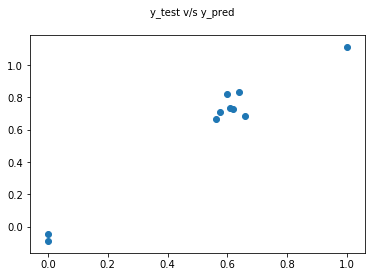

In [228]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test v/s y_pred', fontsize = 10)    


### Camera Accessory Model Elasticity - Basic Linear Model

In [229]:
df_coeff = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_camera_lm1, y_train_camera, df_coeff)

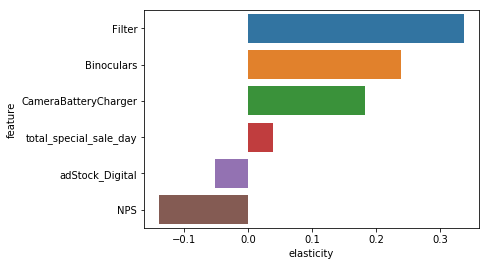

In [230]:
sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))

### Gaming Accessory - Basic Linear Model

In [231]:
df_gaming = final_data_for_gaming_including_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count','percentageOf_online_transactions'], axis = 1)

In [232]:
df_gaming.isnull().any()

week                         False
gmv                          False
sla                          False
product_procurement_sla      False
discount                     False
NPS                          False
total_holiday                False
is_holiday                   False
total_special_sale_day       False
is_special_sale_day          False
total_pay_days               False
is_pay_days                  False
CoolingPad                   False
GameControlMount             False
GamePad                      False
GamingAccessoryKit           False
GamingAdapter                False
GamingChargingStation        False
GamingHeadset                False
GamingKeyboard               False
GamingMemoryCard             False
GamingMouse                  False
GamingMousePad               False
GamingSpeaker                False
JoystickGamingWheel          False
MotionController             False
TVOutCableAccessory          False
Month                        False
Year                

In [233]:
#Test train split

df_gaming_train, df_gaming_test = train_test_split(df_gaming, train_size=0.7,test_size = 0.3, random_state =100)

In [234]:
#Scaling the features
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_gaming_train[numeric_variables] = scaler.fit_transform(df_gaming_train[numeric_variables])
df_gaming_test[numeric_variables] = scaler.fit_transform(df_gaming_test[numeric_variables])

In [235]:
y_train_gaming = df_gaming_train.pop('gmv')
x_train_gaming = df_gaming_train

In [236]:
x_train_gaming.columns

Index(['week', 'sla', 'product_procurement_sla', 'discount', 'NPS',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory',
       'Month', 'Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [237]:
y_train_gaming

26   0.44
41   0.42
28   0.42
38   0.44
17   0.38
7    0.00
50   0.47
49   0.49
40   0.51
19   0.36
21   0.39
13   0.33
1    0.37
4    0.25
12   0.34
27   0.47
43   0.82
22   0.41
29   0.65
9    0.29
16   0.31
36   0.63
47   0.72
51   0.43
42   0.25
14   0.28
44   0.49
2    0.31
34   0.45
30   0.41
10   0.33
15   1.00
23   0.47
39   0.49
3    0.35
24   0.38
8    0.00
Name: gmv, dtype: float64

In [238]:
lm_gaming = LinearRegression()
#lm_gaming.fit(x_train_gaming, y_train_gaming)

#rfe_gaming = RFE(lm_gaming,20)
#rfe_gaming = rfe_gaming.fit(x_train_gaming, y_train_gaming)

In [239]:
lm_gaming.fit(x_train_gaming, y_train_gaming)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
rfe_gaming = RFE(lm_gaming,20)
rfe_gaming = rfe_gaming.fit(x_train_gaming, y_train_gaming)

In [241]:
column = x_train_gaming.columns[rfe_gaming.support_]
column

Index(['product_procurement_sla', 'total_holiday', 'GamePad',
       'GamingChargingStation', 'GamingHeadset', 'GamingMemoryCard',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [242]:
x_train_gaming_rfe1 = x_train_gaming[column]

# Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_rfe1)
# Create a first fitted model
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     328.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.86e-17
Time:                        22:48:27   Log-Likelihood:                 122.11
No. Observations:                  37   AIC:                            -202.2
Df Residuals:                      16   BIC:                            -168.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 427106147.20
18                adStock_SEM      5421.28
13            adStock_Digital      3695.34
16   adStock_Online marketing      2327.43
19              adStock_Radio      2230.51
20              adStock_Other      2060.33
17        adStock_ Affiliates      2037.11
15  adStock_Content Marketing       674.67
12                 adStock_TV       251.14
14        adStock_Sponsorship       117.07
11                       Year        26.15
5               GamingHeadset        22.93
7              GamingMousePad        14.05
9         JoystickGamingWheel        12.73
6            GamingMemoryCard        10.90
10           MotionController         6.80
8               GamingSpeaker         6.17
3                     GamePad         5.59
1     product_procurement_sla         3.94
4       GamingChargingStation         3.18
2               total_holiday         1.79

In [243]:
# removing the feature with highest p-value
x_train_gaming_new= x_train_gaming_rfe1.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     362.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.63e-18
Time:                        22:48:28   Log-Likelihood:                 121.85
No. Observations:                  37   AIC:                            -203.7
Df Residuals:                      17   BIC:                            -171.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 425293564.10
17                adStock_SEM      5139.72
13            adStock_Digital      3452.05
18              adStock_Radio      2226.53
19              adStock_Other      2051.15
15  adStock_Content Marketing       664.31
12                 adStock_TV       236.50
14        adStock_Sponsorship       107.81
16        adStock_ Affiliates        77.85
11                       Year        26.04
5               GamingHeadset        20.19
7              GamingMousePad        13.03
9         JoystickGamingWheel        12.39
6            GamingMemoryCard         9.33
10           MotionController         6.35
8               GamingSpeaker         5.90
3                     GamePad         5.59
1     product_procurement_sla         3.78
4       GamingChargingStation         2.81
2               total_holiday         1.55

In [244]:
# removing the feature with highest p-value
x_train_gaming_new1= x_train_gaming_new.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new1)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     333.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.53e-19
Time:                        22:48:28   Log-Likelihood:                 118.25
No. Observations:                  37   AIC:                            -198.5
Df Residuals:                      18   BIC:                            -167.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 388545316.91
16                adStock_SEM      4840.89
12            adStock_Digital      3427.53
17              adStock_Radio      2162.88
18              adStock_Other      1943.34
14  adStock_Content Marketing       476.38
11                 adStock_TV       200.45
13        adStock_Sponsorship        96.70
15        adStock_ Affiliates        63.33
10                       Year        23.79
4               GamingHeadset        18.48
8         JoystickGamingWheel        12.38
6              GamingMousePad        10.41
5            GamingMemoryCard         9.33
7               GamingSpeaker         5.86
9            MotionController         5.65
2                     GamePad         5.51
3       GamingChargingStation         2.76
1               total_holiday         1.55

In [245]:
#Since p values are in control range we will remove the variable with the highest VIF

# removing the feature with highest p-value
x_train_gaming_new2= x_train_gaming_new1.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new2)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.64e-16
Time:                        22:48:28   Log-Likelihood:                 98.155
No. Observations:                  37   AIC:                            -160.3
Df Residuals:                      19   BIC:                            -131.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 138396181.76
14  adStock_Content Marketing       456.44
16              adStock_Radio       367.22
17              adStock_Other       302.12
12            adStock_Digital       228.60
13        adStock_Sponsorship        77.53
11                 adStock_TV        73.80
15        adStock_ Affiliates        63.30
4               GamingHeadset        18.28
8         JoystickGamingWheel        10.76
6              GamingMousePad        10.24
10                       Year         8.46
5            GamingMemoryCard         5.97
7               GamingSpeaker         5.75
9            MotionController         5.61
2                     GamePad         5.22
3       GamingChargingStation         2.75
1               total_holiday         1.52

In [246]:
# removing the feature with highest p-value
x_train_gaming_new3= x_train_gaming_new2.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new3)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     139.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.58e-17
Time:                        22:48:28   Log-Likelihood:                 98.115
No. Observations:                  37   AIC:                            -162.2
Df Residuals:                      20   BIC:                            -134.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 137163644.59
13  adStock_Content Marketing       363.40
15              adStock_Radio       253.65
11            adStock_Digital       184.54
16              adStock_Other       128.12
12        adStock_Sponsorship        53.10
4               GamingHeadset        16.00
8         JoystickGamingWheel        10.23
10                       Year         8.39
6              GamingMousePad         7.71
5            GamingMemoryCard         5.77
9            MotionController         5.60
7               GamingSpeaker         4.65
14        adStock_ Affiliates         4.60
2                     GamePad         4.32
3       GamingChargingStation         2.75
1               total_holiday         1.48

In [247]:
# removing the feature with highest p-value
x_train_gaming_new4= x_train_gaming_new3.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new4)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.03e-18
Time:                        22:48:28   Log-Likelihood:                 97.852
No. Observations:                  37   AIC:                            -163.7
Df Residuals:                      21   BIC:                            -137.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 130438483.51
13  adStock_Content Marketing        63.66
11            adStock_Digital        42.29
12        adStock_Sponsorship         9.54
15              adStock_Other         8.88
10                       Year         7.98
4               GamingHeadset         7.89
8         JoystickGamingWheel         7.30
6              GamingMousePad         6.10
5            GamingMemoryCard         5.65
9            MotionController         4.64
14        adStock_ Affiliates         4.50
7               GamingSpeaker         4.40
2                     GamePad         4.26
3       GamingChargingStation         2.71
1               total_holiday         1.41

In [248]:
# removing the feature with highest p-value
x_train_gaming_new5= x_train_gaming_new4.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new5)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     98.17
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.68e-16
Time:                        22:48:28   Log-Likelihood:                 87.500
No. Observations:                  37   AIC:                            -145.0
Df Residuals:                      22   BIC:                            -120.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    62.88

Features          VIF
0                   const 102654616.26
4           GamingHeadset         6.57
12    adStock_Sponsorship         6.45
10                   Year         6.28
8     JoystickGamingWheel         6.11
6          GamingMousePad         5.57
11        adStock_Digital         5.19
5        GamingMemoryCard         4.77
9        MotionController         4.60
14          adStock_Other         4.60
7           GamingSpeaker         4.36
2                 GamePad         4.02
13    adStock_ Affiliates         4.01
3   GamingChargingStation         2.62
1           total_holiday         1.36

In [249]:
# removing the feature with highest p-value
x_train_gaming_new6= x_train_gaming_new5.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new6)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.56e-17
Time:                        22:48:28   Log-Likelihood:                 87.494
No. Observations:                  37   AIC:                            -147.0
Df Residuals:                      23   BIC:                            -124.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    64.22

Features         VIF
0                   const 92024287.81
11    adStock_Sponsorship        6.44
4           GamingHeadset        6.39
7     JoystickGamingWheel        6.07
9                    Year        5.63
5          GamingMousePad        5.52
10        adStock_Digital        4.91
8        MotionController        4.59
6           GamingSpeaker        4.19
2                 GamePad        3.99
12    adStock_ Affiliates        3.83
13          adStock_Other        3.55
3   GamingChargingStation        2.10
1           total_holiday        1.35

In [250]:
# removing the feature with highest p-value
x_train_gaming_new7= x_train_gaming_new6.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new7)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.38e-18
Time:                        22:48:28   Log-Likelihood:                 87.460
No. Observations:                  37   AIC:                            -148.9
Df Residuals:                      24   BIC:                            -128.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    61.99

Features         VIF
0                   const 86804441.60
4           GamingHeadset        6.04
7     JoystickGamingWheel        6.02
5          GamingMousePad        5.50
9                    Year        5.31
8        MotionController        4.59
6           GamingSpeaker        4.18
2                 GamePad        3.81
11    adStock_ Affiliates        3.60
12          adStock_Other        3.24
10    adStock_Sponsorship        2.59
3   GamingChargingStation        1.85
1           total_holiday        1.35

In [251]:
# removing the feature with highest p-value
x_train_gaming_new8= x_train_gaming_new7.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new8)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.88e-19
Time:                        22:48:28   Log-Likelihood:                 86.688
No. Observations:                  37   AIC:                            -149.4
Df Residuals:                      25   BIC:                            -130.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.24

Features         VIF
0                   const 61235653.59
4           GamingHeadset        5.81
5          GamingMousePad        5.24
7        MotionController        4.26
2                 GamePad        3.81
8                    Year        3.75
10    adStock_ Affiliates        3.50
11          adStock_Other        2.75
6           GamingSpeaker        2.56
9     adStock_Sponsorship        2.35
3   GamingChargingStation        1.71
1           total_holiday        1.29

In [252]:
# removing the feature with highest p-value
x_train_gaming_new9= x_train_gaming_new8.drop(["Year"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new9)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.55e-20
Time:                        22:48:28   Log-Likelihood:                 85.888
No. Observations:                  37   AIC:                            -149.8
Df Residuals:                      26   BIC:                            -132.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

Features   VIF
0                   const 11.46
4           GamingHeadset  5.81
5          GamingMousePad  5.16
9     adStock_ Affiliates  3.26
2                 GamePad  3.12
7        MotionController  2.81
6           GamingSpeaker  2.54
10          adStock_Other  2.21
8     adStock_Sponsorship  2.20
3   GamingChargingStation  1.63
1           total_holiday  1.19

In [253]:
# removing the feature with highest p-value
x_train_gaming_new10= x_train_gaming_new9.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(x_train_gaming_new10)
  
lr = sm.OLS(y_train_gaming, X_train_lm1).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm1.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.23e-21
Time:                        22:48:28   Log-Likelihood:                 84.770
No. Observations:                  37   AIC:                            -149.5
Df Residuals:                      27   BIC:                            -133.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.01

Features  VIF
0                  const 9.72
5         GamingMousePad 4.78
4          GamingHeadset 4.22
2                GamePad 3.11
7       MotionController 2.76
6          GamingSpeaker 2.53
9          adStock_Other 1.69
3  GamingChargingStation 1.63
8    adStock_Sponsorship 1.38
1          total_holiday 1.19

In [254]:
#We can consider this as one model since the p-values and the VIF are in control

# removing the feature with highest p-value
x_train_gaming_new11= x_train_gaming_new10.drop(["GamingChargingStation"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(x_train_gaming_new11)
  
lr = sm.OLS(y_train_gaming, X_train_lm2).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm2.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.09e-21
Time:                        22:48:28   Log-Likelihood:                 82.176
No. Observations:                  37   AIC:                            -146.4
Df Residuals:                      28   BIC:                            -131.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0135    

Features  VIF
0                const 9.38
4       GamingMousePad 4.72
3        GamingHeadset 4.22
2              GamePad 3.10
6     MotionController 2.53
5        GamingSpeaker 2.29
7  adStock_Sponsorship 1.38
8        adStock_Other 1.33
1        total_holiday 1.14

In [255]:
#We can consider this as one model since the p-values and the VIF are in control

# removing the feature with highest p-value
x_train_gaming_new12= x_train_gaming_new11.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(x_train_gaming_new12)
  
lr = sm.OLS(y_train_gaming, X_train_lm3).fit()

lr.params
print(lr.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm3.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.86e-22
Time:                        22:48:28   Log-Likelihood:                 80.001
No. Observations:                  37   AIC:                            -144.0
Df Residuals:                      29   BIC:                            -131.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0193    

Features  VIF
0                const 9.00
4       GamingMousePad 4.71
3        GamingHeadset 4.09
2              GamePad 3.10
6     MotionController 2.52
5        GamingSpeaker 2.24
7  adStock_Sponsorship 1.23
1        total_holiday 1.10

We will select this as the firsr basic model for gaming as the p-values and vifs are in control

In [256]:
#We can consider this as one model since the p-values and the VIF are in control

# removing the feature with highest p-value
x_train_gaming_new13= x_train_gaming_new12.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(x_train_gaming_new13)
  
lr2 = sm.OLS(y_train_gaming, X_train_lm4).fit()

lr2.params
print(lr2.summary())
var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = X_train_lm4.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     78.63
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.40e-17
Time:                        22:48:28   Log-Likelihood:                 62.826
No. Observations:                  37   AIC:                            -111.7
Df Residuals:                      30   BIC:                            -100.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0081    

Features  VIF
0                const 8.89
5     MotionController 2.41
2              GamePad 2.11
4        GamingSpeaker 1.93
3        GamingHeadset 1.76
6  adStock_Sponsorship 1.23
1        total_holiday 1.08

We will continue with the firsr model as we see a sharp dip in the Adj R squsre value

### Model Evaluation

In [257]:
y_test = df_gaming_test.pop('gmv')
x_test = df_gaming_test

In [258]:
x_test = x_test[X_train_lm3.drop('const', axis = 1).columns]
x_test = sm.add_constant(x_test)
x_test

const  total_holiday  GamePad  GamingHeadset  GamingMousePad  \
25   1.00           1.00     1.00           0.83            0.73   
48   1.00           0.00     0.94           0.50            0.46   
52   1.00           0.00     0.36           0.22            0.13   
37   1.00           0.50     0.82           0.37            0.45   
6    1.00           0.00     0.00           0.00            0.00   
18   1.00           0.00     0.98           0.41            0.30   
20   1.00           0.00     0.58           0.32            0.34   
46   1.00           0.50     0.79           0.78            0.54   
5    1.00           0.50     0.00           0.00            0.00   
31   1.00           0.00     0.69           0.63            0.74   
33   1.00           0.50     0.72           0.97            1.00   
45   1.00           0.50     0.84           0.76            0.65   
35   1.00           0.00     0.76           1.00            0.62   
32   1.00           0.50     0.64           0.76            0.59   
0    1.00           0.50     0.01           0.00            0.01   
11   1.00           0.00     0.78           0.16            0.46   

    GamingSpeaker  MotionController  adStock_Sponsorship  
25           0.24              0.74                 0.98  
48           1.00              0.42                 0.56  
52           0.15              0.58                 0.43  
37           0.15              0.51                 0.68  
6            0.00              0.00                 0.00  
18           0.05              0.14                 0.68  
20           0.02              0.23                 0.37  
46           0.58              1.00                 0.69  
5            0.00              0.00                 0.02  
31           0.38              0.40                 0.16  
33           0.09              0.23                 0.21  
45           0.47              0.63                 0.68  
35           0.11              0.33                 0.48  
32           0.15              0.44                 0.19  
0            0.00              0.00                 0.05  
11           0.00              0.47                 1.00

In [259]:
y_pred = lr.predict(x_test)

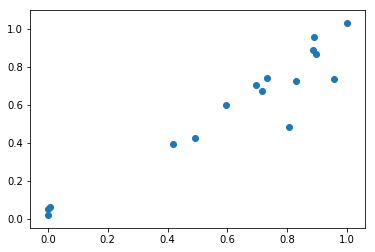

In [260]:
plt.scatter(y_test,y_pred)

In [261]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.011392901861475891


In [262]:
df_coeff_gaming = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff_gaming.columns = ['feature','coefficient']
elast_data = findElasticity(X_train_lm3, y_train_gaming, df_coeff_gaming)

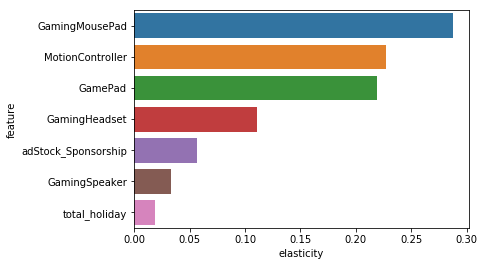

In [263]:
sns.barplot(x='elasticity', y='feature', data = elast_data.sort_values('elasticity',ascending=False))

### Basic Linear Model for Home Audio

In [264]:
final_data_for_home_audio_including_adstock = final_data_for_home_audio_including_adstock.fillna(0)

In [265]:
final_data_for_home_audio_including_adstock.isnull().any()

week                                False
gmv                                 False
units                               False
sla                                 False
product_procurement_sla             False
product_mrp                         False
selling_price                       False
discount                            False
NPS                                 False
total_transactions                  False
total_holiday                       False
is_holiday                          False
total_special_sale_day              False
is_special_sale_day                 False
total_pay_days                      False
is_pay_days                         False
COD_count                           False
Prepaid_count                       False
percentageOf_online_transactions    False
BoomBox                             False
DJController                        False
Dock                                False
DockingStation                      False
FMRadio                           

In [266]:
df_home_audio = final_data_for_home_audio_including_adstock.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)
df_home_audio

week         gmv  sla  product_procurement_sla  discount   NPS  \
0     27   101627.00 2.86                     3.57      0.37 54.60   
1     28  4485348.13 7.53                     2.86      0.32 54.60   
2     29  5290726.00 7.08                     2.76      0.34 54.60   
3     30  4541341.00 7.10                     2.84      0.34 54.60   
4     31  3370335.00 7.27                     2.72      0.33 54.60   
5     32     2599.00 9.00                     2.00      0.16 59.99   
6     36  3740010.00 5.56                     2.79      0.38 46.98   
7     37  4032024.00 5.51                     2.88      0.38 46.93   
8     38  3617341.00 6.19                     2.68      0.37 46.93   
9     39  4128524.00 6.31                     2.67      0.35 46.93   
10    40  4018011.00 6.33                     2.52      0.35 45.49   
11    41  3569143.00 5.94                     2.60      0.35 44.40   
12    42 19177390.00 5.94                     2.35      0.42 44.40   
13    43  5676111.00 6.58                     2.65      0.37 44.40   
14    44  6108498.00 6.52                     2.52      0.36 44.73   
15    45  7320846.00 5.04                     2.78      0.45 47.00   
16    46  5076162.80 6.43                     2.47      0.38 47.00   
17    47  3719649.50 5.92                     2.66      0.37 47.00   
18    48  3808963.50 6.42                     2.52      0.35 47.00   
19    49  4316845.00 5.75                     2.79      0.41 45.98   
20    50  6814555.42 4.96                     2.97      0.48 45.80   
21    51  4812789.00 5.92                     2.81      0.40 45.80   
22    52  6482399.25 5.21                     2.55      0.43 45.80   
23    53  5059789.25 5.88                     2.48      0.37 46.39   
24    54  6996240.00 4.79                     2.86      0.45 47.09   
25    55  4862091.00 5.46                     2.86      0.40 47.09   
26    56  5496892.34 5.75                     2.68      0.42 47.09   
27    57  4691152.00 5.68                     2.68      0.39 47.09   
28    58  6902225.00 4.87                     2.80      0.44 50.33   
29    59  4669168.00 5.31                     2.81      0.40 50.33   
30    60  6547746.36 5.07                     2.61      0.43 50.33   
31    61  5223642.00 5.69                     2.61      0.38 50.33   
32    62  4781039.00 5.78                     2.69      0.36 49.20   
33    63  6644110.00 5.28                     2.68      0.41 49.02   
34    64  4629455.00 5.33                     2.58      0.38 49.02   
35    65  3544522.00 5.62                     2.61      0.37 49.02   
36    66  3546570.00 5.40                     2.70      0.38 50.17   
37    67  3356788.00 5.79                     2.71      0.37 51.83   
38    68  2826330.00 5.61                     2.60      0.38 51.83   
39    69  1758615.00 4.58                     2.78      0.36 51.83   
40    70  5837458.00 5.93                     2.66      0.39 51.45   
41    71  3657196.00 5.13                     2.53      0.39 47.31   
42    72  3591861.00 5.05                     2.61      0.40 47.31   
43    73  3252744.00 5.02                     2.65      0.39 47.31   
44    74  3800323.00 4.31                     2.54      0.38 47.31   
45    75  3429091.00 5.00                     2.64      0.36 49.70   
46    76  3533585.00 5.56                     2.59      0.34 50.52   
47    77  3564818.00 4.95                     2.71      0.33 50.52   
48    78  3156425.00 4.19                     2.54      0.34 50.52   
49    79  1529929.00 3.95                     2.56      0.34 50.52   
50    33        0.00 0.00                     0.00      0.00  0.00   
51    34        0.00 0.00                     0.00      0.00  0.00   
52    35        0.00 0.00                     0.00      0.00  0.00   

    total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
0            1.00        1.00                    0.00                 0.00   
1            0.00        0.00                    0.00              

In [267]:
df_home_audio_train, df_home_audio_test = train_test_split(df_home_audio, train_size = 0.7, test_size = 0.3, random_state = 100)

In [268]:
df_home_audio_train.columns

Index(['week', 'gmv', 'sla', 'product_procurement_sla', 'discount', 'NPS',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days',
       'percentageOf_online_transactions', 'BoomBox', 'DJController', 'Dock',
       'DockingStation', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'KaraokePlayer', 'SlingBox', 'SoundMixer', 'VoiceRecorder', 'Month',
       'Year', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [269]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_variables_home=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_home_audio_train[numeric_variables_home] = scaler.fit_transform(df_home_audio_train[numeric_variables_home])
df_home_audio_test[numeric_variables_home] = scaler.fit_transform(df_home_audio_test[numeric_variables_home])

In [270]:
y_train_home = df_home_audio_train.pop('gmv')
x_train_home = df_home_audio_train

In [271]:
x_train_home.isnull().any()

week                                False
sla                                 False
product_procurement_sla             False
discount                            False
NPS                                 False
total_holiday                       False
is_holiday                          False
total_special_sale_day              False
is_special_sale_day                 False
total_pay_days                      False
is_pay_days                         False
percentageOf_online_transactions    False
BoomBox                             False
DJController                        False
Dock                                False
DockingStation                      False
FMRadio                             False
HiFiSystem                          False
HomeAudioSpeaker                    False
KaraokePlayer                       False
SlingBox                            False
SoundMixer                          False
VoiceRecorder                       False
Month                             

In [272]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(x_train_home, y_train_home)

rfe = RFE(lm, 20) 
rfe = rfe.fit(x_train_home, y_train_home)

In [273]:
col = x_train_home.columns[rfe.support_]
col

Index(['sla', 'product_procurement_sla', 'discount', 'total_holiday',
       'BoomBox', 'DJController', 'DockingStation', 'FMRadio',
       'HomeAudioSpeaker', 'KaraokePlayer', 'Year', 'adStock_TV',
       'adStock_Digital', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [274]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home = x_train_home[col]

# Add a constant
X_train_lm_home = sm.add_constant(X_train_rfe_home)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_home).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_home.values, i) for i in range(X_train_lm_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1416.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.51e-22
Time:                        22:48:35   Log-Likelihood:                 155.34
No. Observations:                  37   AIC:                            -268.7
Df Residuals:                      16   BIC:                            -234.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 901554765.19
18                adStock_SEM      6330.42
13            adStock_Digital      4613.12
16   adStock_Online marketing      4007.45
17        adStock_ Affiliates      3925.59
19              adStock_Radio      3622.34
20              adStock_Other      2777.75
14        adStock_Sponsorship       319.52
15  adStock_Content Marketing       309.78
12                 adStock_TV       188.25
3                    discount        86.65
2     product_procurement_sla        74.96
9            HomeAudioSpeaker        58.36
11                       Year        55.22
5                     BoomBox        34.20
8                     FMRadio        24.03
1                         sla        18.07
10              KaraokePlayer         9.94
7              DockingStation         7.72
6                DJController         5.34
4               total_holiday         2.63

In [275]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home2 = X_train_rfe_home.drop(['adStock_SEM'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home2)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1358.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.26e-23
Time:                        22:48:35   Log-Likelihood:                 152.50
No. Observations:                  37   AIC:                            -265.0
Df Residuals:                      17   BIC:                            -232.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 154878569.68
16   adStock_Online marketing      2743.79
17        adStock_ Affiliates      2682.75
19              adStock_Other       313.36
15  adStock_Content Marketing       304.02
18              adStock_Radio       282.89
13            adStock_Digital       172.30
12                 adStock_TV       124.09
14        adStock_Sponsorship       123.75
3                    discount        74.40
2     product_procurement_sla        55.96
9            HomeAudioSpeaker        30.13
8                     FMRadio        20.56
5                     BoomBox        17.42
1                         sla        17.06
10              KaraokePlayer         9.87
11                       Year         9.48
7              DockingStation         7.15
6                DJController         5.00
4               total_holiday         2.35

In [276]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home3 = X_train_rfe_home2.drop(['adStock_Sponsorship'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home3)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1507.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.99e-25
Time:                        22:48:35   Log-Likelihood:                 152.37
No. Observations:                  37   AIC:                            -266.7
Df Residuals:                      18   BIC:                            -236.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 134006839.88
15   adStock_Online marketing      1465.07
16        adStock_ Affiliates      1007.81
17              adStock_Radio       281.67
18              adStock_Other       271.32
14  adStock_Content Marketing       152.94
13            adStock_Digital        86.16
3                    discount        71.72
2     product_procurement_sla        55.96
12                 adStock_TV        29.26
9            HomeAudioSpeaker        21.81
8                     FMRadio        19.14
1                         sla        16.69
5                     BoomBox        13.04
10              KaraokePlayer         9.63
11                       Year         8.20
7              DockingStation         6.97
6                DJController         4.99
4               total_holiday         2.18

In [277]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home4 = X_train_rfe_home3.drop(['adStock_TV'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home4)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1661.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.62e-26
Time:                        22:48:35   Log-Likelihood:                 152.11
No. Observations:                  37   AIC:                            -268.2
Df Residuals:                      19   BIC:                            -239.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features          VIF
0                       const 124482244.78
14   adStock_Online marketing      1300.26
15        adStock_ Affiliates       966.06
13  adStock_Content Marketing       139.30
12            adStock_Digital        73.45
3                    discount        70.11
16              adStock_Radio        62.82
17              adStock_Other        58.28
2     product_procurement_sla        54.93
9            HomeAudioSpeaker        20.38
8                     FMRadio        18.06
1                         sla        16.68
5                     BoomBox        12.84
10              KaraokePlayer         9.47
11                       Year         7.61
7              DockingStation         5.51
6                DJController         4.24
4               total_holiday         2.06

In [278]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home5 = X_train_rfe_home4.drop(['adStock_Content Marketing'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home5)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1799.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.04e-28
Time:                        22:48:35   Log-Likelihood:                 151.52
No. Observations:                  37   AIC:                            -269.0
Df Residuals:                      20   BIC:                            -241.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                      const 121406979.86
13  adStock_Online marketing       420.05
14       adStock_ Affiliates       358.31
3                   discount        69.65
15             adStock_Radio        57.12
2    product_procurement_sla        54.19
16             adStock_Other        40.91
9           HomeAudioSpeaker        19.92
8                    FMRadio        18.06
1                        sla        16.57
5                    BoomBox        11.21
12           adStock_Digital        10.81
10             KaraokePlayer         9.47
11                      Year         7.43
7             DockingStation         4.56
6               DJController         4.24
4              total_holiday         1.93

In [279]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home6 = X_train_rfe_home5.drop(['BoomBox'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home6)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1946.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.57e-29
Time:                        22:48:35   Log-Likelihood:                 150.88
No. Observations:                  37   AIC:                            -269.8
Df Residuals:                      21   BIC:                            -244.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                      const 114614878.85
12  adStock_Online marketing       417.73
13       adStock_ Affiliates       347.39
3                   discount        68.35
14             adStock_Radio        56.25
2    product_procurement_sla        52.23
15             adStock_Other        40.70
8           HomeAudioSpeaker        19.05
1                        sla        12.85
11           adStock_Digital         9.70
7                    FMRadio         9.64
9              KaraokePlayer         9.46
10                      Year         7.01
6             DockingStation         4.56
5               DJController         3.68
4              total_holiday         1.73

In [280]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home7 = X_train_rfe_home6.drop(['discount'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home7)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2075.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.73e-31
Time:                        22:48:35   Log-Likelihood:                 149.93
No. Observations:                  37   AIC:                            -269.9
Df Residuals:                      22   BIC:                            -245.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                      const 113847724.85
11  adStock_Online marketing       401.05
12       adStock_ Affiliates       344.71
13             adStock_Radio        54.10
14             adStock_Other        39.91
1                        sla        12.82
2    product_procurement_sla        11.24
8              KaraokePlayer         9.32
7           HomeAudioSpeaker         8.60
10           adStock_Digital         8.53
6                    FMRadio         8.47
9                       Year         6.96
5             DockingStation         4.53
4               DJController         3.62
3              total_holiday         1.72

In [281]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home8 = X_train_rfe_home7.drop(['DJController'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home8)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2007.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.59e-32
Time:                        22:48:35   Log-Likelihood:                 147.12
No. Observations:                  37   AIC:                            -266.2
Df Residuals:                      23   BIC:                            -243.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features          VIF
0                      const 113684486.66
10  adStock_Online marketing       364.07
11       adStock_ Affiliates       315.25
12             adStock_Radio        53.21
13             adStock_Other        39.79
1                        sla        12.07
2    product_procurement_sla        11.21
5                    FMRadio         8.47
6           HomeAudioSpeaker         8.30
8                       Year         6.95
9            adStock_Digital         6.07
7              KaraokePlayer         4.80
4             DockingStation         4.29
3              total_holiday         1.61

In [282]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home9 = X_train_rfe_home8.drop(['sla'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home9)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2146.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.62e-33
Time:                        22:48:35   Log-Likelihood:                 146.09
No. Observations:                  37   AIC:                            -266.2
Df Residuals:                      24   BIC:                            -245.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features         VIF
0                      const 87567396.02
9   adStock_Online marketing      330.14
10       adStock_ Affiliates      292.89
11             adStock_Radio       48.76
12             adStock_Other       38.37
5           HomeAudioSpeaker        7.72
4                    FMRadio        6.91
7                       Year        5.36
8            adStock_Digital        5.10
6              KaraokePlayer        4.77
3             DockingStation        4.01
1    product_procurement_sla        2.46
2              total_holiday        1.51

In [283]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home10 = X_train_rfe_home9.drop(['adStock_Online marketing'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home10)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1716.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.12e-33
Time:                        22:48:35   Log-Likelihood:                 139.59
No. Observations:                  37   AIC:                            -255.2
Df Residuals:                      25   BIC:                            -235.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features         VIF
0                     const 79386968.61
10            adStock_Radio       17.21
11            adStock_Other       15.80
5          HomeAudioSpeaker        7.70
4                   FMRadio        6.82
7                      Year        4.86
6             KaraokePlayer        4.77
3            DockingStation        3.75
8           adStock_Digital        2.67
9       adStock_ Affiliates        2.62
1   product_procurement_sla        2.45
2             total_holiday        1.34

In [284]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home11 = X_train_rfe_home10.drop(['adStock_Radio'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home11)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.99e-35
Time:                        22:48:35   Log-Likelihood:                 139.59
No. Observations:                  37   AIC:                            -257.2
Df Residuals:                      26   BIC:                            -239.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features         VIF
0                     const 75520946.59
5          HomeAudioSpeaker        7.50
4                   FMRadio        6.45
6             KaraokePlayer        4.76
7                      Year        4.62
3            DockingStation        2.88
8           adStock_Digital        2.65
9       adStock_ Affiliates        2.55
1   product_procurement_sla        2.45
10            adStock_Other        2.22
2             total_holiday        1.26

In [285]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home12 = X_train_rfe_home11.drop(['adStock_Other'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home12)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2265.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.82e-36
Time:                        22:48:35   Log-Likelihood:                 139.59
No. Observations:                  37   AIC:                            -259.2
Df Residuals:                      27   BIC:                            -243.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features         VIF
0                    const 57695880.53
5         HomeAudioSpeaker        6.99
4                  FMRadio        6.32
6            KaraokePlayer        4.42
7                     Year        3.53
3           DockingStation        2.70
8          adStock_Digital        2.49
9      adStock_ Affiliates        2.43
1  product_procurement_sla        2.26
2            total_holiday        1.19

In [286]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home13 = X_train_rfe_home12.drop(['total_holiday'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home13)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2624.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.76e-38
Time:                        22:48:35   Log-Likelihood:                 139.46
No. Observations:                  37   AIC:                            -260.9
Df Residuals:                      28   BIC:                            -246.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features         VIF
0                    const 56126878.15
4         HomeAudioSpeaker        6.73
3                  FMRadio        6.26
5            KaraokePlayer        4.42
6                     Year        3.43
2           DockingStation        2.66
7          adStock_Digital        2.48
8      adStock_ Affiliates        2.37
1  product_procurement_sla        2.26

In [287]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home14 = X_train_rfe_home13.drop(['Year'],axis = 1)

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_rfe_home14)
# Create a first fitted model
lr2 = sm.OLS(y_train_home, X_train_lm_2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2760.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.56e-39
Time:                        22:48:35   Log-Likelihood:                 137.28
No. Observations:                  37   AIC:                            -258.6
Df Residuals:                      29   BIC:                            -245.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 18.47
4         HomeAudioSpeaker  6.37
3                  FMRadio  4.66
5            KaraokePlayer  4.33
6          adStock_Digital  2.40
7      adStock_ Affiliates  2.29
1  product_procurement_sla  2.04
2           DockingStation  1.82

In [288]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_home15 = X_train_rfe_home14.drop(['HomeAudioSpeaker'],axis = 1)

# Add a constant
X_train_lm_3 = sm.add_constant(X_train_rfe_home15)
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_lm_3).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3.values, i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     43.81
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.60e-13
Time:                        22:48:35   Log-Likelihood:                 59.128
No. Observations:                  37   AIC:                            -104.3
Df Residuals:                      30   BIC:                            -92.98
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 18.47
3                  FMRadio  3.79
4            KaraokePlayer  2.37
5          adStock_Digital  2.30
1  product_procurement_sla  1.99
6      adStock_ Affiliates  1.65
2           DockingStation  1.60

In [289]:
y_test = df_home_audio_test.pop('gmv')
x_test = df_home_audio_test

In [290]:
x_test = x_test[X_train_lm_2.drop('const', axis = 1).columns]
x_test = sm.add_constant(x_test)
x_test

const  product_procurement_sla  DockingStation  FMRadio  HomeAudioSpeaker  \
25   1.00                     0.80            0.26     0.63              0.70   
48   1.00                     0.71            0.74     0.33              0.39   
52   1.00                     0.00            0.00     0.00              0.00   
37   1.00                     0.76            0.68     0.72              0.40   
6    1.00                     0.78            0.00     0.83              0.45   
18   1.00                     0.71            0.16     0.77              0.54   
20   1.00                     0.83            0.16     0.83              1.00   
46   1.00                     0.73            1.00     0.78              0.41   
5    1.00                     0.56            0.00     0.00              0.00   
31   1.00                     0.73            0.58     0.77              0.74   
33   1.00                     0.75            0.58     0.99              0.93   
45   1.00                     0.74            0.84     0.52              0.44   
35   1.00                     0.73            0.26     0.83              0.49   
32   1.00                     0.75            0.26     0.90              0.65   
0    1.00                     1.00            0.00     0.00              0.01   
11   1.00                     0.73            0.16     1.00              0.44   

    KaraokePlayer  adStock_Digital  adStock_ Affiliates  
25           0.00             0.00                 1.00  
48           0.00             0.02                 0.34  
52           0.00             0.04                 0.00  
37           0.00             0.01                 0.80  
6            0.00             0.03                 0.29  
18           0.00             0.06                 0.95  
20           0.00             0.14                 0.83  
46           0.00             0.01                 0.47  
5            0.00             0.07                 0.02  
31           0.00             0.10                 0.94  
33           0.00             0.09                 0.77  
45           0.00             0.00                 0.64  
35           0.00             0.08                 0.73  
32           0.00             0.09                 0.83  
0            0.00             0.04                 0.03  
11           0.00             1.00                 0.91

In [291]:
y_predict = lr2.predict(x_test)

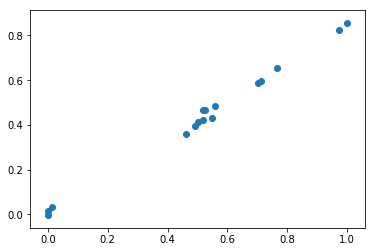

In [292]:
plt.scatter(y_test,y_predict)

In [293]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.08671824835838868


In [294]:
df_coeff_home = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
df_coeff_home.columns = ['feature','coefficient']
elast_data = findElasticity(X_train_lm_2, y_train_home, df_coeff_home)

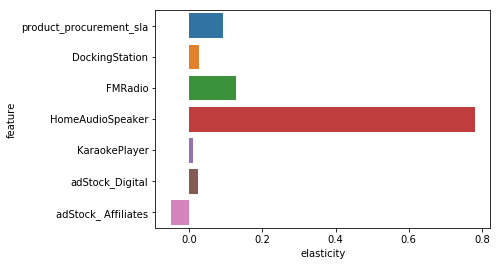

In [295]:
sns.barplot(x='elasticity', y = 'feature', data = elast_data)

### Multiplicative Model Building

#### Camera Accessory

In [296]:
final_data_for_camera_including_adstock

week         gmv    units   sla  product_procurement_sla  product_mrp  \
0     27    15375.00    25.00  2.28                     2.96      1456.84   
1     28  3800540.00  2916.00  7.06                     2.72      2452.50   
2     29  4274721.00  3093.00  6.40                     2.74      2494.09   
3     30  4298848.00  3084.00  6.42                     2.78      2537.26   
4     31  2741073.00  2059.00  6.37                     2.77      2407.93   
5     32      699.00     1.00  5.00                     4.00      1450.00   
6     33      299.00     1.00  6.00                     1.00      1990.00   
7     35     1190.00     3.00 10.33                     2.00       628.00   
8     36  3667923.00  2981.00  6.58                     2.82      2307.25   
9     37  4806012.00  3532.00  6.43                     2.92      2575.93   
10    38  4589627.00  3214.00  6.66                     2.85      2634.19   
11    39  4405967.00  3268.00  6.26                     3.05      2636.22   
12    40  4811662.00  4751.00  5.67                     2.55      2301.88   
13    41  3899772.00  3185.00  6.26                     2.69      2320.42   
14    42 12803139.98 10708.00  6.35                     3.03      2430.03   
15    43  4353114.11  3328.00  7.00                     2.75      2353.05   
16    44  5145921.50  4622.00  6.54                     2.94      2118.94   
17    45  5785635.00  4846.00  6.20                     2.86      2268.99   
18    46  4781003.00  3901.00  6.68                     2.84      2341.02   
19    47  3872810.00  3038.00  6.16                     2.80      2456.85   
20    48  4939238.00  3208.00  6.47                     2.89      2765.08   
21    49  5389940.00  3489.00  6.32                     2.85      2771.30   
22    50  5960395.00  4122.00  6.00                     2.69      2677.65   
23    51  4833541.00  3356.00  6.73                     2.78      2522.93   
24    52  6799221.00  4444.00  6.46                     2.83      2757.10   
25    53  5106460.00  4105.00  6.17                     2.75      2216.22   
26    54  4928583.00  5252.00  5.90                     2.83      1790.09   
27    55  4239998.00  3759.00  6.62                     2.63      2072.49   
28    56  6806825.00  5085.00  6.40                     2.65      2340.42   
29    57  4852203.00  3485.00  6.70                     2.59      2393.48   
30    58  5208993.00  5452.00  6.39                     2.67      1888.80   
31    59  4596774.00  3870.00  6.37                     2.59      2168.32   
32    60  6381315.00  6345.00  6.33                     2.67      1893.62   
33    61  5264659.00  5694.00  6.33                     2.32      1889.85   
34    62  4900865.00  5183.00  6.15                     2.54      1742.02   
35    63  7653069.00  5962.00  6.10                     2.53      2431.78   
36    64  4436404.00  4566.00  6.06                     2.39      1987.39   
37    65  4484037.00  4818.00  5.81                     2.45      1774.69   
38    66  5147705.00  5447.00  5.69                     2.42      1792.52   
39    67  5325687.00  5440.00  5.97                     2.38      2002.68   
40    68  4278388.00  4411.00  5.78                     2.42      1897.39   
41    69  2557952.00  2463.00  4.79                     2.51      2095.44   
42    70  8901508.00  8864.00  6.40                     2.50      2004.38   
43    71  5585309.00  6003.00  5.80                     2.34      1928.41   
44    72  5412700.00  5798.00  5.71                     2.39      1946.55   
45    73  5885712.00  5251.00  5.50                     2.45      2097.54   
46    74  7977006.00  6564.00  5.58                     2.38      2320.37   
47    75  4817288.00  5306.00  5.92                     2.35      1812.92   
48    76  4852681.00  5573.00  5.76                     2.34      1814.67   
49    77  4924772.00  4675.00  5.71                     2.51      1988.52   
50    78  3927525.00  3381.00  6.11                     2.54      2079.68   


In [297]:
final_data_for_camera_including_adstock.isnull().any()

week                                False
gmv                                  True
units                                True
sla                                  True
product_procurement_sla              True
product_mrp                          True
selling_price                        True
discount                             True
NPS                                  True
total_transactions                   True
total_holiday                        True
is_holiday                           True
total_special_sale_day               True
is_special_sale_day                  True
total_pay_days                       True
is_pay_days                          True
COD_count                            True
Prepaid_count                        True
percentageOf_online_transactions     True
Binoculars                           True
CameraAccessory                      True
CameraBag                            True
CameraBattery                        True
CameraBatteryCharger              

In [298]:
final_data_for_camera_including_adstock.replace(0.00, 0.000001)

week         gmv    units   sla  product_procurement_sla  product_mrp  \
0     27    15375.00    25.00  2.28                     2.96      1456.84   
1     28  3800540.00  2916.00  7.06                     2.72      2452.50   
2     29  4274721.00  3093.00  6.40                     2.74      2494.09   
3     30  4298848.00  3084.00  6.42                     2.78      2537.26   
4     31  2741073.00  2059.00  6.37                     2.77      2407.93   
5     32      699.00     1.00  5.00                     4.00      1450.00   
6     33      299.00     1.00  6.00                     1.00      1990.00   
7     35     1190.00     3.00 10.33                     2.00       628.00   
8     36  3667923.00  2981.00  6.58                     2.82      2307.25   
9     37  4806012.00  3532.00  6.43                     2.92      2575.93   
10    38  4589627.00  3214.00  6.66                     2.85      2634.19   
11    39  4405967.00  3268.00  6.26                     3.05      2636.22   
12    40  4811662.00  4751.00  5.67                     2.55      2301.88   
13    41  3899772.00  3185.00  6.26                     2.69      2320.42   
14    42 12803139.98 10708.00  6.35                     3.03      2430.03   
15    43  4353114.11  3328.00  7.00                     2.75      2353.05   
16    44  5145921.50  4622.00  6.54                     2.94      2118.94   
17    45  5785635.00  4846.00  6.20                     2.86      2268.99   
18    46  4781003.00  3901.00  6.68                     2.84      2341.02   
19    47  3872810.00  3038.00  6.16                     2.80      2456.85   
20    48  4939238.00  3208.00  6.47                     2.89      2765.08   
21    49  5389940.00  3489.00  6.32                     2.85      2771.30   
22    50  5960395.00  4122.00  6.00                     2.69      2677.65   
23    51  4833541.00  3356.00  6.73                     2.78      2522.93   
24    52  6799221.00  4444.00  6.46                     2.83      2757.10   
25    53  5106460.00  4105.00  6.17                     2.75      2216.22   
26    54  4928583.00  5252.00  5.90                     2.83      1790.09   
27    55  4239998.00  3759.00  6.62                     2.63      2072.49   
28    56  6806825.00  5085.00  6.40                     2.65      2340.42   
29    57  4852203.00  3485.00  6.70                     2.59      2393.48   
30    58  5208993.00  5452.00  6.39                     2.67      1888.80   
31    59  4596774.00  3870.00  6.37                     2.59      2168.32   
32    60  6381315.00  6345.00  6.33                     2.67      1893.62   
33    61  5264659.00  5694.00  6.33                     2.32      1889.85   
34    62  4900865.00  5183.00  6.15                     2.54      1742.02   
35    63  7653069.00  5962.00  6.10                     2.53      2431.78   
36    64  4436404.00  4566.00  6.06                     2.39      1987.39   
37    65  4484037.00  4818.00  5.81                     2.45      1774.69   
38    66  5147705.00  5447.00  5.69                     2.42      1792.52   
39    67  5325687.00  5440.00  5.97                     2.38      2002.68   
40    68  4278388.00  4411.00  5.78                     2.42      1897.39   
41    69  2557952.00  2463.00  4.79                     2.51      2095.44   
42    70  8901508.00  8864.00  6.40                     2.50      2004.38   
43    71  5585309.00  6003.00  5.80                     2.34      1928.41   
44    72  5412700.00  5798.00  5.71                     2.39      1946.55   
45    73  5885712.00  5251.00  5.50                     2.45      2097.54   
46    74  7977006.00  6564.00  5.58                     2.38      2320.37   
47    75  4817288.00  5306.00  5.92                     2.35      1812.92   
48    76  4852681.00  5573.00  5.76                     2.34      1814.67   
49    77  4924772.00  4675.00  5.71                     2.51      1988.52   
50    78  3927525.00  3381.00  6.11                     2.54      2079.68   


In [299]:
df_camera_mult = np.log(final_data_for_camera_including_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))

In [300]:
df_camera_mult_train, df_camera_mult_test = train_test_split(df_camera_mult, train_size = 0.7, test_size = 0.3,random_state=100)

In [301]:
scaler = MinMaxScaler()

In [302]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_camera_mult_train[numeric_variables] = scaler.fit_transform(df_camera_mult_train[numeric_variables])
df_camera_mult_test[numeric_variables] = scaler.fit_transform(df_camera_mult_test[numeric_variables])

In [303]:
y_train = df_camera_mult_train.pop('gmv')
x_train = df_camera_mult_train

In [304]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
rfe = RFE(lm,20)
rfe = rfe.fit(x_train, y_train)

In [306]:
columns_taken = x_train.columns[rfe.support_]

In [307]:
columns_taken

Index(['week', 'NPS', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraFilmRolls', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'Filter', 'Flash', 'Lens',
       'Strap', 'Telescope', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [308]:
x_train_rfe_df = x_train[columns_taken]

In [309]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     854.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.41e-20
Time:                        22:48:37   Log-Likelihood:                 147.12
No. Observations:                  37   AIC:                            -252.2
Df Residuals:                      16   BIC:                            -218.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [310]:
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

Features     VIF
0                       const 6817.42
16   adStock_Online marketing 4745.26
17        adStock_ Affiliates 3872.91
3               CameraBattery 1660.72
19              adStock_Radio 1408.56
20              adStock_Other 1292.44
4        CameraBatteryCharger  768.71
10                     Filter  655.35
14                  Telescope  496.08
8         CameraRemoteControl  448.97
13                      Strap  368.50
15  adStock_Content Marketing  235.73
9                CameraTripod  179.67
6             CameraFilmRolls  143.37
11                      Flash  117.22
7                 CameraMount  106.03
5           CameraBatteryGrip   79.68
12                       Lens   56.11
1                        week   46.34
2                         NPS   31.76
18                adStock_SEM   21.20

In [311]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     854.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.41e-20
Time:                        22:48:37   Log-Likelihood:                 147.12
No. Observations:                  37   AIC:                            -252.2
Df Residuals:                      16   BIC:                            -218.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 6817.42
16   adStock_Online marketing 4745.26
17        adStock_ Affiliates 3872.91
3               CameraBattery 1660.72
19              adStock_Radio 1408.56
20              adStock_Other 1292.44
4        CameraBatteryCharger  768.71
10                     Filter  655.35
14                  Telescope  496.08
8         CameraRemoteControl  448.97
13                      Strap  368.50
15  adStock_Content Marketing  235.73
9                CameraTripod  179.67
6             CameraFilmRolls  143.37
11                      Flash  117.22
7                 CameraMount  106.03
5           CameraBatteryGrip   79.68
12                       Lens   56.11
1                        week   46.34
2                         NPS   31.76
18                adStock_SEM   21.20

In [312]:
x_train_new = x_train_rfe_df.drop(['adStock_Radio'],axis=1)
x_train_lm = sm.add_constant(x_train_new)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     949.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.70e-22
Time:                        22:48:37   Log-Likelihood:                 147.01
No. Observations:                  37   AIC:                            -254.0
Df Residuals:                      17   BIC:                            -221.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5870.63
16   adStock_Online marketing 3800.06
17        adStock_ Affiliates 2981.36
3               CameraBattery 1652.81
4        CameraBatteryCharger  768.70
10                     Filter  651.44
14                  Telescope  479.02
8         CameraRemoteControl  447.37
13                      Strap  308.54
9                CameraTripod  178.80
15  adStock_Content Marketing  146.10
11                      Flash  117.17
7                 CameraMount  105.46
5           CameraBatteryGrip   71.43
6             CameraFilmRolls   65.49
12                       Lens   49.73
1                        week   40.29
2                         NPS   31.59
19              adStock_Other   15.21
18                adStock_SEM   11.09

In [313]:
x_train_new2 = x_train_new.drop(['Telescope'],axis=1)
x_train_lm = sm.add_constant(x_train_new2)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1054.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.49e-23
Time:                        22:48:37   Log-Likelihood:                 146.89
No. Observations:                  37   AIC:                            -255.8
Df Residuals:                      18   BIC:                            -225.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5858.84
15   adStock_Online marketing 3605.97
16        adStock_ Affiliates 2758.05
3               CameraBattery 1145.57
4        CameraBatteryCharger  766.16
10                     Filter  579.19
8         CameraRemoteControl  446.98
13                      Strap  273.71
9                CameraTripod  178.73
14  adStock_Content Marketing  146.09
11                      Flash  111.24
7                 CameraMount   92.55
6             CameraFilmRolls   65.13
5           CameraBatteryGrip   64.12
1                        week   39.06
12                       Lens   32.59
2                         NPS   26.48
18              adStock_Other   13.63
17                adStock_SEM    8.89

In [314]:
x_train_new3 = x_train_new2.drop(['Flash'],axis=1)
x_train_lm = sm.add_constant(x_train_new3)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.45e-25
Time:                        22:48:37   Log-Likelihood:                 146.78
No. Observations:                  37   AIC:                            -257.6
Df Residuals:                      19   BIC:                            -228.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5820.48
14   adStock_Online marketing 3237.60
15        adStock_ Affiliates 2446.52
3               CameraBattery 1145.45
4        CameraBatteryCharger  766.08
10                     Filter  561.89
8         CameraRemoteControl  444.45
12                      Strap  259.76
9                CameraTripod  178.73
13  adStock_Content Marketing  141.25
7                 CameraMount   92.21
5           CameraBatteryGrip   63.11
6             CameraFilmRolls   62.02
1                        week   38.84
11                       Lens   29.84
2                         NPS   26.45
17              adStock_Other   12.32
16                adStock_SEM    8.78

In [315]:
x_train_new4 = x_train_new3.drop(['CameraBatteryGrip'],axis=1)
x_train_lm = sm.add_constant(x_train_new4)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1291.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.38e-26
Time:                        22:48:37   Log-Likelihood:                 146.51
No. Observations:                  37   AIC:                            -259.0
Df Residuals:                      20   BIC:                            -231.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5375.59
13   adStock_Online marketing 2932.02
14        adStock_ Affiliates 2215.30
3               CameraBattery 1145.45
4        CameraBatteryCharger  756.01
9                      Filter  556.26
7         CameraRemoteControl  428.36
11                      Strap  228.46
8                CameraTripod  178.45
12  adStock_Content Marketing  129.53
6                 CameraMount   92.21
5             CameraFilmRolls   62.02
1                        week   35.22
10                       Lens   29.38
2                         NPS   26.35
16              adStock_Other   11.90
15                adStock_SEM    8.60

In [316]:
x_train_new5 = x_train_new4.drop(['Filter'],axis=1)
x_train_lm = sm.add_constant(x_train_new5)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.35e-28
Time:                        22:48:37   Log-Likelihood:                 146.14
No. Observations:                  37   AIC:                            -260.3
Df Residuals:                      21   BIC:                            -234.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5035.36
12   adStock_Online marketing 2747.69
13        adStock_ Affiliates 2067.64
3               CameraBattery 1005.37
4        CameraBatteryCharger  755.63
7         CameraRemoteControl  396.68
10                      Strap  206.01
8                CameraTripod  178.34
11  adStock_Content Marketing  129.52
6                 CameraMount   89.91
5             CameraFilmRolls   60.44
1                        week   34.26
2                         NPS   23.99
9                        Lens   18.84
15              adStock_Other   11.61
14                adStock_SEM    8.59

In [317]:
x_train_new6 = x_train_new5.drop(['CameraBattery'],axis=1)
x_train_lm = sm.add_constant(x_train_new6)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1567.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.25e-29
Time:                        22:48:37   Log-Likelihood:                 145.86
No. Observations:                  37   AIC:                            -261.7
Df Residuals:                      22   BIC:                            -237.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 5022.25
11   adStock_Online marketing 2705.24
12        adStock_ Affiliates 2008.96
3        CameraBatteryCharger  410.91
6         CameraRemoteControl  384.17
9                       Strap  200.06
7                CameraTripod  164.34
10  adStock_Content Marketing  126.41
5                 CameraMount   73.07
4             CameraFilmRolls   60.16
1                        week   33.54
2                         NPS   21.68
8                        Lens   18.79
14              adStock_Other   10.30
13                adStock_SEM    8.01

In [318]:
x_train_new7 = x_train_new6.drop(['NPS'],axis=1)
x_train_lm = sm.add_constant(x_train_new7)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1735.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.52e-31
Time:                        22:48:37   Log-Likelihood:                 145.54
No. Observations:                  37   AIC:                            -263.1
Df Residuals:                      23   BIC:                            -240.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
0                       const 4706.96
10   adStock_Online marketing 2700.79
11        adStock_ Affiliates 2006.97
2        CameraBatteryCharger  401.17
5         CameraRemoteControl  383.66
8                       Strap  199.22
6                CameraTripod  161.18
9   adStock_Content Marketing   79.00
4                 CameraMount   69.86
3             CameraFilmRolls   56.52
1                        week   33.51
7                        Lens   18.47
12                adStock_SEM    7.56
13              adStock_Other    7.44

In [319]:
x_train_new8 = x_train_new7.drop(['week'],axis=1)
x_train_lm = sm.add_constant(x_train_new8)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1893.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.18e-32
Time:                        22:48:37   Log-Likelihood:                 144.89
No. Observations:                  37   AIC:                            -263.8
Df Residuals:                      24   BIC:                            -242.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
9    adStock_Online marketing 2693.44
10        adStock_ Affiliates 2005.94
1        CameraBatteryCharger  347.85
4         CameraRemoteControl  307.92
7                       Strap  150.05
5                CameraTripod  131.83
8   adStock_Content Marketing   65.51
3                 CameraMount   64.82
0                       const   36.85
2             CameraFilmRolls   31.83
6                        Lens   14.98
11                adStock_SEM    7.32
12              adStock_Other    6.45

In [320]:
x_train_new9 = x_train_new8.drop(['Strap'],axis=1)
x_train_lm = sm.add_constant(x_train_new9)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2086.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.61e-34
Time:                        22:48:37   Log-Likelihood:                 144.32
No. Observations:                  37   AIC:                            -264.6
Df Residuals:                      25   BIC:                            -245.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
8    adStock_Online marketing 2671.18
9         adStock_ Affiliates 1991.43
4         CameraRemoteControl  307.88
1        CameraBatteryCharger  235.19
5                CameraTripod  130.72
3                 CameraMount   64.02
7   adStock_Content Marketing   60.21
0                       const   36.76
2             CameraFilmRolls   30.46
6                        Lens   14.94
10                adStock_SEM    7.03
11              adStock_Other    6.16

In [321]:
x_train_new10 = x_train_new9.drop(['CameraMount'],axis=1)
x_train_lm = sm.add_constant(x_train_new10)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2148.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.80e-35
Time:                        22:48:37   Log-Likelihood:                 142.38
No. Observations:                  37   AIC:                            -262.8
Df Residuals:                      26   BIC:                            -245.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
7    adStock_Online marketing 2462.21
8         adStock_ Affiliates 1754.84
3         CameraRemoteControl  298.77
1        CameraBatteryCharger  230.23
4                CameraTripod  129.19
6   adStock_Content Marketing   50.51
0                       const   36.76
2             CameraFilmRolls   27.22
5                        Lens   14.90
10              adStock_Other    6.15
9                 adStock_SEM    6.05

In [322]:
x_train_new11 = x_train_new10.drop(['CameraRemoteControl'],axis=1)
x_train_lm = sm.add_constant(x_train_new11)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2269.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.78e-36
Time:                        22:48:37   Log-Likelihood:                 140.74
No. Observations:                  37   AIC:                            -261.5
Df Residuals:                      27   BIC:                            -245.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features     VIF
6   adStock_Online marketing 2461.35
7        adStock_ Affiliates 1754.84
3               CameraTripod  102.38
1       CameraBatteryCharger  100.07
5  adStock_Content Marketing   43.93
0                      const   36.76
2            CameraFilmRolls   25.49
4                       Lens   14.14
8                adStock_SEM    5.41
9              adStock_Other    4.15

In [323]:
x_train_new12 = x_train_new11.drop(['adStock_Online marketing'],axis=1)
x_train_lm = sm.add_constant(x_train_new12)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2292.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.49e-37
Time:                        22:48:37   Log-Likelihood:                 138.08
No. Observations:                  37   AIC:                            -258.2
Df Residuals:                      28   BIC:                            -243.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
3               CameraTripod 100.33
1       CameraBatteryCharger  99.99
0                      const  36.76
6        adStock_ Affiliates  25.41
5  adStock_Content Marketing  23.69
2            CameraFilmRolls  19.36
4                       Lens  13.78
7                adStock_SEM   5.10
8              adStock_Other   4.13

In [324]:
x_train_new13 = x_train_new12.drop(['CameraTripod'],axis=1)
x_train_lm2 = sm.add_constant(x_train_new13)
lr2 = sm.OLS(y_train,x_train_lm2).fit()

lr2.params
print(lr2.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm2.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm2.values, i) for i in range(x_train_lm2.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1893.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.36e-37
Time:                        22:48:37   Log-Likelihood:                 131.44
No. Observations:                  37   AIC:                            -246.9
Df Residuals:                      29   BIC:                            -234.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
0                      const 36.74
5        adStock_ Affiliates 21.91
4  adStock_Content Marketing 21.14
2            CameraFilmRolls 15.00
1       CameraBatteryCharger 14.03
3                       Lens 13.72
6                adStock_SEM  5.01
7              adStock_Other  2.67

In [325]:
x_train_new14 = x_train_new13.drop(['adStock_ Affiliates'],axis=1)
x_train_lm3 = sm.add_constant(x_train_new14)
lr3 = sm.OLS(y_train,x_train_lm3).fit()

lr3.params
print(lr3.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm3.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm3.values, i) for i in range(x_train_lm3.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1504.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.65e-36
Time:                        22:48:38   Log-Likelihood:                 123.72
No. Observations:                  37   AIC:                            -233.4
Df Residuals:                      30   BIC:                            -222.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
0                      const 36.74
4  adStock_Content Marketing 18.09
3                       Lens 13.31
1       CameraBatteryCharger 12.31
2            CameraFilmRolls 11.20
5                adStock_SEM  4.42
6              adStock_Other  2.05

In [326]:
x_train_new15 = x_train_new14.drop(['adStock_Content Marketing'],axis=1)
x_train_lm4 = sm.add_constant(x_train_new15)
lr4 = sm.OLS(y_train,x_train_lm4).fit()

lr4.params
print(lr4.summary())

var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm4.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm4.values, i) for i in range(x_train_lm4.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     860.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.82e-32
Time:                        22:48:38   Log-Likelihood:                 109.50
No. Observations:                  37   AIC:                            -207.0
Df Residuals:                      31   BIC:                            -197.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

Features   VIF
0                 const 36.74
3                  Lens 13.30
1  CameraBatteryCharger 11.75
4           adStock_SEM  2.08
5         adStock_Other  2.05
2       CameraFilmRolls  1.93

We can see increase in the p values. So we will go ahead with the third model

In [327]:
y_train_price = lr3.predict(x_train_lm3)

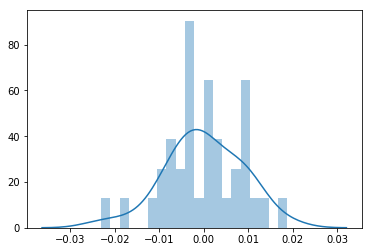

In [328]:
sns.distplot((y_train-y_train_price),bins=20)

In [329]:
y_test = df_camera_mult_test.pop('gmv')
x_test = df_camera_mult_test

In [330]:
x_test = x_test[x_train_lm3.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test

const  CameraBatteryCharger  CameraFilmRolls  Lens  \
25   1.00                  0.95             0.94  0.97   
48   1.00                  0.96             1.00  0.99   
52   1.00                   nan              nan   nan   
37   1.00                  0.99             0.94  0.96   
6    1.00                  0.00             0.00  0.00   
18   1.00                  0.94             0.93  0.97   
20   1.00                  0.95             0.89  0.96   
46   1.00                  0.98             1.00  1.00   
5    1.00                  0.00             0.00  0.00   
31   1.00                  0.94             0.94  0.96   
33   1.00                  0.96             0.94  0.97   
45   1.00                  0.98             0.99  0.98   
35   1.00                  0.99             0.93  0.99   
32   1.00                  1.00             0.95  0.97   
0    1.00                  0.68             0.00  0.70   
11   1.00                  0.94             0.91  0.96   

    adStock_Content Marketing  adStock_SEM  adStock_Other  
25                       1.00         1.00           0.00  
48                       0.86         0.34           0.85  
52                       0.00         0.03           0.00  
37                       0.90         0.40           1.00  
6                        0.08         0.07           0.00  
18                       0.95         0.93           0.00  
20                       0.86         0.64           0.00  
46                       0.99         0.79           0.94  
5                        0.15         0.16           0.00  
31                       0.98         0.49           0.96  
33                       0.97         0.51           0.86  
45                       0.99         0.78           0.94  
35                       0.91         0.42           0.99  
32                       0.97         0.51           0.91  
0                        0.23         0.00           0.00  
11                       0.94         0.51           0.00

In [331]:
y_predicted = lr3.predict(x_test)

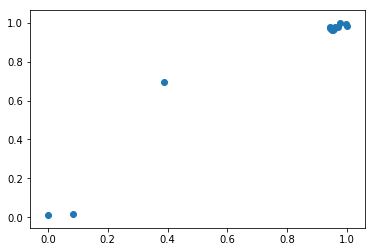

In [332]:
plt.scatter(y_test,y_predicted)

In [333]:
#Elasticity Analysis

df_coeff = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm3, y_train, df_coeff)



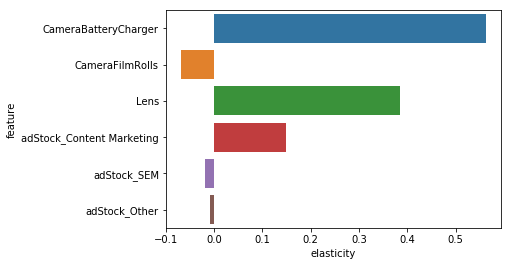

In [334]:
sns.barplot(x='elasticity', y = 'feature', data = elast_data)

### Gaming Accessory

In [335]:
# replacing '0.0' with '0.0000001' and taking log of the dataset to avaoid the nana values for log 0
df_gaming_mul = np.log(final_data_for_gaming_including_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))

In [336]:
df_gaming_mul.fillna(0,axis=1)

week   gmv  sla  product_procurement_sla  discount  NPS  total_holiday  \
0   3.30 10.51 1.15                     1.03     -1.19 4.00           0.00   
1   3.33 14.79 1.69                     1.15     -0.89 4.00         -13.82   
2   3.37 14.62 1.67                     0.97     -0.82 4.00         -13.82   
3   3.40 14.75 1.69                     0.92     -0.95 4.00         -13.82   
4   3.43 14.41 1.74                     0.98     -0.80 4.00         -13.82   
5   3.47  7.74 1.98                     0.81     -0.46 4.09           0.00   
6   3.50  8.49 1.79                     0.92     -0.95 4.09         -13.82   
7   3.53  6.39 0.69                     0.92     -0.68 4.09         -13.82   
8   3.56  7.74 1.79                     1.18     -0.80 4.09         -13.82   
9   3.58 14.56 1.64                     0.99     -0.92 3.85         -13.82   
10  3.61 14.68 1.71                     0.98     -0.94 3.85           0.00   
11  3.64 14.74 1.76                     0.98     -0.90 3.85         -13.82   
12  3.66 14.72 1.78                     0.93     -0.87 3.85         -13.82   
13  3.69 14.68 1.78                     0.96     -0.91 3.82         -13.82   
14  3.71 14.53 1.71                     0.91     -0.97 3.79         -13.82   
15  3.74 15.78 1.65                     1.08     -0.63 3.79           0.00   
16  3.76 14.62 1.81                     0.92     -0.90 3.79         -13.82   
17  3.78 14.82 1.76                     0.76     -0.79 3.80           0.00   
18  3.81 15.04 1.64                     0.86     -0.77 3.85         -13.82   
19  3.83 14.76 1.80                     0.84     -0.85 3.85           0.00   
20  3.85 14.55 1.74                     0.89     -0.85 3.85         -13.82   
21  3.87 14.84 1.77                     0.92     -0.79 3.85         -13.82   
22  3.89 14.89 1.80                     0.90     -0.87 3.83         -13.82   
23  3.91 15.03 1.70                     0.97     -0.79 3.82         -13.82   
24  3.93 14.82 1.86                     0.93     -0.77 3.82         -13.82   
25  3.95 15.26 1.74                     0.94     -0.65 3.82           0.69   
26  3.97 14.97 1.78                     0.91     -0.72 3.84           0.00   
27  3.99 15.03 1.77                     0.91     -0.74 3.85         -13.82   
28  4.01 14.91 1.77                     0.90     -0.79 3.85         -13.82   
29  4.03 15.35 1.78                     0.94     -0.77 3.85         -13.82   
30  4.04 14.90 1.80                     0.96     -0.81 3.85         -13.82   
31  4.06 14.95 1.78                     0.93     -0.79 3.92         -13.82   
32  4.08 14.89 1.73                     0.92     -0.74 3.92           0.00   
33  4.09 15.15 1.70                     0.97     -0.68 3.92           0.00   
34  4.11 14.99 1.79                     0.91     -0.69 3.92         -13.82   
35  4.13 15.07 1.77                     0.88     -0.73 3.90         -13.82   
36  4.14 15.32 1.68                     0.95     -0.74 3.89         -13.82   
37  4.16 14.92 1.75                     0.95     -0.87 3.89           0.00   
38  4.17 14.97 1.79                     0.93     -0.88 3.89         -13.82   
39  4.19 15.07 1.76                     0.91     -0.87 3.92           0.00   
40  4.20 15.11 1.80                     0.93     -0.88 3.95           0.00   
41  4.22 14.91 1.77                     0.92     -0.82 3.95         -13.82   
42  4.23 14.41 1.52                     0.84     -0.80 3.95         -13.82   
43  4.25 15.59 1.85                     0.87     -0.78 3.94         -13.82   
44  4.26 15.07 1.76                     0.86     -0.78 3.86         -13.82   
45  4.28 15.13 1.73                     0.81     -0.70 3.86           0.00   
46  4.29 15.14 1.72                     0.76     -0.68 3.86           0.00   
47  4.30 15.45 1.66                     0.69     -0.73 3.86         -13.82   
48  4.32 15.21 1.70                     0.73     -0.79 3.90         -13.82   
49  4.33 15.07 1.73                     0.77     -0.79 3.92         -13.82   
50  4.34 15.02 1.76       

In [337]:
df_gaming_mul.isnull().any()

week                                False
gmv                                 False
sla                                 False
product_procurement_sla             False
discount                            False
NPS                                 False
total_holiday                       False
is_holiday                          False
total_special_sale_day              False
is_special_sale_day                 False
total_pay_days                      False
is_pay_days                         False
percentageOf_online_transactions     True
CoolingPad                          False
GameControlMount                    False
GamePad                             False
GamingAccessoryKit                  False
GamingAdapter                       False
GamingChargingStation               False
GamingHeadset                       False
GamingKeyboard                      False
GamingMemoryCard                    False
GamingMouse                         False
GamingMousePad                    

In [338]:
df_gaming_mul.drop('percentageOf_online_transactions',axis=1, inplace=True)

In [339]:
df_gaming_mul.isnull().any()

week                         False
gmv                          False
sla                          False
product_procurement_sla      False
discount                     False
NPS                          False
total_holiday                False
is_holiday                   False
total_special_sale_day       False
is_special_sale_day          False
total_pay_days               False
is_pay_days                  False
CoolingPad                   False
GameControlMount             False
GamePad                      False
GamingAccessoryKit           False
GamingAdapter                False
GamingChargingStation        False
GamingHeadset                False
GamingKeyboard               False
GamingMemoryCard             False
GamingMouse                  False
GamingMousePad               False
GamingSpeaker                False
JoystickGamingWheel          False
MotionController             False
TVOutCableAccessory          False
Month                        False
Year                

In [340]:
df_gaming_mul_train, df_gaming_mul_test = train_test_split(df_gaming_mul, train_size=0.7, test_size=0.3, random_state=100)

In [341]:
scaler = MinMaxScaler()

In [342]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_gaming_mul_train[numeric_variables] = scaler.fit_transform(df_gaming_mul_train[numeric_variables])
df_gaming_mul_test[numeric_variables] = scaler.fit_transform(df_gaming_mul_test[numeric_variables])

In [343]:
y_train = df_gaming_mul_train.pop('gmv')
x_train = df_gaming_mul_train

In [344]:
lm = LinearRegression()
lm.fit(x_train, y_train)

#rfe = RFE(lm,20)
#rfe = rfe.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [345]:
rfe = RFE(lm,20)
rfe = rfe.fit(x_train,y_train)

In [346]:
columns_taken = x_train.columns[rfe.support_]

In [347]:
x_train_rfe = x_train[columns_taken]

In [348]:
x_train_lm = sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2497.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.69e-24
Time:                        22:48:39   Log-Likelihood:                 157.32
No. Observations:                  37   AIC:                            -272.6
Df Residuals:                      16   BIC:                            -238.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features             VIF
0                       const 150270257836.85
18   adStock_Online marketing        46732.82
19        adStock_ Affiliates        41448.87
5          GamingAccessoryKit         2170.99
6               GamingAdapter          649.85
11             GamingMousePad          605.50
8              GamingKeyboard          592.78
17  adStock_Content Marketing          511.77
13           MotionController          427.94
10                GamingMouse          343.07
12        JoystickGamingWheel          340.87
7               GamingHeadset          241.44
15                 adStock_TV          200.57
14                       Year          158.70
20              adStock_Radio          158.03
4                     GamePad          116.79
9            GamingMemoryCard           85.92
16        adStock_Sponsorship           34.19
1                         sla           30.70
2                    discount            8.56
3            GameControlMount            1.72

In [349]:
x_train_new = x_train_rfe.drop(['adStock_Content Marketing'],axis=1)

x_train_lm = sm.add_constant(x_train_new)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2599.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.10e-26
Time:                        22:48:39   Log-Likelihood:                 155.99
No. Observations:                  37   AIC:                            -272.0
Df Residuals:                      17   BIC:                            -239.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 149735666036.19
18       adStock_ Affiliates         3732.54
17  adStock_Online marketing         3536.94
5         GamingAccessoryKit         1553.04
6              GamingAdapter          648.93
8             GamingKeyboard          582.88
11            GamingMousePad          479.61
13          MotionController          235.35
10               GamingMouse          225.67
7              GamingHeadset          171.34
14                      Year          158.13
19             adStock_Radio          145.18
12       JoystickGamingWheel          143.12
4                    GamePad          114.29
15                adStock_TV           83.62
9           GamingMemoryCard           80.12
16       adStock_Sponsorship           26.70
1                        sla           22.76
2                   discount            8.40
3           GameControlMount            1.59

In [350]:
x_train_new2 = x_train_new.drop(['adStock_ Affiliates'],axis=1)

x_train_lm = sm.add_constant(x_train_new2)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.74e-23
Time:                        22:48:39   Log-Likelihood:                 136.93
No. Observations:                  37   AIC:                            -235.9
Df Residuals:                      18   BIC:                            -205.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 133701449571.62
5         GamingAccessoryKit         1491.40
6              GamingAdapter          603.04
8             GamingKeyboard          576.45
11            GamingMousePad          421.93
13          MotionController          231.71
10               GamingMouse          221.79
7              GamingHeadset          171.01
14                      Year          141.20
18             adStock_Radio          131.58
12       JoystickGamingWheel          129.32
4                    GamePad          113.21
9           GamingMemoryCard           77.65
17  adStock_Online marketing           50.46
15                adStock_TV           48.60
1                        sla           22.72
16       adStock_Sponsorship           12.90
2                   discount            7.79
3           GameControlMount            1.58

In [351]:
x_train_new3 = x_train_new2.drop(['discount'],axis=1)

x_train_lm = sm.add_constant(x_train_new3)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1146.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.47e-25
Time:                        22:48:39   Log-Likelihood:                 136.74
No. Observations:                  37   AIC:                            -237.5
Df Residuals:                      19   BIC:                            -208.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 107480630224.94
4         GamingAccessoryKit          787.55
5              GamingAdapter          526.61
7             GamingKeyboard          367.82
10            GamingMousePad          346.88
12          MotionController          231.30
11       JoystickGamingWheel          129.32
13                      Year          113.51
17             adStock_Radio          108.79
9                GamingMouse          104.08
3                    GamePad           93.57
6              GamingHeadset           73.00
8           GamingMemoryCard           67.21
16  adStock_Online marketing           50.06
14                adStock_TV           41.39
1                        sla           22.46
15       adStock_Sponsorship           12.23
2           GameControlMount            1.58

In [352]:
x_train_new4 = x_train_new3.drop(['GamingMemoryCard'],axis=1)

x_train_lm = sm.add_constant(x_train_new4)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1281.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.49e-26
Time:                        22:48:39   Log-Likelihood:                 136.73
No. Observations:                  37   AIC:                            -239.5
Df Residuals:                      20   BIC:                            -212.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features            VIF
0                      const 86912715344.63
4         GamingAccessoryKit         610.62
5              GamingAdapter         426.70
9             GamingMousePad         346.51
7             GamingKeyboard         333.83
11          MotionController         224.86
10       JoystickGamingWheel         123.98
8                GamingMouse         103.47
12                      Year          91.79
16             adStock_Radio          87.26
3                    GamePad          79.64
6              GamingHeadset          71.35
15  adStock_Online marketing          45.75
13                adStock_TV          41.38
1                        sla          22.42
14       adStock_Sponsorship          11.67
2           GameControlMount           1.38

In [353]:
x_train_new5 = x_train_new4.drop(['adStock_TV'],axis=1)

x_train_lm = sm.add_constant(x_train_new5)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1426.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.10e-28
Time:                        22:48:39   Log-Likelihood:                 136.61
No. Observations:                  37   AIC:                            -241.2
Df Residuals:                      21   BIC:                            -215.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features            VIF
0                      const 81330581633.45
4         GamingAccessoryKit         609.52
5              GamingAdapter         406.99
7             GamingKeyboard         329.99
9             GamingMousePad         295.11
11          MotionController         218.03
10       JoystickGamingWheel          96.18
8                GamingMouse          91.78
12                      Year          85.89
15             adStock_Radio          85.22
3                    GamePad          78.71
6              GamingHeadset          59.20
1                        sla          22.42
14  adStock_Online marketing          18.76
13       adStock_Sponsorship           9.19
2           GameControlMount           1.38

In [354]:
x_train_new6 = x_train_new5.drop(['GamingMousePad'],axis=1)

x_train_lm = sm.add_constant(x_train_new6)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1588.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.08e-29
Time:                        22:48:39   Log-Likelihood:                 136.47
No. Observations:                  37   AIC:                            -242.9
Df Residuals:                      22   BIC:                            -218.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features            VIF
0                      const 81107212364.74
4         GamingAccessoryKit         475.11
5              GamingAdapter         395.41
7             GamingKeyboard         242.97
10          MotionController         210.38
9        JoystickGamingWheel          92.66
8                GamingMouse          87.83
11                      Year          85.66
14             adStock_Radio          85.16
3                    GamePad          78.33
6              GamingHeadset          55.23
1                        sla          22.42
13  adStock_Online marketing          18.43
12       adStock_Sponsorship           8.91
2           GameControlMount           1.35

In [355]:
x_train_new7 = x_train_new6.drop(['MotionController'],axis=1)

x_train_lm = sm.add_constant(x_train_new7)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1723.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.81e-31
Time:                        22:48:39   Log-Likelihood:                 135.78
No. Observations:                  37   AIC:                            -243.6
Df Residuals:                      23   BIC:                            -221.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features            VIF
0                      const 81099909553.51
4         GamingAccessoryKit         443.98
5              GamingAdapter         392.09
7             GamingKeyboard         231.12
8                GamingMouse          87.58
9        JoystickGamingWheel          87.32
10                      Year          85.65
13             adStock_Radio          84.21
3                    GamePad          76.92
6              GamingHeadset          55.17
1                        sla          22.42
12  adStock_Online marketing          17.09
11       adStock_Sponsorship           8.89
2           GameControlMount           1.32

In [356]:
x_train_new8 = x_train_new7.drop(['GamingAccessoryKit'],axis=1)

x_train_lm = sm.add_constant(x_train_new8)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1855.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.50e-32
Time:                        22:48:40   Log-Likelihood:                 134.89
No. Observations:                  37   AIC:                            -243.8
Df Residuals:                      24   BIC:                            -222.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features            VIF
0                      const 81024767057.74
4              GamingAdapter         266.97
6             GamingKeyboard         228.75
9                       Year          85.57
12             adStock_Radio          83.32
7                GamingMouse          82.93
8        JoystickGamingWheel          73.70
3                    GamePad          72.33
5              GamingHeadset          55.06
1                        sla          21.39
11  adStock_Online marketing          16.72
10       adStock_Sponsorship           8.56
2           GameControlMount           1.29

In [357]:
x_train_new9 = x_train_new8.drop(['Year'],axis=1)

x_train_lm = sm.add_constant(x_train_new9)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2017.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.47e-34
Time:                        22:48:40   Log-Likelihood:                 134.07
No. Observations:                  37   AIC:                            -244.1
Df Residuals:                      25   BIC:                            -224.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const 1201.63
4              GamingAdapter  266.97
6             GamingKeyboard  208.38
7                GamingMouse   77.94
8        JoystickGamingWheel   69.62
5              GamingHeadset   54.92
3                    GamePad   52.41
1                        sla   20.15
10  adStock_Online marketing   16.72
9        adStock_Sponsorship    8.33
11             adStock_Radio    3.52
2           GameControlMount    1.28

In [358]:
x_train_new10 = x_train_new9.drop(['JoystickGamingWheel'],axis=1)

x_train_lm = sm.add_constant(x_train_new10)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2124.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.22e-35
Time:                        22:48:40   Log-Likelihood:                 132.54
No. Observations:                  37   AIC:                            -243.1
Df Residuals:                      26   BIC:                            -225.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features     VIF
0                      const 1194.30
4              GamingAdapter  216.20
6             GamingKeyboard  206.76
7                GamingMouse   77.47
5              GamingHeadset   54.83
3                    GamePad   52.37
1                        sla   19.73
9   adStock_Online marketing   15.37
8        adStock_Sponsorship    6.39
10             adStock_Radio    2.21
2           GameControlMount    1.26

In [359]:
x_train_new11 = x_train_new10.drop(['GamingAdapter'],axis=1)

x_train_lm = sm.add_constant(x_train_new11)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1961.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.27e-35
Time:                        22:48:40   Log-Likelihood:                 128.41
No. Observations:                  37   AIC:                            -236.8
Df Residuals:                      27   BIC:                            -220.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const 918.48
5            GamingKeyboard 136.27
6               GamingMouse  60.04
4             GamingHeadset  54.71
3                   GamePad  52.36
8  adStock_Online marketing  15.36
1                       sla  13.14
7       adStock_Sponsorship   5.63
9             adStock_Radio   2.15
2          GameControlMount   1.16

In [360]:
x_train_new12 = x_train_new11.drop(['GameControlMount'],axis=1)

x_train_lm = sm.add_constant(x_train_new12)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2210.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.13e-37
Time:                        22:48:40   Log-Likelihood:                 127.78
No. Observations:                  37   AIC:                            -237.6
Df Residuals:                      28   BIC:                            -223.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const 886.86
4            GamingKeyboard 134.40
5               GamingMouse  58.08
3             GamingHeadset  54.67
2                   GamePad  52.30
7  adStock_Online marketing  15.28
1                       sla  11.97
6       adStock_Sponsorship   5.60
8             adStock_Radio   2.14

In [361]:
x_train_new13 = x_train_new12.drop(['sla'],axis=1)

x_train_lm = sm.add_constant(x_train_new13)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2509.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.41e-38
Time:                        22:48:40   Log-Likelihood:                 127.01
No. Observations:                  37   AIC:                            -238.0
Df Residuals:                      29   BIC:                            -225.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const 718.83
3            GamingKeyboard 128.88
1                   GamePad  51.94
2             GamingHeadset  50.66
4               GamingMouse  47.19
6  adStock_Online marketing  14.02
5       adStock_Sponsorship   5.30
7             adStock_Radio   1.95

In [362]:
x_train_new14 = x_train_new13.drop(['GamingKeyboard'],axis=1)

x_train_lm = sm.add_constant(x_train_new14)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2796.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.05e-40
Time:                        22:48:40   Log-Likelihood:                 125.54
No. Observations:                  37   AIC:                            -237.1
Df Residuals:                      30   BIC:                            -225.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                     const 218.61
1                   GamePad  43.40
2             GamingHeadset  23.27
3               GamingMouse  13.06
5  adStock_Online marketing   7.93
4       adStock_Sponsorship   5.04
6             adStock_Radio   1.77

In [363]:
x_train_new15 = x_train_new14.drop(['GamePad'],axis=1)

x_train_lm = sm.add_constant(x_train_new15)
lr = sm.OLS(y_train,x_train_lm).fit()

lr.params
print(lr.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm .values, i) for i in range(x_train_lm.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1321.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.84e-35
Time:                        22:48:40   Log-Likelihood:                 107.74
No. Observations:                  37   AIC:                            -203.5
Df Residuals:                      31   BIC:                            -193.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const 50.61
4  adStock_Online marketing  6.36
3       adStock_Sponsorship  4.67
1             GamingHeadset  2.10
2               GamingMouse  1.94
5             adStock_Radio  1.77

In [364]:
x_train_new16 = x_train_new15.drop(['adStock_Online marketing'],axis=1)

x_train_lm2 = sm.add_constant(x_train_new16)
lr2 = sm.OLS(y_train,x_train_lm2).fit()

lr2.params
print(lr2.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm2.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm2 .values, i) for i in range(x_train_lm2.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     986.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.22e-33
Time:                        22:48:40   Log-Likelihood:                 97.677
No. Observations:                  37   AIC:                            -185.4
Df Residuals:                      32   BIC:                            -177.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3518    

Features   VIF
0                const 48.00
3  adStock_Sponsorship  2.07
1        GamingHeadset  1.93
2          GamingMouse  1.83
4        adStock_Radio  1.17

In [365]:
x_train_new17 = x_train_new16.drop(['adStock_Sponsorship'],axis=1)

x_train_lm3 = sm.add_constant(x_train_new17)
lr3 = sm.OLS(y_train,x_train_lm3).fit()

lr3.params
print(lr3.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm3.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm3 .values, i) for i in range(x_train_lm3.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1330.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.78e-34
Time:                        22:48:40   Log-Likelihood:                 97.319
No. Observations:                  37   AIC:                            -186.6
Df Residuals:                      33   BIC:                            -180.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3459      0.020    -17.563

Features   VIF
0          const 42.10
1  GamingHeadset  1.54
2    GamingMouse  1.48
3  adStock_Radio  1.09

In [366]:
x_train_new18 = x_train_new17.drop(['adStock_Radio'],axis=1)

x_train_lm4 = sm.add_constant(x_train_new18)
lr4 = sm.OLS(y_train,x_train_lm4).fit()

lr4.params
print(lr4.summary())

var_inflation_factor = pd.DataFrame()
var_inflation_factor['Features'] = x_train_lm4.columns
var_inflation_factor['VIF'] = [variance_inflation_factor(x_train_lm4 .values, i) for i in range(x_train_lm4.shape[1])]
var_inflation_factor['VIF'] = round(var_inflation_factor['VIF'], 2)
var_inflation_factor = var_inflation_factor.sort_values(by = "VIF", ascending = False)
var_inflation_factor

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2015.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.81e-36
Time:                        22:48:40   Log-Likelihood:                 96.960
No. Observations:                  37   AIC:                            -187.9
Df Residuals:                      34   BIC:                            -183.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3480      0.019    -17.920

Features   VIF
0          const 41.36
1  GamingHeadset  1.48
2    GamingMouse  1.48

In [367]:
df_coeff = pd.DataFrame(pd.DataFrame(lr4.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm4, y_train, df_coeff)

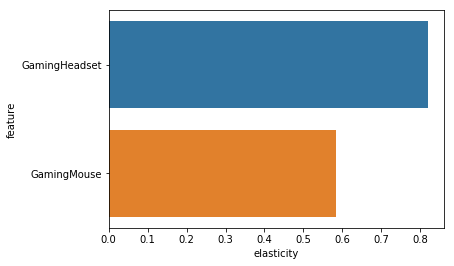

In [368]:
sns.barplot(x='elasticity', y= 'feature', data = elast_data)

In [369]:
y_train_pr = lr4.predict(x_train_lm4)

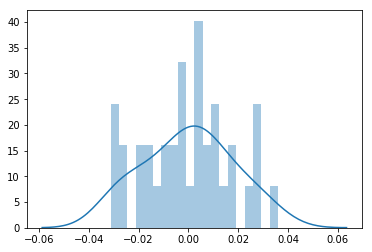

In [370]:
sns.distplot((y_train-y_train_pr),bins=20)

In [371]:
y_test = df_gaming_mul_test.pop('gmv')
x_test = df_gaming_mul_test

In [372]:
x_test = x_test[x_train_lm4.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)

In [373]:
y_pred = lr4.predict(x_test)

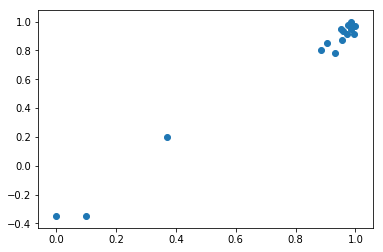

In [374]:
plt.scatter(y_test, y_pred)

In [375]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.02521386863921237


### Multiplicative Model - Home Audio

In [376]:
final_data_for_home_audio_including_adstock

week         gmv   units  sla  product_procurement_sla  product_mrp  \
0     27   101627.00   37.00 2.86                     3.57      4626.08   
1     28  4485348.13 2048.00 7.53                     2.86      3462.94   
2     29  5290726.00 2401.00 7.08                     2.76      3592.07   
3     30  4541341.00 2149.00 7.10                     2.84      3541.07   
4     31  3370335.00 1545.00 7.27                     2.72      3588.78   
5     32     2599.00    1.00 9.00                     2.00      3099.00   
6     36  3740010.00 1781.00 5.56                     2.79      3739.34   
7     37  4032024.00 1994.00 5.51                     2.88      3628.74   
8     38  3617341.00 1810.00 6.19                     2.68      3394.06   
9     39  4128524.00 2195.00 6.31                     2.67      3174.06   
10    40  4018011.00 2065.00 6.33                     2.52      3301.39   
11    41  3569143.00 1827.00 5.94                     2.60      3242.19   
12    42 19177390.00 7956.00 5.94                     2.35      4688.20   
13    43  5676111.00 2458.00 6.58                     2.65      4003.87   
14    44  6108498.00 2862.00 6.52                     2.52      3685.31   
15    45  7320846.00 3335.00 5.04                     2.78      4576.05   
16    46  5076162.80 2407.00 6.43                     2.47      3799.51   
17    47  3719649.50 1747.00 5.92                     2.66      3837.53   
18    48  3808963.50 1873.00 6.42                     2.52      3376.71   
19    49  4316845.00 2063.00 5.75                     2.79      4009.65   
20    50  6814555.42 3072.00 4.96                     2.97      4799.89   
21    51  4812789.00 2222.00 5.92                     2.81      4095.55   
22    52  6482399.25 2848.00 5.21                     2.55      4488.55   
23    53  5059789.25 2369.00 5.88                     2.48      3698.92   
24    54  6996240.00 3283.00 4.79                     2.86      4500.61   
25    55  4862091.00 2213.00 5.46                     2.86      4191.59   
26    56  5496892.34 2618.00 5.75                     2.68      3993.01   
27    57  4691152.00 2166.00 5.68                     2.68      3981.98   
28    58  6902225.00 3190.00 4.87                     2.80      4320.85   
29    59  4669168.00 2248.00 5.31                     2.81      3851.26   
30    60  6547746.36 3067.00 5.07                     2.61      4175.25   
31    61  5223642.00 2434.00 5.69                     2.61      3789.37   
32    62  4781039.00 2285.00 5.78                     2.69      3521.69   
33    63  6644110.00 3047.00 5.28                     2.68      4034.01   
34    64  4629455.00 2192.00 5.33                     2.58      3592.25   
35    65  3544522.00 1831.00 5.62                     2.61      3258.28   
36    66  3546570.00 1723.00 5.40                     2.70      3493.61   
37    67  3356788.00 1605.00 5.79                     2.71      3451.85   
38    68  2826330.00 1306.00 5.61                     2.60      3620.38   
39    69  1758615.00  732.00 4.58                     2.78      4097.94   
40    70  5837458.00 2849.00 5.93                     2.66      3533.93   
41    71  3657196.00 1773.00 5.13                     2.53      3478.97   
42    72  3591861.00 1650.00 5.05                     2.61      3700.55   
43    73  3252744.00 1466.00 5.02                     2.65      3705.45   
44    74  3800323.00 1678.00 4.31                     2.54      3842.40   
45    75  3429091.00 1514.00 5.00                     2.64      3705.96   
46    76  3533585.00 1633.00 5.56                     2.59      3461.65   
47    77  3564818.00 1570.00 4.95                     2.71      3535.05   
48    78  3156425.00 1307.00 4.19                     2.54      3876.69   
49    79  1529929.00  669.00 3.95                     2.56      3731.85   
50    33        0.00    0.00 0.00                     0.00         0.00   
51    34        0.00    0.00 0.00                     0.00         0.00   
52    35        0.00    0.00 

In [377]:
final_data_for_camera_including_adstock.replace(0,0.000001)

week         gmv    units   sla  product_procurement_sla  product_mrp  \
0     27    15375.00    25.00  2.28                     2.96      1456.84   
1     28  3800540.00  2916.00  7.06                     2.72      2452.50   
2     29  4274721.00  3093.00  6.40                     2.74      2494.09   
3     30  4298848.00  3084.00  6.42                     2.78      2537.26   
4     31  2741073.00  2059.00  6.37                     2.77      2407.93   
5     32      699.00     1.00  5.00                     4.00      1450.00   
6     33      299.00     1.00  6.00                     1.00      1990.00   
7     35     1190.00     3.00 10.33                     2.00       628.00   
8     36  3667923.00  2981.00  6.58                     2.82      2307.25   
9     37  4806012.00  3532.00  6.43                     2.92      2575.93   
10    38  4589627.00  3214.00  6.66                     2.85      2634.19   
11    39  4405967.00  3268.00  6.26                     3.05      2636.22   
12    40  4811662.00  4751.00  5.67                     2.55      2301.88   
13    41  3899772.00  3185.00  6.26                     2.69      2320.42   
14    42 12803139.98 10708.00  6.35                     3.03      2430.03   
15    43  4353114.11  3328.00  7.00                     2.75      2353.05   
16    44  5145921.50  4622.00  6.54                     2.94      2118.94   
17    45  5785635.00  4846.00  6.20                     2.86      2268.99   
18    46  4781003.00  3901.00  6.68                     2.84      2341.02   
19    47  3872810.00  3038.00  6.16                     2.80      2456.85   
20    48  4939238.00  3208.00  6.47                     2.89      2765.08   
21    49  5389940.00  3489.00  6.32                     2.85      2771.30   
22    50  5960395.00  4122.00  6.00                     2.69      2677.65   
23    51  4833541.00  3356.00  6.73                     2.78      2522.93   
24    52  6799221.00  4444.00  6.46                     2.83      2757.10   
25    53  5106460.00  4105.00  6.17                     2.75      2216.22   
26    54  4928583.00  5252.00  5.90                     2.83      1790.09   
27    55  4239998.00  3759.00  6.62                     2.63      2072.49   
28    56  6806825.00  5085.00  6.40                     2.65      2340.42   
29    57  4852203.00  3485.00  6.70                     2.59      2393.48   
30    58  5208993.00  5452.00  6.39                     2.67      1888.80   
31    59  4596774.00  3870.00  6.37                     2.59      2168.32   
32    60  6381315.00  6345.00  6.33                     2.67      1893.62   
33    61  5264659.00  5694.00  6.33                     2.32      1889.85   
34    62  4900865.00  5183.00  6.15                     2.54      1742.02   
35    63  7653069.00  5962.00  6.10                     2.53      2431.78   
36    64  4436404.00  4566.00  6.06                     2.39      1987.39   
37    65  4484037.00  4818.00  5.81                     2.45      1774.69   
38    66  5147705.00  5447.00  5.69                     2.42      1792.52   
39    67  5325687.00  5440.00  5.97                     2.38      2002.68   
40    68  4278388.00  4411.00  5.78                     2.42      1897.39   
41    69  2557952.00  2463.00  4.79                     2.51      2095.44   
42    70  8901508.00  8864.00  6.40                     2.50      2004.38   
43    71  5585309.00  6003.00  5.80                     2.34      1928.41   
44    72  5412700.00  5798.00  5.71                     2.39      1946.55   
45    73  5885712.00  5251.00  5.50                     2.45      2097.54   
46    74  7977006.00  6564.00  5.58                     2.38      2320.37   
47    75  4817288.00  5306.00  5.92                     2.35      1812.92   
48    76  4852681.00  5573.00  5.76                     2.34      1814.67   
49    77  4924772.00  4675.00  5.71                     2.51      1988.52   
50    78  3927525.00  3381.00  6.11                     2.54      2079.68   


In [378]:
df_home_mult = np.log(final_data_for_home_audio_including_adstock.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1))


In [379]:
df_home_mult_train, df_home_mult_test = train_test_split(df_home_mult, train_size = 0.7, test_size = 0.3,random_state=100)

In [380]:
scaler = MinMaxScaler()

In [381]:
numeric_columns=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_home_mult_train[numeric_columns] = scaler.fit_transform(df_home_mult_train[numeric_columns])
df_home_mult_test[numeric_columns] = scaler.fit_transform(df_home_mult_test[numeric_columns])

In [382]:
y_train = df_home_mult_train.pop('gmv')
x_train = df_home_mult_train


In [383]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(x_train, y_train)


In [384]:
columns_taken = x_train.columns[rfe.support_]

In [385]:
columns_taken

Index(['sla', 'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'BoomBox', 'Dock', 'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker',
       'VoiceRecorder', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [386]:
x_train_rfe_df = x_train[columns_taken]

In [387]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.621e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.10e-35
Time:                        22:48:42   Log-Likelihood:                 213.72
No. Observations:                  37   AIC:                            -385.4
Df Residuals:                      16   BIC:                            -351.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 451647157134.88
4                        NPS        33259.73
2    product_procurement_sla        18473.93
1                        sla        11416.92
3                   discount        11039.80
17       adStock_ Affiliates         6636.06
16  adStock_Online marketing         6634.44
19             adStock_Radio         2853.97
20             adStock_Other         2300.26
8                    FMRadio         1970.91
10          HomeAudioSpeaker         1695.38
11             VoiceRecorder          709.78
6                    BoomBox          694.69
12                      Year          477.02
9                 HiFiSystem          440.36
7                       Dock          136.41
13                adStock_TV          113.30
18               adStock_SEM           73.40
14           adStock_Digital           57.86
15       adStock_Sponsorship           26.28
5              total_holiday            3.17

In [388]:
x_train_lm_new = x_train_lm.drop(['HiFiSystem'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.400e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.97e-38
Time:                        22:48:42   Log-Likelihood:                 213.70
No. Observations:                  37   AIC:                            -387.4
Df Residuals:                      17   BIC:                            -355.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 446608451742.41
4                        NPS        33026.65
2    product_procurement_sla        17848.55
1                        sla        11391.20
3                   discount        10889.30
16       adStock_ Affiliates         5897.13
15  adStock_Online marketing         5842.67
18             adStock_Radio         2808.93
19             adStock_Other         2211.41
8                    FMRadio         1933.44
9           HomeAudioSpeaker         1694.14
10             VoiceRecorder          693.07
6                    BoomBox          647.03
11                      Year          471.69
12                adStock_TV          109.18
7                       Dock          103.19
17               adStock_SEM           62.22
13           adStock_Digital           48.25
14       adStock_Sponsorship           23.31
5              total_holiday            3.13

In [389]:
x_train_lm_new2 = x_train_lm_new.drop(['VoiceRecorder'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new2)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.198e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.45e-40
Time:                        22:48:42   Log-Likelihood:                 213.54
No. Observations:                  37   AIC:                            -389.1
Df Residuals:                      18   BIC:                            -358.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 325698761697.38
4                        NPS        33002.10
2    product_procurement_sla        14019.76
1                        sla        10593.86
3                   discount         9900.02
14  adStock_Online marketing         5545.13
15       adStock_ Affiliates         5409.15
17             adStock_Radio         2451.77
18             adStock_Other         2124.19
9           HomeAudioSpeaker         1594.39
8                    FMRadio         1092.63
6                    BoomBox          514.66
10                      Year          343.99
11                adStock_TV          104.68
7                       Dock          100.00
16               adStock_SEM           39.50
12           adStock_Digital           25.89
13       adStock_Sponsorship           23.19
5              total_holiday            2.35

In [390]:
x_train_lm_new3 = x_train_lm_new2.drop(['BoomBox'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new3)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.399e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.07e-42
Time:                        22:48:42   Log-Likelihood:                 211.93
No. Observations:                  37   AIC:                            -387.9
Df Residuals:                      19   BIC:                            -358.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 324981932989.64
4                        NPS        28393.57
2    product_procurement_sla        14000.16
3                   discount         8837.96
1                        sla         8757.68
13  adStock_Online marketing         3971.99
14       adStock_ Affiliates         3780.21
16             adStock_Radio         2302.27
17             adStock_Other         2027.15
8           HomeAudioSpeaker         1538.71
7                    FMRadio          767.15
9                       Year          343.23
10                adStock_TV          103.52
6                       Dock           99.85
15               adStock_SEM           37.67
11           adStock_Digital           25.02
12       adStock_Sponsorship           21.97
5              total_holiday            2.30

In [391]:
x_train_lm_new4 = x_train_lm_new3.drop(['Dock'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new4)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.949e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.50e-45
Time:                        22:48:42   Log-Likelihood:                 211.03
No. Observations:                  37   AIC:                            -388.1
Df Residuals:                      20   BIC:                            -360.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 309664085493.21
4                        NPS        27853.12
2    product_procurement_sla        13960.27
3                   discount         8799.57
1                        sla         8167.72
12  adStock_Online marketing         3817.70
13       adStock_ Affiliates         3627.93
15             adStock_Radio         2031.99
16             adStock_Other         1883.23
7           HomeAudioSpeaker         1248.69
6                    FMRadio          750.55
8                       Year          327.05
9                 adStock_TV          101.28
14               adStock_SEM           36.87
10           adStock_Digital           25.00
11       adStock_Sponsorship           21.26
5              total_holiday            1.84

In [392]:
x_train_lm_new5 = x_train_lm_new4.drop(['adStock_TV'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new5)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.465e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.08e-47
Time:                        22:48:42   Log-Likelihood:                 209.97
No. Observations:                  37   AIC:                            -387.9
Df Residuals:                      21   BIC:                            -362.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features             VIF
0                      const 308465727902.09
4                        NPS        25094.02
2    product_procurement_sla        13783.76
3                   discount         8799.55
1                        sla         6952.47
11  adStock_Online marketing         3805.31
12       adStock_ Affiliates         3459.75
14             adStock_Radio         1324.81
15             adStock_Other         1224.67
7           HomeAudioSpeaker         1161.51
6                    FMRadio          728.33
8                       Year          325.78
13               adStock_SEM           28.29
9            adStock_Digital           22.10
10       adStock_Sponsorship           15.91
5              total_holiday            1.61

In [393]:
x_train_lm_new6 = x_train_lm_new5.drop(['adStock_Online marketing'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new6)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.003e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.72e-49
Time:                        22:48:42   Log-Likelihood:                 208.91
No. Observations:                  37   AIC:                            -387.8
Df Residuals:                      22   BIC:                            -363.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                     const 308402357554.65
4                       NPS        24327.37
2   product_procurement_sla        13082.78
3                  discount         8782.51
1                       sla         6934.84
7          HomeAudioSpeaker         1143.68
13            adStock_Radio          867.91
14            adStock_Other          800.11
6                   FMRadio          720.74
8                      Year          325.72
12              adStock_SEM           28.07
9           adStock_Digital           21.82
11      adStock_ Affiliates           15.47
10      adStock_Sponsorship            7.77
5             total_holiday            1.57

In [394]:
x_train_lm_new7 = x_train_lm_new6.drop(['adStock_Sponsorship'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new7)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.089e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.61e-52
Time:                        22:48:42   Log-Likelihood:                 208.23
No. Observations:                  37   AIC:                            -388.5
Df Residuals:                      23   BIC:                            -365.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                     const 275180228972.90
4                       NPS        24311.06
2   product_procurement_sla        12247.50
3                  discount         8424.60
1                       sla         6478.84
7          HomeAudioSpeaker         1142.87
13            adStock_Other          791.27
12            adStock_Radio          773.22
6                   FMRadio          644.70
8                      Year          290.63
11              adStock_SEM           19.19
9           adStock_Digital           17.78
10      adStock_ Affiliates           14.93
5             total_holiday            1.41

In [395]:
x_train_lm_new8 = x_train_lm_new7.drop(['sla'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new8)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.175e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.65e-54
Time:                        22:48:42   Log-Likelihood:                 207.38
No. Observations:                  37   AIC:                            -388.8
Df Residuals:                      24   BIC:                            -367.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                     const 173964756928.71
1   product_procurement_sla        11970.99
3                       NPS         9900.84
2                  discount         7448.23
6          HomeAudioSpeaker         1098.26
11            adStock_Radio          743.59
12            adStock_Other          592.23
5                   FMRadio          420.89
7                      Year          183.73
8           adStock_Digital           16.79
10              adStock_SEM           16.43
9       adStock_ Affiliates           14.92
4             total_holiday            1.40

In [396]:
x_train_lm_new9 = x_train_lm_new8.drop(['discount'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new9)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.224e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.88e-56
Time:                        22:48:42   Log-Likelihood:                 205.77
No. Observations:                  37   AIC:                            -387.5
Df Residuals:                      25   BIC:                            -368.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                     const 171418769716.26
2                       NPS         9796.02
1   product_procurement_sla         8603.59
10            adStock_Radio          707.42
11            adStock_Other          575.55
5          HomeAudioSpeaker          421.61
4                   FMRadio          333.26
6                      Year          181.05
9               adStock_SEM           15.73
7           adStock_Digital           15.16
8       adStock_ Affiliates           11.70
3             total_holiday            1.38

In [397]:
x_train_lm_new10 = x_train_lm_new9.drop(['NPS'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new10)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.314e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.70e-58
Time:                        22:48:42   Log-Likelihood:                 204.59
No. Observations:                  37   AIC:                            -387.2
Df Residuals:                      26   BIC:                            -369.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                     const 115298053721.04
9             adStock_Radio          636.40
10            adStock_Other          573.06
1   product_procurement_sla          404.46
4          HomeAudioSpeaker          391.91
3                   FMRadio          319.00
5                      Year          121.77
8               adStock_SEM           14.29
6           adStock_Digital           13.92
7       adStock_ Affiliates            7.89
2             total_holiday            1.26

In [398]:
x_train_lm_new11 = x_train_lm_new10.drop(['adStock_Other'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new11)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.386e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.40e-60
Time:                        22:48:42   Log-Likelihood:                 202.93
No. Observations:                  37   AIC:                            -385.9
Df Residuals:                      27   BIC:                            -369.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                    const 113754552919.78
1  product_procurement_sla          399.90
4         HomeAudioSpeaker          385.22
3                  FMRadio          318.98
9            adStock_Radio          121.00
5                     Year          120.14
6          adStock_Digital           10.14
8              adStock_SEM            9.82
7      adStock_ Affiliates            6.19
2            total_holiday            1.26

In [399]:
x_train_lm_new12 = x_train_lm_new11.drop(['total_holiday'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new12)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.463e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.36e-62
Time:                        22:48:42   Log-Likelihood:                 201.08
No. Observations:                  37   AIC:                            -384.2
Df Residuals:                      28   BIC:                            -369.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

Features             VIF
0                    const 113737315857.98
1  product_procurement_sla          388.32
3         HomeAudioSpeaker          379.06
2                  FMRadio          318.30
8            adStock_Radio          120.99
4                     Year          120.13
5          adStock_Digital            9.91
7              adStock_SEM            9.52
6      adStock_ Affiliates            5.80

In [400]:
x_train_lm_new13 = x_train_lm_new12.drop(['product_procurement_sla'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new13)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.948e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.80e-51
Time:                        22:48:42   Log-Likelihood:                 160.66
No. Observations:                  37   AIC:                            -305.3
Df Residuals:                      29   BIC:                            -292.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1152.9216    

Features            VIF
0                const 52682614330.74
2     HomeAudioSpeaker         250.55
1              FMRadio         242.66
7        adStock_Radio          56.31
3                 Year          55.64
6          adStock_SEM           8.96
4      adStock_Digital           6.99
5  adStock_ Affiliates           5.40

In [401]:
x_train_lm_new14 = x_train_lm_new13.drop(['HomeAudioSpeaker'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new14)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1938.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.95e-37
Time:                        22:48:42   Log-Likelihood:                 114.53
No. Observations:                  37   AIC:                            -215.1
Df Residuals:                      30   BIC:                            -203.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1228.6942    

Features            VIF
0                const 52630282952.31
6        adStock_Radio          56.17
2                 Year          55.59
5          adStock_SEM           8.95
3      adStock_Digital           6.94
4  adStock_ Affiliates           5.37
1              FMRadio           2.07

In [402]:
x_train_lm_new15 = x_train_lm_new14.drop(['adStock_ Affiliates'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new15)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2388.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.13e-39
Time:                        22:48:42   Log-Likelihood:                 114.41
No. Observations:                  37   AIC:                            -216.8
Df Residuals:                      31   BIC:                            -207.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1170.2272    432.888     

Features            VIF
0            const 48140067848.58
5    adStock_Radio          53.91
2             Year          50.84
3  adStock_Digital           5.12
4      adStock_SEM           4.23
1          FMRadio           1.37

In [403]:
x_train_lm_new16 = x_train_lm_new15.drop(['adStock_Digital'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new16)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2995.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.09e-40
Time:                        22:48:42   Log-Likelihood:                 113.89
No. Observations:                  37   AIC:                            -217.8
Df Residuals:                      32   BIC:                            -209.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1043.6778    410.769     -2.541

Features            VIF
0          const 43500220972.28
2           Year          45.94
4  adStock_Radio          44.47
3    adStock_SEM           1.53
1        FMRadio           1.33

In [404]:
x_train_lm_new17 = x_train_lm_new16.drop(['adStock_SEM'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new17)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4068.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.90e-42
Time:                        22:48:42   Log-Likelihood:                 113.67
No. Observations:                  37   AIC:                            -219.3
Df Residuals:                      33   BIC:                            -212.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -975.4881    392.569     -2.485

Features            VIF
0          const 40471790140.60
3  adStock_Radio          42.83
2           Year          42.74
1        FMRadio           1.03

In [405]:
x_train_lm_new18 = x_train_lm_new17.drop(['adStock_Radio'],axis=1)

x_train_lm = sm.add_constant(x_train_lm_new18)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5663.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.24e-43
Time:                        22:48:42   Log-Likelihood:                 111.74
No. Observations:                  37   AIC:                            -217.5
Df Residuals:                      34   BIC:                            -212.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -237.3299     63.215     -3.754      0.0

Features          VIF
0    const 974290026.84
1  FMRadio         1.03
2     Year         1.03

In [406]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
score = cross_val_score(lm,x_train_lm,y_train,scoring = 'r2',cv=10)
-score.mean()

0.928256841920945

In [407]:
y_train_pr = lr.predict(x_train_lm)

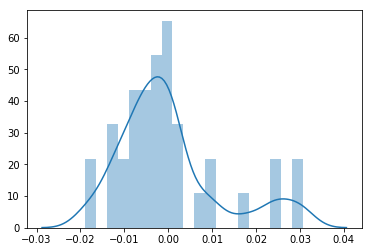

In [408]:
sns.distplot((y_train-y_train_pr), bins =20)

In [409]:
y_test = df_home_mult_test.pop('gmv')
x_test = df_home_mult_test

In [410]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test

const  FMRadio  Year
25   1.00     0.98  7.61
48   1.00     0.94  7.61
52   1.00     0.00  7.61
37   1.00     0.98  7.61
6    1.00     0.99  7.61
18   1.00     0.99  7.61
20   1.00     0.99  7.61
46   1.00     0.99  7.61
5    1.00     0.00  7.61
31   1.00     0.99  7.61
33   1.00     1.00  7.61
45   1.00     0.97  7.61
35   1.00     0.99  7.61
32   1.00     0.99  7.61
0    1.00     0.72  7.61
11   1.00     1.00  7.61

In [411]:
y_pred = lr.predict(x_test)

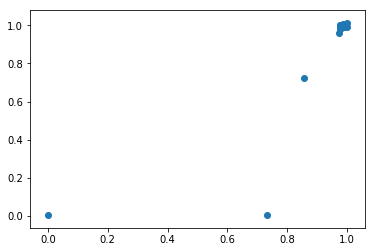

In [412]:
plt.scatter(y_test, y_pred)

In [413]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.03471221071507782


In [414]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


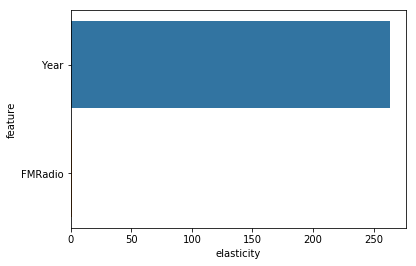

In [415]:
sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))


## Koyck Model

In [416]:
#Function to build koyck model

def getKoyck(df):
    df['gmv_lag'] = df['gmv'].shift(1)
    return df.fillna(0)

### Camera Accessory - Koyck Model

In [417]:
df_camera_koyck = getKoyck(final_data_for_camera_including_adstock)
df_camera_koyck

week         gmv    units   sla  product_procurement_sla  product_mrp  \
0     27    15375.00    25.00  2.28                     2.96      1456.84   
1     28  3800540.00  2916.00  7.06                     2.72      2452.50   
2     29  4274721.00  3093.00  6.40                     2.74      2494.09   
3     30  4298848.00  3084.00  6.42                     2.78      2537.26   
4     31  2741073.00  2059.00  6.37                     2.77      2407.93   
5     32      699.00     1.00  5.00                     4.00      1450.00   
6     33      299.00     1.00  6.00                     1.00      1990.00   
7     35     1190.00     3.00 10.33                     2.00       628.00   
8     36  3667923.00  2981.00  6.58                     2.82      2307.25   
9     37  4806012.00  3532.00  6.43                     2.92      2575.93   
10    38  4589627.00  3214.00  6.66                     2.85      2634.19   
11    39  4405967.00  3268.00  6.26                     3.05      2636.22   
12    40  4811662.00  4751.00  5.67                     2.55      2301.88   
13    41  3899772.00  3185.00  6.26                     2.69      2320.42   
14    42 12803139.98 10708.00  6.35                     3.03      2430.03   
15    43  4353114.11  3328.00  7.00                     2.75      2353.05   
16    44  5145921.50  4622.00  6.54                     2.94      2118.94   
17    45  5785635.00  4846.00  6.20                     2.86      2268.99   
18    46  4781003.00  3901.00  6.68                     2.84      2341.02   
19    47  3872810.00  3038.00  6.16                     2.80      2456.85   
20    48  4939238.00  3208.00  6.47                     2.89      2765.08   
21    49  5389940.00  3489.00  6.32                     2.85      2771.30   
22    50  5960395.00  4122.00  6.00                     2.69      2677.65   
23    51  4833541.00  3356.00  6.73                     2.78      2522.93   
24    52  6799221.00  4444.00  6.46                     2.83      2757.10   
25    53  5106460.00  4105.00  6.17                     2.75      2216.22   
26    54  4928583.00  5252.00  5.90                     2.83      1790.09   
27    55  4239998.00  3759.00  6.62                     2.63      2072.49   
28    56  6806825.00  5085.00  6.40                     2.65      2340.42   
29    57  4852203.00  3485.00  6.70                     2.59      2393.48   
30    58  5208993.00  5452.00  6.39                     2.67      1888.80   
31    59  4596774.00  3870.00  6.37                     2.59      2168.32   
32    60  6381315.00  6345.00  6.33                     2.67      1893.62   
33    61  5264659.00  5694.00  6.33                     2.32      1889.85   
34    62  4900865.00  5183.00  6.15                     2.54      1742.02   
35    63  7653069.00  5962.00  6.10                     2.53      2431.78   
36    64  4436404.00  4566.00  6.06                     2.39      1987.39   
37    65  4484037.00  4818.00  5.81                     2.45      1774.69   
38    66  5147705.00  5447.00  5.69                     2.42      1792.52   
39    67  5325687.00  5440.00  5.97                     2.38      2002.68   
40    68  4278388.00  4411.00  5.78                     2.42      1897.39   
41    69  2557952.00  2463.00  4.79                     2.51      2095.44   
42    70  8901508.00  8864.00  6.40                     2.50      2004.38   
43    71  5585309.00  6003.00  5.80                     2.34      1928.41   
44    72  5412700.00  5798.00  5.71                     2.39      1946.55   
45    73  5885712.00  5251.00  5.50                     2.45      2097.54   
46    74  7977006.00  6564.00  5.58                     2.38      2320.37   
47    75  4817288.00  5306.00  5.92                     2.35      1812.92   
48    76  4852681.00  5573.00  5.76                     2.34      1814.67   
49    77  4924772.00  4675.00  5.71                     2.51      1988.52   
50    78  3927525.00  3381.00  6.11                     2.54      2079.68   


In [418]:
df_camera_koyck.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

week         gmv   sla  product_procurement_sla  discount   NPS  \
0     27    15375.00  2.28                     2.96      0.53 54.60   
1     28  3800540.00  7.06                     2.72      0.45 54.60   
2     29  4274721.00  6.40                     2.74      0.46 54.60   
3     30  4298848.00  6.42                     2.78      0.45 54.60   
4     31  2741073.00  6.37                     2.77      0.44 54.61   
5     32      699.00  5.00                     4.00      0.52 59.99   
6     33      299.00  6.00                     1.00      0.85 59.99   
7     35     1190.00 10.33                     2.00      0.41 59.99   
8     36  3667923.00  6.58                     2.82      0.45 46.97   
9     37  4806012.00  6.43                     2.92      0.46 46.93   
10    38  4589627.00  6.66                     2.85      0.46 46.93   
11    39  4405967.00  6.26                     3.05      0.49 46.93   
12    40  4811662.00  5.67                     2.55      0.59 45.83   
13    41  3899772.00  6.26                     2.69      0.47 44.40   
14    42 12803139.98  6.35                     3.03      0.54 44.40   
15    43  4353114.11  7.00                     2.75      0.46 44.40   
16    44  5145921.50  6.54                     2.94      0.48 44.68   
17    45  5785635.00  6.20                     2.86      0.49 47.00   
18    46  4781003.00  6.68                     2.84      0.47 47.00   
19    47  3872810.00  6.16                     2.80      0.47 47.00   
20    48  4939238.00  6.47                     2.89      0.44 47.00   
21    49  5389940.00  6.32                     2.85      0.46 45.98   
22    50  5960395.00  6.00                     2.69      0.50 45.80   
23    51  4833541.00  6.73                     2.78      0.44 45.80   
24    52  6799221.00  6.46                     2.83      0.49 45.80   
25    53  5106460.00  6.17                     2.75      0.46 46.41   
26    54  4928583.00  5.90                     2.83      0.50 47.09   
27    55  4239998.00  6.62                     2.63      0.50 47.09   
28    56  6806825.00  6.40                     2.65      0.49 47.09   
29    57  4852203.00  6.70                     2.59      0.45 47.09   
30    58  5208993.00  6.39                     2.67      0.52 50.33   
31    59  4596774.00  6.37                     2.59      0.46 50.33   
32    60  6381315.00  6.33                     2.67      0.48 50.33   
33    61  5264659.00  6.33                     2.32      0.54 50.33   
34    62  4900865.00  6.15                     2.54      0.49 49.22   
35    63  7653069.00  6.10                     2.53      0.51 49.02   
36    64  4436404.00  6.06                     2.39      0.54 49.02   
37    65  4484037.00  5.81                     2.45      0.50 49.02   
38    66  5147705.00  5.69                     2.42      0.51 50.43   
39    67  5325687.00  5.97                     2.38      0.54 51.83   
40    68  4278388.00  5.78                     2.42      0.53 51.83   
41    69  2557952.00  4.79                     2.51      0.54 51.83   
42    70  8901508.00  6.40                     2.50      0.55 51.46   
43    71  5585309.00  5.80                     2.34      0.58 47.31   
44    72  5412700.00  5.71                     2.39      0.57 47.31   
45    73  5885712.00  5.50                     2.45      0.54 47.31   
46    74  7977006.00  5.58                     2.38      0.55 47.31   
47    75  4817288.00  5.92                     2.35      0.55 49.60   
48    76  4852681.00  5.76                     2.34      0.57 50.52   
49    77  4924772.00  5.71                     2.51      0.53 50.52   
50    78  3927525.00  6.11                     2.54      0.49 50.52   
51    79  2533779.00  5.61                     2.55      0.50 50.52   
52    34        0.00  0.00                     0.00      0.00  0.00   

    total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
0            1.00        1.00                    0.00                 0.00   
1            

In [419]:
df_camera_koyck_train, df_camera_koyck_test = train_test_split(df_camera_koyck, train_size = 0.7, test_size = 0.3,random_state=100)

In [420]:
scaler = MinMaxScaler()

In [421]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_camera_koyck_train[numeric_variables] = scaler.fit_transform(df_camera_koyck_train[numeric_variables])
df_camera_koyck_test[numeric_variables] = scaler.fit_transform(df_camera_koyck_test[numeric_variables])


In [422]:
y_train = df_camera_koyck_train.pop('gmv')
x_train = df_camera_koyck_train


In [423]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,8)
rfe = rfe.fit(x_train, y_train)


In [424]:
columns_picked = x_train.columns[rfe.support_]

In [425]:
columns_picked

Index(['discount', 'CameraBattery', 'CameraTripod', 'Lens',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM'],
      dtype='object')

In [426]:
x_train_rfe = x_train[columns_picked]

In [427]:
x_train_lm = sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     98.05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.06e-18
Time:                        22:48:53   Log-Likelihood:                 79.966
No. Observations:                  37   AIC:                            -141.9
Df Residuals:                      28   BIC:                            -127.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
6   adStock_Online marketing 193.98
7        adStock_ Affiliates 159.83
5  adStock_Content Marketing  31.66
8                adStock_SEM  20.59
0                      const  11.54
4                       Lens   2.63
3               CameraTripod   2.59
2              CameraBattery   2.26
1                   discount   2.00

In [428]:
x_train_lm_new = x_train_lm.drop(['adStock_Content Marketing'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new) 

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.96e-19
Time:                        22:48:53   Log-Likelihood:                 79.874
No. Observations:                  37   AIC:                            -143.7
Df Residuals:                      29   BIC:                            -130.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
5  adStock_Online marketing 138.33
6       adStock_ Affiliates 124.74
0                     const  11.52
7               adStock_SEM   3.42
4                      Lens   2.61
3              CameraTripod   2.57
2             CameraBattery   2.20
1                  discount   1.77

In [429]:
x_train_lm_new2 = x_train_lm_new.drop(['adStock_ Affiliates'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new2) 

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.09e-20
Time:                        22:48:53   Log-Likelihood:                 79.524
No. Observations:                  37   AIC:                            -145.0
Df Residuals:                      30   BIC:                            -133.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const 11.06
3              CameraTripod  2.57
4                      Lens  2.56
6               adStock_SEM  2.33
2             CameraBattery  2.19
1                  discount  1.77
5  adStock_Online marketing  1.72

In [430]:
x_train_lm_new3 = x_train_lm_new2.drop(['CameraTripod'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new3) 

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.78e-18
Time:                        22:48:53   Log-Likelihood:                 71.050
No. Observations:                  37   AIC:                            -130.1
Df Residuals:                      31   BIC:                            -120.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
0                     const 10.81
3                      Lens  2.55
2             CameraBattery  1.96
4  adStock_Online marketing  1.70
1                  discount  1.58
5               adStock_SEM  1.58

In [431]:
lm = LinearRegression()
score = cross_val_score(lm,x_train_lm,y_train,scoring='r2',cv=10)
-score.mean()

-0.1462854316564435

We can see that the linear model performs the best and so we will chose that among the mulptiplicative models


In [432]:
y_train_pr = lr.predict(x_train_lm)

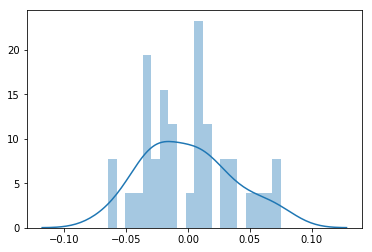

In [433]:
sns.distplot((y_train-y_train_pr),bins=20)

In [434]:
y_test = df_camera_koyck_test.pop('gmv')
x_test = df_camera_koyck_test

In [435]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test

const  discount  CameraBattery  Lens  adStock_Online marketing  \
25   1.00      0.54           0.43  0.54                      0.76   
48   1.00      0.67           0.43  0.75                      0.44   
52   1.00      0.00           0.00  0.00                      0.00   
37   1.00      0.58           0.72  0.41                      0.63   
6    1.00      1.00           0.00  0.00                      0.00   
18   1.00      0.55           0.42  0.59                      0.85   
20   1.00      0.51           0.46  0.48                      0.83   
46   1.00      0.64           0.53  1.00                      1.00   
5    1.00      0.61           0.00  0.00                      0.01   
31   1.00      0.54           0.57  0.47                      0.87   
33   1.00      0.63           0.55  0.49                      0.85   
45   1.00      0.64           0.51  0.67                      0.99   
35   1.00      0.59           0.75  0.79                      0.68   
32   1.00      0.57           1.00  0.56                      0.86   
0    1.00      0.62           0.00  0.00                      0.02   
11   1.00      0.58           0.41  0.41                      0.53   

    adStock_SEM  
25         1.00  
48         0.22  
52         0.01  
37         0.26  
6          0.04  
18         0.89  
20         0.49  
46         0.68  
5          0.09  
31         0.34  
33         0.36  
45         0.67  
35         0.28  
32         0.35  
0          0.00  
11         0.36

In [436]:
y_pred = lr.predict(x_test)

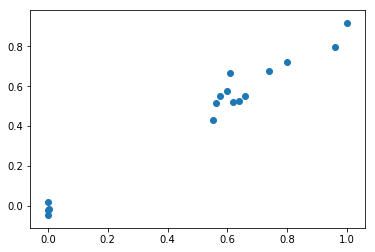

In [437]:
plt.scatter(y_test,y_pred)

In [438]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.006438165798831219


In [439]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


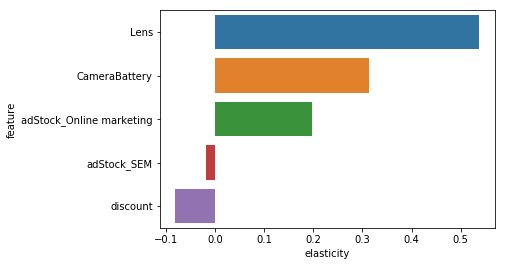

In [440]:
sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))

## Gaming Accessory - Koyck model


In [441]:
df_gaming_koyck = getKoyck(final_data_for_gaming_including_adstock)
df_gaming_koyck

week        gmv  units  sla  product_procurement_sla  product_mrp  \
0     27   36731.00     27 3.15                     2.81      3799.19   
1     28 2655731.00   2980 5.41                     3.16      1905.73   
2     29 2227555.36   2866 5.29                     2.64      1864.54   
3     30 2542682.50   2445 5.43                     2.51      2417.24   
4     31 1818388.00   1761 5.69                     2.65      5311.19   
5     32    2295.00      4 7.25                     2.25      1918.50   
6     33    4875.00      4 6.00                     2.50      2583.25   
7     34     598.00      2 2.00                     2.50       599.00   
8     35    2303.00      4 6.00                     3.25      1035.75   
9     36 2097881.50   2749 5.18                     2.68      1671.18   
10    37 2384974.00   2562 5.52                     2.67      2185.54   
11    38 2509072.00   2554 5.83                     2.68      2633.67   
12    39 2458820.00   2649 5.95                     2.52      2634.58   
13    40 2383947.00   2515 5.91                     2.62      2646.53   
14    41 2035934.00   2304 5.54                     2.49      2051.91   
15    42 7162738.56  11299 5.23                     2.93      4851.98   
16    43 2242108.57   2690 6.11                     2.52      1683.62   
17    44 2718399.96   3788 5.80                     2.13      1732.66   
18    45 3400761.71   4663 5.14                     2.37      1558.62   
19    46 2577265.50   3570 6.08                     2.31      1642.57   
20    47 2080763.00   2608 5.71                     2.43      1840.85   
21    48 2789937.00   3881 5.85                     2.52      1880.11   
22    49 2930598.00   3683 6.03                     2.47      1746.57   
23    50 3369285.50   4218 5.47                     2.63      1905.02   
24    51 2720945.00   3640 6.43                     2.54      1711.00   
25    52 4219307.00   5821 5.72                     2.57      1801.56   
26    53 3174318.00   4107 5.92                     2.48      2484.84   
27    54 3356611.00   4453 5.87                     2.49      2621.79   
28    55 2986744.00   3952 5.86                     2.46      2361.99   
29    56 4638700.54   5504 5.93                     2.56      2448.09   
30    57 2948583.50   3554 6.04                     2.62      1730.85   
31    58 3096518.85   4218 5.91                     2.53      1457.43   
32    59 2939247.80   4142 5.65                     2.51      1732.11   
33    60 3781700.83   5841 5.47                     2.64      1862.89   
34    61 3228976.10   5032 6.02                     2.49      1441.95   
35    62 3497768.25   5016 5.85                     2.41      1308.83   
36    63 4518723.40   5609 5.34                     2.59      1462.64   
37    64 3015336.25   3444 5.77                     2.58      1470.90   
38    65 3161290.00   3280 5.97                     2.54      1610.94   
39    66 3500365.50   3502 5.79                     2.48      1648.48   
40    67 3658587.50   3469 6.06                     2.54      1739.82   
41    68 2982757.00   3052 5.88                     2.51      1686.61   
42    69 1811602.00   2018 4.58                     2.31      1572.51   
43    70 5870883.00   6507 6.36                     2.38      1669.23   
44    71 3516258.00   3769 5.82                     2.36      1825.99   
45    72 3736792.00   4594 5.63                     2.24      1610.30   
46    73 3751515.25   4653 5.60                     2.14      1642.91   
47    74 5127685.33   5541 5.26                     2.00      1761.35   
48    75 4043053.92   4439 5.49                     2.08      1635.47   
49    76 3520847.00   3957 5.62                     2.16      1585.52   
50    77 3350411.00   3723 5.81                     2.19      1640.56   
51    78 3076254.25   3192 5.73                     2.19      1917.90   
52    79 1767105.75   1752 5.02                     2.21      2057.83   

    selling_price  discount   NPS  total_transactions  total_

In [442]:
df_gaming_koyck.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

week        gmv  sla  product_procurement_sla  discount   NPS  \
0     27   36731.00 3.15                     2.81      0.31 54.60   
1     28 2655731.00 5.41                     3.16      0.41 54.60   
2     29 2227555.36 5.29                     2.64      0.44 54.60   
3     30 2542682.50 5.43                     2.51      0.39 54.60   
4     31 1818388.00 5.69                     2.65      0.45 54.60   
5     32    2295.00 7.25                     2.25      0.63 59.99   
6     33    4875.00 6.00                     2.50      0.39 59.99   
7     34     598.00 2.00                     2.50      0.51 59.99   
8     35    2303.00 6.00                     3.25      0.45 59.99   
9     36 2097881.50 5.18                     2.68      0.40 46.98   
10    37 2384974.00 5.52                     2.67      0.39 46.93   
11    38 2509072.00 5.83                     2.68      0.41 46.93   
12    39 2458820.00 5.95                     2.52      0.42 46.93   
13    40 2383947.00 5.91                     2.62      0.40 45.51   
14    41 2035934.00 5.54                     2.49      0.38 44.40   
15    42 7162738.56 5.23                     2.93      0.53 44.40   
16    43 2242108.57 6.11                     2.52      0.41 44.40   
17    44 2718399.96 5.80                     2.13      0.45 44.74   
18    45 3400761.71 5.14                     2.37      0.46 47.00   
19    46 2577265.50 6.08                     2.31      0.43 47.00   
20    47 2080763.00 5.71                     2.43      0.43 47.00   
21    48 2789937.00 5.85                     2.52      0.45 47.00   
22    49 2930598.00 6.03                     2.47      0.42 45.98   
23    50 3369285.50 5.47                     2.63      0.45 45.80   
24    51 2720945.00 6.43                     2.54      0.46 45.80   
25    52 4219307.00 5.72                     2.57      0.52 45.80   
26    53 3174318.00 5.92                     2.48      0.49 46.39   
27    54 3356611.00 5.87                     2.49      0.48 47.09   
28    55 2986744.00 5.86                     2.46      0.45 47.09   
29    56 4638700.54 5.93                     2.56      0.46 47.09   
30    57 2948583.50 6.04                     2.62      0.44 47.09   
31    58 3096518.85 5.91                     2.53      0.45 50.33   
32    59 2939247.80 5.65                     2.51      0.48 50.33   
33    60 3781700.83 5.47                     2.64      0.51 50.33   
34    61 3228976.10 6.02                     2.49      0.50 50.33   
35    62 3497768.25 5.85                     2.41      0.48 49.19   
36    63 4518723.40 5.34                     2.59      0.48 49.02   
37    64 3015336.25 5.77                     2.58      0.42 49.02   
38    65 3161290.00 5.97                     2.54      0.42 49.02   
39    66 3500365.50 5.79                     2.48      0.42 50.25   
40    67 3658587.50 6.06                     2.54      0.41 51.83   
41    68 2982757.00 5.88                     2.51      0.44 51.83   
42    69 1811602.00 4.58                     2.31      0.45 51.83   
43    70 5870883.00 6.36                     2.38      0.46 51.45   
44    71 3516258.00 5.82                     2.36      0.46 47.31   
45    72 3736792.00 5.63                     2.24      0.50 47.31   
46    73 3751515.25 5.60                     2.14      0.51 47.31   
47    74 5127685.33 5.26                     2.00      0.48 47.31   
48    75 4043053.92 5.49                     2.08      0.45 49.61   
49    76 3520847.00 5.62                     2.16      0.45 50.52   
50    77 3350411.00 5.81                     2.19      0.45 50.52   
51    78 3076254.25 5.73                     2.19      0.43 50.52   
52    79 1767105.75 5.02                     2.21      0.42 50.52   

    total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
0            1.00        1.00                    0.00                 0.00   
1            0.00        0.00                    0.00                 0.00   
2            0.00        0.00              

In [443]:
df_game_koyck_train, df_game_koyck_test = train_test_split(df_gaming_koyck, train_size = 0.7, test_size = 0.3,random_state=100)

In [444]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day', 
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'gmv_lag']
df_game_koyck_train[numeric_variables] = scaler.fit_transform(df_game_koyck_train[numeric_variables])
df_game_koyck_test[numeric_variables] = scaler.fit_transform(df_game_koyck_test[numeric_variables])


In [445]:
y_train = df_game_koyck_train.pop('gmv')
x_train = df_game_koyck_train


In [446]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(x_train, y_train)


In [447]:
columns_taken = x_train.columns[rfe.support_]
columns_taken

Index(['GamingHeadset', 'GamingMousePad', 'MotionController', 'adStock_TV',
       'adStock_Digital', 'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_SEM', 'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [448]:
x_train_rfe_df = x_train[columns_taken]

In [449]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     77.16
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.88e-17
Time:                        22:49:02   Log-Likelihood:                 74.048
No. Observations:                  37   AIC:                            -126.1
Df Residuals:                      26   BIC:                            -108.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
8                 adStock_SEM 917.70
5             adStock_Digital 557.89
9               adStock_Radio 395.76
10              adStock_Other 353.31
7   adStock_Content Marketing 212.78
0                       const  43.20
6         adStock_Sponsorship  28.80
4                  adStock_TV  22.12
1               GamingHeadset   9.08
3            MotionController   4.43
2              GamingMousePad   4.40

In [450]:
x_train_lm_new = x_train_lm.drop(['adStock_Radio'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     88.93
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.02e-17
Time:                        22:49:02   Log-Likelihood:                 74.028
No. Observations:                  37   AIC:                            -128.1
Df Residuals:                      27   BIC:                            -111.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features    VIF
8                adStock_SEM 263.46
7  adStock_Content Marketing 211.57
5            adStock_Digital  44.44
6        adStock_Sponsorship  19.95
9              adStock_Other  17.79
0                      const   9.33
1              GamingHeadset   8.93
4                 adStock_TV   7.32
2             GamingMousePad   4.40
3           MotionController   2.99

In [451]:
x_train_lm_new2 = x_train_lm_new.drop(['adStock_SEM'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new2)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     70.93
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.54e-16
Time:                        22:49:02   Log-Likelihood:                 67.268
No. Observations:                  37   AIC:                            -116.5
Df Residuals:                      28   BIC:                            -102.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
7  adStock_Content Marketing 44.88
5            adStock_Digital 23.84
6        adStock_Sponsorship 15.29
0                      const  8.80
8              adStock_Other  7.25
1              GamingHeadset  6.23
4                 adStock_TV  3.98
2             GamingMousePad  3.63
3           MotionController  2.00

In [452]:
x_train_lm_new3 = x_train_lm_new2.drop(['adStock_TV'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new3)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     83.95
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.60e-17
Time:                        22:49:03   Log-Likelihood:                 67.267
No. Observations:                  37   AIC:                            -118.5
Df Residuals:                      29   BIC:                            -105.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
6  adStock_Content Marketing 28.37
4            adStock_Digital 18.65
0                      const  8.79
5        adStock_Sponsorship  6.00
1              GamingHeadset  4.73
2             GamingMousePad  3.40
7              adStock_Other  3.35
3           MotionController  1.57

In [453]:
x_train_lm_new4 = x_train_lm_new3.drop(['adStock_Digital'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new4)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.62e-18
Time:                        22:49:03   Log-Likelihood:                 67.180
No. Observations:                  37   AIC:                            -120.4
Df Residuals:                      30   BIC:                            -109.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features  VIF
0                      const 7.31
5  adStock_Content Marketing 5.26
4        adStock_Sponsorship 5.21
1              GamingHeadset 3.64
2             GamingMousePad 2.82
6              adStock_Other 1.58
3           MotionController 1.57

In [454]:
x_train_lm_new5 = x_train_lm_new4.drop(['adStock_Content Marketing'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new5)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.28e-19
Time:                        22:49:03   Log-Likelihood:                 66.568
No. Observations:                  37   AIC:                            -121.1
Df Residuals:                      31   BIC:                            -111.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0438    

Features  VIF
0                const 6.72
1        GamingHeadset 3.42
2       GamingMousePad 2.79
3     MotionController 1.33
5        adStock_Other 1.26
4  adStock_Sponsorship 1.25

In [455]:
x_train_lm_new6 = x_train_lm_new5.drop(['adStock_Other'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new6)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     149.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.20e-20
Time:                        22:49:03   Log-Likelihood:                 65.833
No. Observations:                  37   AIC:                            -121.7
Df Residuals:                      32   BIC:                            -113.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0477    

Features  VIF
0                const 6.48
1        GamingHeadset 3.25
2       GamingMousePad 2.79
3     MotionController 1.33
4  adStock_Sponsorship 1.10

In [456]:
lm = LinearRegression()
score = cross_val_score(lm,x_train_lm,y_train,scoring='r2',cv=10)
score.mean()

0.2285899895029778

In [457]:
y_train_pr = lr.predict(x_train_lm)

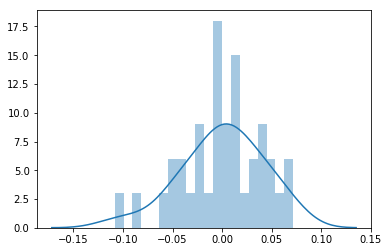

In [458]:
sns.distplot((y_train-y_train_pr),bins=20)

In [459]:
y_test = df_game_koyck_test.pop('gmv')
x_test = df_game_koyck_test


In [460]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test

const  GamingHeadset  GamingMousePad  MotionController  \
25   1.00           0.83            0.73              0.74   
48   1.00           0.50            0.46              0.42   
52   1.00           0.22            0.13              0.58   
37   1.00           0.37            0.45              0.51   
6    1.00           0.00            0.00              0.00   
18   1.00           0.41            0.30              0.14   
20   1.00           0.32            0.34              0.23   
46   1.00           0.78            0.54              1.00   
5    1.00           0.00            0.00              0.00   
31   1.00           0.63            0.74              0.40   
33   1.00           0.97            1.00              0.23   
45   1.00           0.76            0.65              0.63   
35   1.00           1.00            0.62              0.33   
32   1.00           0.76            0.59              0.44   
0    1.00           0.00            0.01              0.00   
11   1.00           0.16            0.46              0.47   

    adStock_Sponsorship  
25                 0.98  
48                 0.56  
52                 0.43  
37                 0.68  
6                  0.00  
18                 0.68  
20                 0.37  
46                 0.69  
5                  0.02  
31                 0.16  
33                 0.21  
45                 0.68  
35                 0.48  
32                 0.19  
0                  0.05  
11                 1.00

In [461]:
y_pred = lr.predict(x_test)

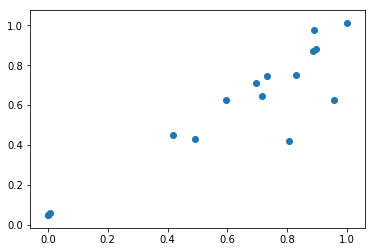

In [462]:
plt.scatter(y_test,y_pred)

In [463]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.018416977208310606


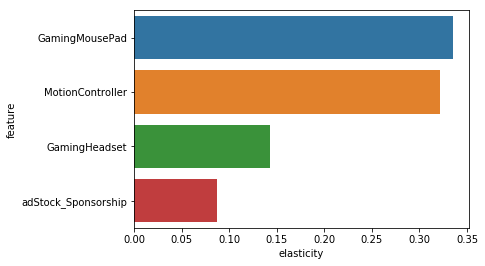

In [464]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))


### Home Audio - Koyck Model

In [465]:
df_home_koyck = getKoyck(final_data_for_home_audio_including_adstock)
df_home_koyck

week         gmv   units  sla  product_procurement_sla  product_mrp  \
0     27   101627.00   37.00 2.86                     3.57      4626.08   
1     28  4485348.13 2048.00 7.53                     2.86      3462.94   
2     29  5290726.00 2401.00 7.08                     2.76      3592.07   
3     30  4541341.00 2149.00 7.10                     2.84      3541.07   
4     31  3370335.00 1545.00 7.27                     2.72      3588.78   
5     32     2599.00    1.00 9.00                     2.00      3099.00   
6     36  3740010.00 1781.00 5.56                     2.79      3739.34   
7     37  4032024.00 1994.00 5.51                     2.88      3628.74   
8     38  3617341.00 1810.00 6.19                     2.68      3394.06   
9     39  4128524.00 2195.00 6.31                     2.67      3174.06   
10    40  4018011.00 2065.00 6.33                     2.52      3301.39   
11    41  3569143.00 1827.00 5.94                     2.60      3242.19   
12    42 19177390.00 7956.00 5.94                     2.35      4688.20   
13    43  5676111.00 2458.00 6.58                     2.65      4003.87   
14    44  6108498.00 2862.00 6.52                     2.52      3685.31   
15    45  7320846.00 3335.00 5.04                     2.78      4576.05   
16    46  5076162.80 2407.00 6.43                     2.47      3799.51   
17    47  3719649.50 1747.00 5.92                     2.66      3837.53   
18    48  3808963.50 1873.00 6.42                     2.52      3376.71   
19    49  4316845.00 2063.00 5.75                     2.79      4009.65   
20    50  6814555.42 3072.00 4.96                     2.97      4799.89   
21    51  4812789.00 2222.00 5.92                     2.81      4095.55   
22    52  6482399.25 2848.00 5.21                     2.55      4488.55   
23    53  5059789.25 2369.00 5.88                     2.48      3698.92   
24    54  6996240.00 3283.00 4.79                     2.86      4500.61   
25    55  4862091.00 2213.00 5.46                     2.86      4191.59   
26    56  5496892.34 2618.00 5.75                     2.68      3993.01   
27    57  4691152.00 2166.00 5.68                     2.68      3981.98   
28    58  6902225.00 3190.00 4.87                     2.80      4320.85   
29    59  4669168.00 2248.00 5.31                     2.81      3851.26   
30    60  6547746.36 3067.00 5.07                     2.61      4175.25   
31    61  5223642.00 2434.00 5.69                     2.61      3789.37   
32    62  4781039.00 2285.00 5.78                     2.69      3521.69   
33    63  6644110.00 3047.00 5.28                     2.68      4034.01   
34    64  4629455.00 2192.00 5.33                     2.58      3592.25   
35    65  3544522.00 1831.00 5.62                     2.61      3258.28   
36    66  3546570.00 1723.00 5.40                     2.70      3493.61   
37    67  3356788.00 1605.00 5.79                     2.71      3451.85   
38    68  2826330.00 1306.00 5.61                     2.60      3620.38   
39    69  1758615.00  732.00 4.58                     2.78      4097.94   
40    70  5837458.00 2849.00 5.93                     2.66      3533.93   
41    71  3657196.00 1773.00 5.13                     2.53      3478.97   
42    72  3591861.00 1650.00 5.05                     2.61      3700.55   
43    73  3252744.00 1466.00 5.02                     2.65      3705.45   
44    74  3800323.00 1678.00 4.31                     2.54      3842.40   
45    75  3429091.00 1514.00 5.00                     2.64      3705.96   
46    76  3533585.00 1633.00 5.56                     2.59      3461.65   
47    77  3564818.00 1570.00 4.95                     2.71      3535.05   
48    78  3156425.00 1307.00 4.19                     2.54      3876.69   
49    79  1529929.00  669.00 3.95                     2.56      3731.85   
50    33        0.00    0.00 0.00                     0.00         0.00   
51    34        0.00    0.00 0.00                     0.00         0.00   
52    35        0.00    0.00 

In [466]:
df_home_koyck = df_home_koyck.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [467]:
df_home_koyck

week         gmv  sla  product_procurement_sla  discount   NPS  \
0     27   101627.00 2.86                     3.57      0.37 54.60   
1     28  4485348.13 7.53                     2.86      0.32 54.60   
2     29  5290726.00 7.08                     2.76      0.34 54.60   
3     30  4541341.00 7.10                     2.84      0.34 54.60   
4     31  3370335.00 7.27                     2.72      0.33 54.60   
5     32     2599.00 9.00                     2.00      0.16 59.99   
6     36  3740010.00 5.56                     2.79      0.38 46.98   
7     37  4032024.00 5.51                     2.88      0.38 46.93   
8     38  3617341.00 6.19                     2.68      0.37 46.93   
9     39  4128524.00 6.31                     2.67      0.35 46.93   
10    40  4018011.00 6.33                     2.52      0.35 45.49   
11    41  3569143.00 5.94                     2.60      0.35 44.40   
12    42 19177390.00 5.94                     2.35      0.42 44.40   
13    43  5676111.00 6.58                     2.65      0.37 44.40   
14    44  6108498.00 6.52                     2.52      0.36 44.73   
15    45  7320846.00 5.04                     2.78      0.45 47.00   
16    46  5076162.80 6.43                     2.47      0.38 47.00   
17    47  3719649.50 5.92                     2.66      0.37 47.00   
18    48  3808963.50 6.42                     2.52      0.35 47.00   
19    49  4316845.00 5.75                     2.79      0.41 45.98   
20    50  6814555.42 4.96                     2.97      0.48 45.80   
21    51  4812789.00 5.92                     2.81      0.40 45.80   
22    52  6482399.25 5.21                     2.55      0.43 45.80   
23    53  5059789.25 5.88                     2.48      0.37 46.39   
24    54  6996240.00 4.79                     2.86      0.45 47.09   
25    55  4862091.00 5.46                     2.86      0.40 47.09   
26    56  5496892.34 5.75                     2.68      0.42 47.09   
27    57  4691152.00 5.68                     2.68      0.39 47.09   
28    58  6902225.00 4.87                     2.80      0.44 50.33   
29    59  4669168.00 5.31                     2.81      0.40 50.33   
30    60  6547746.36 5.07                     2.61      0.43 50.33   
31    61  5223642.00 5.69                     2.61      0.38 50.33   
32    62  4781039.00 5.78                     2.69      0.36 49.20   
33    63  6644110.00 5.28                     2.68      0.41 49.02   
34    64  4629455.00 5.33                     2.58      0.38 49.02   
35    65  3544522.00 5.62                     2.61      0.37 49.02   
36    66  3546570.00 5.40                     2.70      0.38 50.17   
37    67  3356788.00 5.79                     2.71      0.37 51.83   
38    68  2826330.00 5.61                     2.60      0.38 51.83   
39    69  1758615.00 4.58                     2.78      0.36 51.83   
40    70  5837458.00 5.93                     2.66      0.39 51.45   
41    71  3657196.00 5.13                     2.53      0.39 47.31   
42    72  3591861.00 5.05                     2.61      0.40 47.31   
43    73  3252744.00 5.02                     2.65      0.39 47.31   
44    74  3800323.00 4.31                     2.54      0.38 47.31   
45    75  3429091.00 5.00                     2.64      0.36 49.70   
46    76  3533585.00 5.56                     2.59      0.34 50.52   
47    77  3564818.00 4.95                     2.71      0.33 50.52   
48    78  3156425.00 4.19                     2.54      0.34 50.52   
49    79  1529929.00 3.95                     2.56      0.34 50.52   
50    33        0.00 0.00                     0.00      0.00  0.00   
51    34        0.00 0.00                     0.00      0.00  0.00   
52    35        0.00 0.00                     0.00      0.00  0.00   

    total_holiday  is_holiday  total_special_sale_day  is_special_sale_day  \
0            1.00        1.00                    0.00                 0.00   
1            0.00        0.00                    0.00              

In [468]:
df_home_koyck_train, df_home_koyck_test = train_test_split(df_home_koyck, train_size = 0.7, test_size = 0.3,random_state=100)

In [469]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'gmv_lag']
df_home_koyck_train[numeric_variables] = scaler.fit_transform(df_home_koyck_train[numeric_variables])
df_home_koyck_test[numeric_variables] = scaler.fit_transform(df_home_koyck_test[numeric_variables])


In [470]:
y_train = df_home_koyck_train.pop('gmv')
x_train = df_home_koyck_train


In [471]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,8)
rfe = rfe.fit(x_train, y_train)


In [472]:
columns_taken = x_train.columns[rfe.support_]


In [473]:
columns_taken

Index(['FMRadio', 'HomeAudioSpeaker', 'KaraokePlayer', 'VoiceRecorder',
       'adStock_Digital', 'adStock_Content Marketing', 'adStock_SEM',
       'adStock_Radio'],
      dtype='object')

In [474]:
x_train_rfe_df = x_train[columns_taken]

In [475]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1795.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.58e-36
Time:                        22:49:11   Log-Likelihood:                 132.45
No. Observations:                  37   AIC:                            -246.9
Df Residuals:                      28   BIC:                            -232.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
7                adStock_SEM 72.35
6  adStock_Content Marketing 40.66
5            adStock_Digital 25.60
0                      const  9.98
2           HomeAudioSpeaker  5.65
1                    FMRadio  4.44
8              adStock_Radio  3.79
3              KaraokePlayer  2.96
4              VoiceRecorder  1.71

In [476]:
x_train_lm_new = x_train_lm.drop(['adStock_Digital'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2093.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.95e-37
Time:                        22:49:11   Log-Likelihood:                 132.18
No. Observations:                  37   AIC:                            -248.4
Df Residuals:                      29   BIC:                            -235.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
6                adStock_SEM 40.39
5  adStock_Content Marketing 39.25
0                      const  9.63
2           HomeAudioSpeaker  5.64
1                    FMRadio  4.27
7              adStock_Radio  3.76
3              KaraokePlayer  2.93
4              VoiceRecorder  1.46

In [477]:
x_train_lm_new2 = x_train_lm_new.drop(['adStock_Radio'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new2)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2414.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.28e-39
Time:                        22:49:11   Log-Likelihood:                 131.34
No. Observations:                  37   AIC:                            -248.7
Df Residuals:                      30   BIC:                            -237.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
6                adStock_SEM 16.89
5  adStock_Content Marketing 15.79
0                      const  9.52
2           HomeAudioSpeaker  5.58
1                    FMRadio  4.08
3              KaraokePlayer  2.93
4              VoiceRecorder  1.35

In [478]:
x_train_lm_new3 = x_train_lm_new2.drop(['adStock_Content Marketing'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new3)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2247.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.05e-38
Time:                        22:49:11   Log-Likelihood:                 126.05
No. Observations:                  37   AIC:                            -240.1
Df Residuals:                      31   BIC:                            -230.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0075      0.004  

Features  VIF
0             const 9.44
2  HomeAudioSpeaker 4.33
1           FMRadio 3.63
3     KaraokePlayer 2.69
5       adStock_SEM 2.02
4     VoiceRecorder 1.27

In [479]:
y_train_pr = lr.predict(x_train_lm)

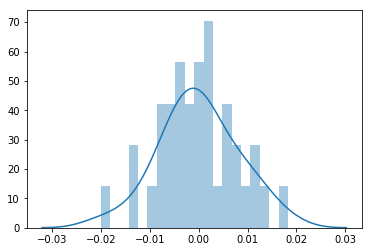

In [480]:
sns.distplot((y_train-y_train_pr),bins=20)

In [481]:
y_test = df_home_koyck_test.pop('gmv')
x_test = df_home_koyck_test


In [482]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test


const  FMRadio  HomeAudioSpeaker  KaraokePlayer  VoiceRecorder  \
25   1.00     0.63              0.70           0.00           0.53   
48   1.00     0.33              0.39           0.00           0.40   
52   1.00     0.00              0.00           0.00           0.00   
37   1.00     0.72              0.40           0.00           0.82   
6    1.00     0.83              0.45           0.00           0.56   
18   1.00     0.77              0.54           0.00           0.34   
20   1.00     0.83              1.00           0.00           0.52   
46   1.00     0.78              0.41           0.00           1.00   
5    1.00     0.00              0.00           0.00           0.00   
31   1.00     0.77              0.74           0.00           0.69   
33   1.00     0.99              0.93           0.00           0.73   
45   1.00     0.52              0.44           0.00           0.50   
35   1.00     0.83              0.49           0.00           0.69   
32   1.00     0.90              0.65           0.00           0.65   
0    1.00     0.00              0.01           0.00           0.01   
11   1.00     1.00              0.44           0.00           0.57   

    adStock_SEM  
25         0.12  
48         0.03  
52         0.00  
37         0.07  
6          0.05  
18         0.13  
20         0.24  
46         0.06  
5          0.02  
31         0.10  
33         0.08  
45         0.10  
35         0.07  
32         0.08  
0          0.00  
11         1.00

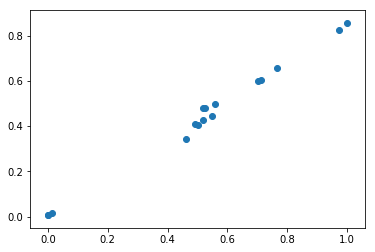

In [483]:
y_pred = lr.predict(x_test)


plt.scatter(y_test,y_pred)


In [484]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.008507731358331458


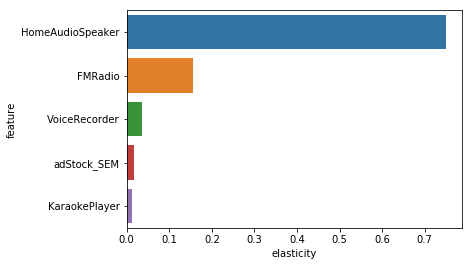

In [485]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))


### Distributed Lag Model 

In [486]:
#function for getting distributed lag for each of the attributes

def getDistributedLag(df):
    
    df['adStock_Digital1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital3'] = df['adStock_Digital'].shift(3)
    
    df['adStock_TV1'] = df['adStock_TV'].shift(1)
    df['adStock_TV2'] = df['adStock_TV'].shift(2)
    df['adStock_TV3'] = df['adStock_TV'].shift(3)
    
    df['adStock_Content Marketing1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing3'] = df['adStock_Content Marketing'].shift(3)
 
    df['adStock_Sponsorship1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship3'] = df['adStock_Sponsorship'].shift(3)
    
    
    df['adStock_ Affiliates1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates3'] = df['adStock_ Affiliates'].shift(3)
    
    df['adStock_Online marketing1'] = df['adStock_Online marketing'].shift(1)    
    df['adStock_Online marketing2'] = df['adStock_Online marketing'].shift(2)    
    df['adStock_Online marketing3'] = df['adStock_Online marketing'].shift(3)    
    
    
    df['adStock_Other1'] = df['adStock_Other'].shift(1)   
    df['adStock_Other2'] = df['adStock_Other'].shift(2)
    df['adStock_Other3'] = df['adStock_Other'].shift(3)
    
    df['adStock_SEM1'] = df['adStock_SEM'].shift(1)   
    df['adStock_SEM2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM3'] = df['adStock_SEM'].shift(3)
    
    df['gmv1'] = df['gmv'].shift(1)   
    df['gmv2'] = df['gmv'].shift(2)
    df['gmv3'] = df['gmv'].shift(3)
    
    
    df['product_procurement_sla1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla3'] = df['product_procurement_sla'].shift(3)
    
    df['sla1'] = df['sla'].shift(1)   
    df['sla2'] = df['sla'].shift(2)
    df['sla3'] = df['sla'].shift(3)
    
    df['NPS1'] = df['NPS'].shift(1)   
    df['NPS2'] = df['NPS'].shift(2)
    df['NPS3'] = df['NPS'].shift(3)

    df['discount1'] = df['discount'].shift(1)   
    df['discount2'] = df['discount'].shift(2)
    df['discount3'] = df['discount'].shift(3)
    
    
    return df.fillna(0)

### Camera Accessory - Distributed Model

In [487]:
df_camera_dis = getDistributedLag(final_data_for_camera_including_adstock)

In [488]:
df_camera_dis = df_camera_dis.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [489]:
df_camera_dis_train, df_camera_dis_test = train_test_split(df_camera_dis, train_size = 0.7, test_size = 0.3,random_state=100)

In [490]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
       'total_special_sale_day',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope', 'adStock_TV1', 'adStock_TV2',
       'adStock_TV3', 'adStock_Digital1', 'adStock_Digital2',
       'adStock_Digital3', 'adStock_Sponsorship1',
       'adStock_Sponsorship2', 'adStock_Sponsorship3',
       'adStock_Content Marketing1', 'adStock_Content Marketing2',
       'adStock_Content Marketing3', 'adStock_Online marketing1',
       'adStock_Online marketing2', 'adStock_Online marketing3',
       'adStock_ Affiliates1', 'adStock_ Affiliates2',
       'adStock_ Affiliates3', 'adStock_SEM1', 'adStock_SEM2',
       'adStock_SEM3', 'adStock_Other1', 'adStock_Other2',
       'adStock_Other3', 'gmv1', 'gmv2', 'gmv3', 'sla1',
       'sla2', 'sla3', 'product_procurement_sla1',
       'product_procurement_sla2', 'product_procurement_sla3',
       'discount1', 'discount2', 'discount3', 'NPS1',
       'NPS2', 'NPS3']
df_camera_dis_train[numeric_variables] = scaler.fit_transform(df_camera_dis_train[numeric_variables])
df_camera_dis_test[numeric_variables] = scaler.fit_transform(df_camera_dis_test[numeric_variables])


In [491]:
y_train = df_camera_dis_train.pop('gmv')
x_train = df_camera_dis_train


In [492]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,8)
rfe = rfe.fit(x_train, y_train)


In [493]:
columns_taken = x_train.columns[rfe.support_]

In [494]:
columns_taken

Index(['product_procurement_sla', 'CameraBatteryGrip', 'CameraTripod', 'Lens',
       'Telescope', 'adStock_TV2', 'adStock_TV3', 'adStock_Sponsorship2'],
      dtype='object')

In [495]:
x_train_rfe_df = x_train[columns_taken]

In [496]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.32e-19
Time:                        22:49:30   Log-Likelihood:                 83.620
No. Observations:                  37   AIC:                            -149.2
Df Residuals:                      28   BIC:                            -134.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 20.35
6              adStock_TV2 13.78
7              adStock_TV3 11.94
4                     Lens  3.03
5                Telescope  2.47
8     adStock_Sponsorship2  2.40
3             CameraTripod  1.93
1  product_procurement_sla  1.77
2        CameraBatteryGrip  1.72

In [497]:
x_train_lm_new = x_train_lm.drop(['adStock_TV3'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.07e-20
Time:                        22:49:30   Log-Likelihood:                 83.608
No. Observations:                  37   AIC:                            -151.2
Df Residuals:                      29   BIC:                            -138.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0                    const 19.94
4                     Lens  3.02
5                Telescope  2.46
7     adStock_Sponsorship2  2.37
6              adStock_TV2  2.08
3             CameraTripod  1.90
1  product_procurement_sla  1.77
2        CameraBatteryGrip  1.70

In [498]:
y_train_pr = lr.predict(x_train_lm)

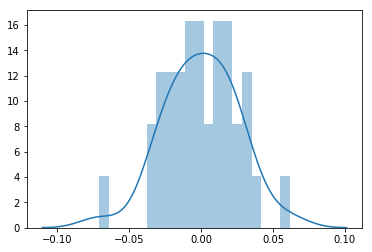

In [499]:
sns.distplot((y_train-y_train_pr),bins=20)

In [500]:
y_test = df_camera_dis_test.pop('gmv')
x_test = df_camera_dis_test


In [501]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test


const  product_procurement_sla  CameraBatteryGrip  CameraTripod  Lens  \
25   1.00                     0.69               0.59          0.77  0.54   
48   1.00                     0.59               0.24          0.26  0.75   
52   1.00                     0.00               0.00          0.00  0.00   
37   1.00                     0.61               0.29          0.56  0.41   
6    1.00                     0.25               0.00          0.00  0.00   
18   1.00                     0.71               0.35          0.78  0.59   
20   1.00                     0.72               1.00          0.60  0.48   
46   1.00                     0.59               0.18          0.58  1.00   
5    1.00                     1.00               0.00          0.00  0.00   
31   1.00                     0.65               0.12          0.56  0.47   
33   1.00                     0.58               0.18          0.87  0.49   
45   1.00                     0.61               0.18          0.48  0.67   
35   1.00                     0.63               0.18          0.72  0.79   
32   1.00                     0.67               0.24          0.87  0.56   
0    1.00                     0.74               0.00          0.01  0.00   
11   1.00                     0.76               0.65          1.00  0.41   

    Telescope  adStock_TV2  adStock_Sponsorship2  
25       0.57         0.69                  0.87  
48       0.93         0.23                  0.65  
52       0.00         0.21                  0.43  
37       0.72         1.00                  0.58  
6        0.00         0.02                  0.08  
18       0.39         0.81                  1.00  
20       0.20         0.71                  0.46  
46       1.00         0.29                  0.64  
5        0.00         0.03                  0.15  
31       0.57         0.70                  0.13  
33       0.64         0.48                  0.21  
45       0.71         0.36                  0.62  
35       0.68         0.43                  0.24  
32       0.42         0.55                  0.18  
0        0.00         0.00                  0.00  
11       0.38         0.38                  0.80

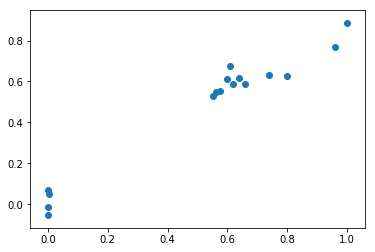

In [502]:
y_pred = lr.predict(x_test)


plt.scatter(y_test,y_pred)


In [503]:
lm = LinearRegression()
score = cross_val_score(lm,x_train_lm,y_train,scoring='r2',cv=10)
score.mean()

0.7664772443453649

In [504]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.0070815267866609025


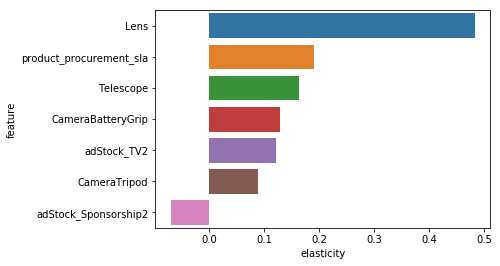

In [505]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))


### Gaming Accessory - Distributed Lag

In [506]:
df_game_dis = getDistributedLag(final_data_for_gaming_including_adstock)

In [507]:
df_game_dis = df_game_dis.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [508]:
df_game_dis_train, df_game_dis_test = train_test_split(df_game_dis, train_size = 0.7, test_size = 0.3,random_state=100)

In [509]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
        'total_special_sale_day',
       'total_pay_days', 
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'adStock_TV1', 'adStock_TV2',
       'adStock_TV3', 'adStock_Digital1', 'adStock_Digital2',
       'adStock_Digital3', 'adStock_Sponsorship1',
       'adStock_Sponsorship2', 'adStock_Sponsorship3',
       'adStock_Content Marketing1', 'adStock_Content Marketing2',
       'adStock_Content Marketing3', 'adStock_Online marketing1',
       'adStock_Online marketing2', 'adStock_Online marketing3',
       'adStock_ Affiliates1', 'adStock_ Affiliates2',
       'adStock_ Affiliates3', 'adStock_SEM1', 'adStock_SEM2',
       'adStock_SEM3', 'adStock_Other1', 'adStock_Other2',
       'adStock_Other3', 'gmv1', 'gmv2', 'gmv3', 'sla1',
       'sla2', 'sla3', 'product_procurement_sla1',
       'product_procurement_sla2', 'product_procurement_sla3',
       'discount1', 'discount2', 'discount3', 'NPS1',
       'NPS2', 'NPS3']
df_game_dis_train[numeric_variables] = scaler.fit_transform(df_game_dis_train[numeric_variables])
df_game_dis_test[numeric_variables] = scaler.fit_transform(df_game_dis_test[numeric_variables])


In [510]:
y_train = df_game_dis_train.pop('gmv')
x_train = df_game_dis_train


In [511]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(x_train, y_train)


In [512]:
columns_taken = x_train.columns[rfe.support_]
columns_taken

Index(['GamePad', 'GamingAccessoryKit', 'GamingHeadset', 'GamingKeyboard',
       'GamingMousePad', 'JoystickGamingWheel', 'MotionController',
       'adStock_TV', 'adStock_ Affiliates2', 'adStock_Online marketing3'],
      dtype='object')

In [513]:
x_train_rfe_df = x_train[columns_taken]


In [514]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.46e-21
Time:                        22:49:49   Log-Likelihood:                 88.092
No. Observations:                  37   AIC:                            -154.2
Df Residuals:                      26   BIC:                            -136.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
9        adStock_ Affiliates2 24.00
10  adStock_Online marketing3 20.28
0                       const 11.90
5              GamingMousePad  8.31
3               GamingHeadset  6.39
2          GamingAccessoryKit  4.32
1                     GamePad  4.24
7            MotionController  3.97
4              GamingKeyboard  3.05
6         JoystickGamingWheel  2.92
8                  adStock_TV  2.82

In [515]:
x_train_lm_new = x_train_lm.drop(['adStock_ Affiliates2'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.90e-21
Time:                        22:49:49   Log-Likelihood:                 85.871
No. Observations:                  37   AIC:                            -151.7
Df Residuals:                      27   BIC:                            -135.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Features   VIF
0                      const 11.90
5             GamingMousePad  8.07
3              GamingHeadset  6.34
2         GamingAccessoryKit  4.25
1                    GamePad  4.20
7           MotionController  3.96
9  adStock_Online marketing3  3.96
4             GamingKeyboard  3.00
6        JoystickGamingWheel  2.92
8                 adStock_TV  2.18

In [516]:
x_train_lm_new2 = x_train_lm_new.drop(['adStock_Online marketing3'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new2)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.23e-22
Time:                        22:49:49   Log-Likelihood:                 83.782
No. Observations:                  37   AIC:                            -149.6
Df Residuals:                      28   BIC:                            -135.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0087    

Features   VIF
0                const 10.78
5       GamingMousePad  7.51
3        GamingHeadset  4.34
7     MotionController  3.96
1              GamePad  3.84
2   GamingAccessoryKit  3.84
4       GamingKeyboard  2.95
6  JoystickGamingWheel  2.78
8           adStock_TV  1.56

In [517]:
x_train_lm_new3 = x_train_lm_new2.drop(['GamingMousePad'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new3)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.49e-22
Time:                        22:49:49   Log-Likelihood:                 79.902
No. Observations:                  37   AIC:                            -143.8
Df Residuals:                      29   BIC:                            -130.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0144    

Features   VIF
0                const 10.56
2   GamingAccessoryKit  3.78
1              GamePad  3.45
6     MotionController  3.03
5  JoystickGamingWheel  2.78
3        GamingHeadset  2.06
4       GamingKeyboard  1.58
7           adStock_TV  1.54

In [518]:
x_train_lm_new4 = x_train_lm_new3.drop(['GamingAccessoryKit'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new4)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.19e-22
Time:                        22:49:49   Log-Likelihood:                 77.154
No. Observations:                  37   AIC:                            -140.3
Df Residuals:                      30   BIC:                            -129.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0046    

Features  VIF
0                const 9.80
5     MotionController 2.99
4  JoystickGamingWheel 2.44
1              GamePad 2.18
2        GamingHeadset 1.93
3       GamingKeyboard 1.56
6           adStock_TV 1.33

In [519]:
x_train_lm_new5 = x_train_lm_new4.drop(['MotionController'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new5)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     183.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.79e-22
Time:                        22:49:49   Log-Likelihood:                 73.956
No. Observations:                  37   AIC:                            -135.9
Df Residuals:                      31   BIC:                            -126.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005    

Features  VIF
0                const 9.65
1              GamePad 2.06
2        GamingHeadset 1.91
3       GamingKeyboard 1.52
5           adStock_TV 1.32
4  JoystickGamingWheel 1.30

In [520]:
y_train_pr = lr.predict(x_train_lm)

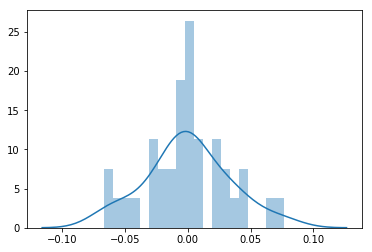

In [521]:
sns.distplot((y_train-y_train_pr),bins=20)

In [522]:
y_test = df_game_dis_test.pop('gmv')
x_test = df_game_dis_test


In [523]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test


const  GamePad  GamingHeadset  GamingKeyboard  JoystickGamingWheel  \
25   1.00     1.00           0.83            0.61                 0.15   
48   1.00     0.94           0.50            0.86                 1.00   
52   1.00     0.36           0.22            0.47                 0.52   
37   1.00     0.82           0.37            1.00                 0.19   
6    1.00     0.00           0.00            0.00                 0.00   
18   1.00     0.98           0.41            0.59                 0.12   
20   1.00     0.58           0.32            0.39                 0.07   
46   1.00     0.79           0.78            0.75                 0.72   
5    1.00     0.00           0.00            0.00                 0.00   
31   1.00     0.69           0.63            0.80                 0.08   
33   1.00     0.72           0.97            0.96                 0.05   
45   1.00     0.84           0.76            0.79                 0.88   
35   1.00     0.76           1.00            0.87                 0.10   
32   1.00     0.64           0.76            0.67                 0.03   
0    1.00     0.01           0.00            0.01                 0.00   
11   1.00     0.78           0.16            0.41                 0.17   

    adStock_TV  
25        0.62  
48        0.19  
52        0.19  
37        1.00  
6         0.00  
18        0.68  
20        0.62  
46        0.22  
5         0.00  
31        0.50  
33        0.40  
45        0.26  
35        0.74  
32        0.43  
0         0.01  
11        0.40

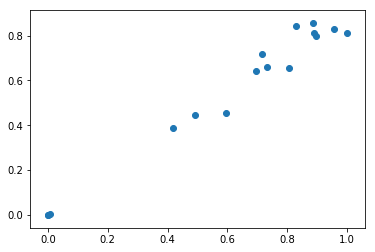

In [524]:
y_pred = lr.predict(x_test)


plt.scatter(y_test,y_pred)


In [525]:
lm = LinearRegression()
score = cross_val_score(lm, x_train_lm, y_train,scoring='r2',cv=10)
score.mean()

0.5335590863589779

In [526]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.007661096889942759


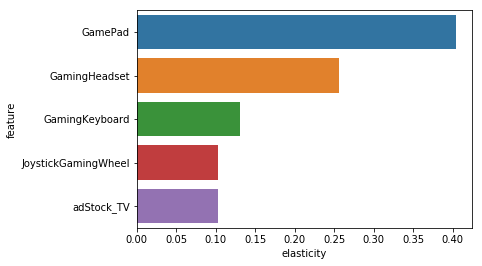

In [527]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))


### Home Audio - Distributed Lag model

In [528]:
df_home_dis = getDistributedLag(final_data_for_home_audio_including_adstock)

In [529]:
df_home_dis.columns

Index(['week', 'gmv', 'units', 'sla', 'product_procurement_sla', 'product_mrp',
       'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_holiday', 'is_holiday', 'total_special_sale_day',
       'is_special_sale_day', 'total_pay_days', 'is_pay_days', 'COD_count',
       'Prepaid_count', 'percentageOf_online_transactions', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox', 'SoundMixer',
       'VoiceRecorder', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_lag', 'adStock_Digital1',
       'adStock_Digital2', 'adStock_Digital3', 'adStock_TV1', 'adStock_TV2',
       'adStock_TV3', 'adStock_Content Marketing1',
       'adStock_Content Marketing2', 'adStock_Content Marketing3',
       'adStock_Sponsorshi

In [530]:
df_home_dis.drop('percentageOf_online_transactions',axis=1,inplace=True)

In [531]:
df_home_dis = df_home_dis.drop(['selling_price','units','product_mrp','total_transactions','COD_count', 'Prepaid_count'], axis = 1)

In [532]:
df_home_dis_train, df_home_dis_test = train_test_split(df_home_dis, train_size = 0.7, test_size = 0.3,random_state=100)

In [533]:
numeric_variables=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holiday',
        'total_special_sale_day', 
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder',
       'adStock_TV1', 'adStock_TV2', 'adStock_TV3',
       'adStock_Digital1', 'adStock_Digital2', 'adStock_Digital3',
       'adStock_Sponsorship1', 'adStock_Sponsorship2',
       'adStock_Sponsorship3', 'adStock_Content Marketing1',
       'adStock_Content Marketing2', 'adStock_Content Marketing3',
       'adStock_Online marketing1', 'adStock_Online marketing2',
       'adStock_Online marketing3', 'adStock_ Affiliates1',
       'adStock_ Affiliates2', 'adStock_ Affiliates3',
       'adStock_SEM1', 'adStock_SEM2', 'adStock_SEM3',
       'adStock_Other1', 'adStock_Other2', 'adStock_Other3',
       'gmv1', 'gmv2', 'gmv3', 'sla1', 'sla2', 'sla3',
       'product_procurement_sla1', 'product_procurement_sla2',
       'product_procurement_sla3', 'discount1', 'discount2',
       'discount3', 'NPS1', 'NPS2', 'NPS3']
df_home_dis_train[numeric_variables] = scaler.fit_transform(df_home_dis_train[numeric_variables])
df_home_dis_test[numeric_variables] = scaler.fit_transform(df_home_dis_test[numeric_variables])


In [534]:
y_train = df_home_dis_train.pop('gmv')
x_train = df_home_dis_train


In [535]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(x_train, y_train)


In [536]:
columns_taken = x_train.columns[rfe.support_]

x_train_rfe_df = x_train[columns_taken]


In [537]:
x_train_lm = sm.add_constant(x_train_rfe_df)
lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     962.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.33e-31
Time:                        22:50:07   Log-Likelihood:                 126.43
No. Observations:                  37   AIC:                            -230.9
Df Residuals:                      26   BIC:                            -213.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
5   adStock_Online marketing 486.48
6        adStock_ Affiliates 344.15
7                adStock_SEM 264.92
4            adStock_Digital 181.23
10              adStock_SEM2 142.68
8           adStock_Digital2 128.36
0                      const  30.51
9       adStock_Sponsorship2   8.41
2           HomeAudioSpeaker   7.25
1                    FMRadio   4.63
3              KaraokePlayer   3.97

In [538]:
x_train_lm_new = x_train_lm.drop(['adStock_Digital2'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1109.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.74e-32
Time:                        22:50:07   Log-Likelihood:                 126.41
No. Observations:                  37   AIC:                            -232.8
Df Residuals:                      27   BIC:                            -216.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
5  adStock_Online marketing 426.77
6       adStock_ Affiliates 309.36
7               adStock_SEM 264.86
4           adStock_Digital 181.04
0                     const  30.24
8      adStock_Sponsorship2   8.32
2          HomeAudioSpeaker   6.84
9              adStock_SEM2   6.72
3             KaraokePlayer   3.97
1                   FMRadio   3.81

In [539]:
x_train_lm_new1 = x_train_lm_new.drop(['adStock_ Affiliates'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new1)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.63e-33
Time:                        22:50:07   Log-Likelihood:                 125.34
No. Observations:                  37   AIC:                            -232.7
Df Residuals:                      28   BIC:                            -218.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
6               adStock_SEM 78.72
4           adStock_Digital 65.41
0                     const 19.60
7      adStock_Sponsorship2  7.46
8              adStock_SEM2  6.71
2          HomeAudioSpeaker  6.30
5  adStock_Online marketing  5.70
3             KaraokePlayer  3.85
1                   FMRadio  3.57

In [540]:
x_train_lm_new2 = x_train_lm_new1.drop(['adStock_Online marketing'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new2)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1346.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.15e-34
Time:                        22:50:07   Log-Likelihood:                 124.03
No. Observations:                  37   AIC:                            -232.1
Df Residuals:                      29   BIC:                            -219.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0174 

Features   VIF
5           adStock_SEM 25.52
4       adStock_Digital 21.03
0                 const 12.37
6  adStock_Sponsorship2  7.26
7          adStock_SEM2  6.40
2      HomeAudioSpeaker  5.21
1               FMRadio  3.53
3         KaraokePlayer  3.49

In [541]:
x_train_lm_new3 = x_train_lm_new2.drop(['adStock_Digital'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new3)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1596.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           3.53e-36
Time:                        22:50:07   Log-Likelihood:                 123.71
No. Observations:                  37   AIC:                            -233.4
Df Residuals:                      30   BIC:                            -222.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0163 

Features   VIF
0                 const 11.54
5  adStock_Sponsorship2  5.88
6          adStock_SEM2  5.57
2      HomeAudioSpeaker  4.63
4           adStock_SEM  3.90
1               FMRadio  3.48
3         KaraokePlayer  3.17

In [542]:
x_train_lm_new4 = x_train_lm_new3.drop(['adStock_SEM2'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new4)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1886.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.58e-37
Time:                        22:50:07   Log-Likelihood:                 122.82
No. Observations:                  37   AIC:                            -233.6
Df Residuals:                      31   BIC:                            -224.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0139 

Features  VIF
0                 const 9.87
2      HomeAudioSpeaker 4.38
4           adStock_SEM 3.85
1               FMRadio 3.44
3         KaraokePlayer 2.82
5  adStock_Sponsorship2 2.58

In [543]:
x_train_lm_new5 = x_train_lm_new4.drop(['adStock_Sponsorship2'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new5)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2348.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.30e-39
Time:                        22:50:07   Log-Likelihood:                 122.15
No. Observations:                  37   AIC:                            -234.3
Df Residuals:                      32   BIC:                            -226.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0117      0.005  

Features  VIF
0             const 8.27
2  HomeAudioSpeaker 4.24
1           FMRadio 3.35
3     KaraokePlayer 2.65
4       adStock_SEM 1.83

In [544]:
x_train_lm_new6 = x_train_lm_new5.drop(['adStock_SEM'],axis=1)
x_train_lm = sm.add_constant(x_train_lm_new6)

lr = sm.OLS(y_train,x_train_lm).fit()
lr.params
print(lr.summary())
var_inf_factor = pd.DataFrame()
var_inf_factor['Features'] = x_train_lm.columns
var_inf_factor['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
var_inf_factor['VIF'] = round(var_inf_factor['VIF'], 2)
var_inf_factor = var_inf_factor.sort_values(by = "VIF", ascending = False)
var_inf_factor


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2926.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.29e-40
Time:                        22:50:07   Log-Likelihood:                 120.34
No. Observations:                  37   AIC:                            -232.7
Df Residuals:                      33   BIC:                            -226.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0108      0.005  

Features  VIF
0             const 8.15
2  HomeAudioSpeaker 4.24
1           FMRadio 2.92
3     KaraokePlayer 2.55

In [545]:
y_train_pr = lr.predict(x_train_lm)

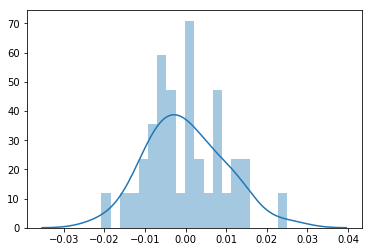

In [546]:
sns.distplot((y_train-y_train_pr),bins=20)

In [547]:
y_test = df_home_dis_test.pop('gmv')
x_test = df_home_dis_test


In [548]:
x_test = x_test[x_train_lm.drop('const',axis=1).columns]
x_test = sm.add_constant(x_test)
x_test


const  FMRadio  HomeAudioSpeaker  KaraokePlayer
25   1.00     0.63              0.70           0.00
48   1.00     0.33              0.39           0.00
52   1.00     0.00              0.00           0.00
37   1.00     0.72              0.40           0.00
6    1.00     0.83              0.45           0.00
18   1.00     0.77              0.54           0.00
20   1.00     0.83              1.00           0.00
46   1.00     0.78              0.41           0.00
5    1.00     0.00              0.00           0.00
31   1.00     0.77              0.74           0.00
33   1.00     0.99              0.93           0.00
45   1.00     0.52              0.44           0.00
35   1.00     0.83              0.49           0.00
32   1.00     0.90              0.65           0.00
0    1.00     0.00              0.01           0.00
11   1.00     1.00              0.44           0.00

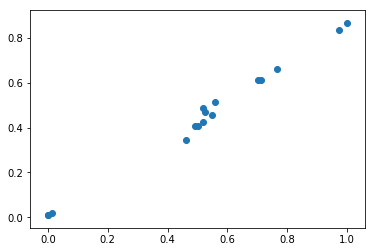

In [549]:
y_pred = lr.predict(x_test)


plt.scatter(y_test,y_pred)


In [550]:
score = cross_val_score(lm, x_train_lm,y_train,scoring='r2',cv=10)
score.mean()

0.9555368218608006

In [551]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.0076039775841976595


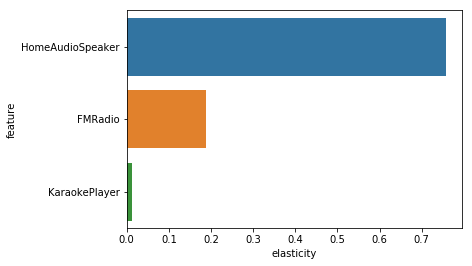

In [552]:
df_coeff = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
df_coeff.columns = ['feature','coefficient']
elast_data = findElasticity(x_train_lm, y_train, df_coeff)


sns.barplot(x='elasticity', y = 'feature', data = elast_data.sort_values('elasticity',ascending = False))
